**Capstone Project Submission - Phase 5**<br>

Student Name: **GROUP 10**<br>
Members : **Cynthia Nasimiyu, Julius Charles, Wambui Thuku, John Karanja, Ismail Ibrahim, Mariacharlote Mbiyu**<br>
Student pace: **Part Time**<br>
Scheduled Project review date/time: **16th October 2023**<br>

# PREDICTIVE FOOD PRICING MODEL IN KENYA
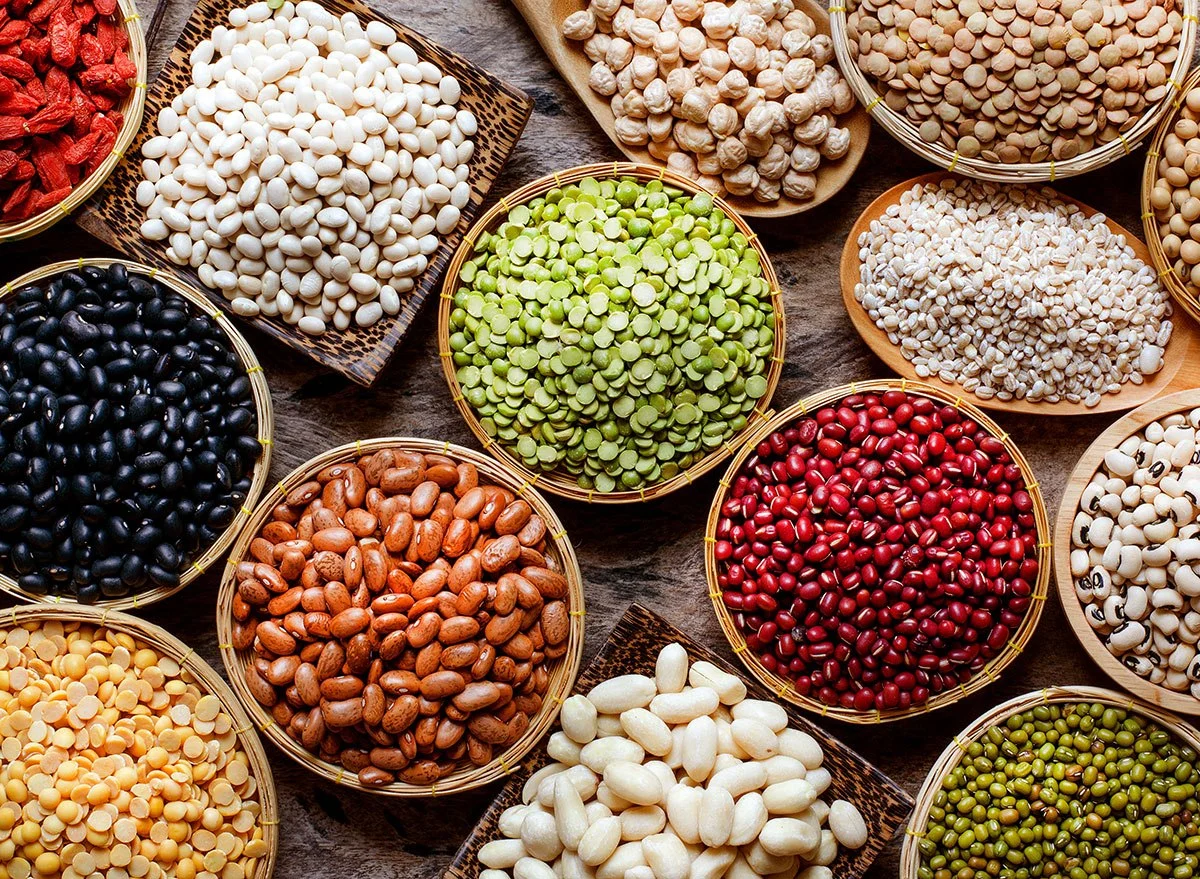

## Project Overview

## 1.0 Business Understanding

### 1.1 Background

Food security in Kenya is the foundation of a stable and prosperous society. Kenya’s ability to provide to its population with reliable access to safe and nutritious food is a fundamental indicator of its overall well-being.<br>

The Agricultural sector accounts for 65% of the export earnings, and provides the livelihood (employment, income and food security needs) for more than 80 per cent of the Kenyan population and contributes to improving nutrition through production of safe, diverse and nutrient dense foods as stated in FAO in kenya article - Kenya at a glance, published in 2023. https://www.fao.org/kenya/fao-in-kenya/kenya-at-a-glance/en/

Crop cultivation is a pivotal driver of Kenya's economic progress, serving as a significant supplier of sustenance, revenue, job opportunities, and a means to curtail foreign currency expenses via reduced reliance on imports.<br> According to Kenya’s food directorate website, https://food.agricultureauthority.go.ke/index.php/sectors/overview , as of September 2023, “ Food Crops as a sub-sector of the agricultural sector contributes approximately 33% of the total agricultural GDP and accounts for a large share of agricultural output.”<br>

It is thus important that accurate food price forecasting and market analysis are available for the various stakeholders in the agricultural sector considering the impact it has on the economy.<br>


### 1.2 Problem Statement

The Food Directorate Office further emphasizes that in Kenya, the primary food crops include maize, wheat, rice, potatoes, green grams, and beans. <br>Maize, in particular, serves as the predominant staple food and is cultivated in approximately 90% of all Kenyan agricultural farms.<br>
Among legumes, the common bean takes precedence, while the Irish potato stands out as the paramount tuber crop.<br>

Our problem statement is geared toward assisting Kenyan farmers in acquiring foresight into forthcoming commodity prices, enabling them to make informed decisions regarding planning and sales. Additionally, it empowers retailers to optimize their product positioning and promotional strategies to maximize profitability. <br>
Our project endeavors to fulfill these critical needs through the utilization of advanced data science methodologies.<br>


### 1.3 Project  Objectives

In order to answer the problem statement and guide the research activities, we embark on the below project  objectives which are specific and measurable.<br>

1. To identify key patterns and trends and relationships in the data <br>
    - How crop prices trends over time<br>
	- To segment regions based on crops and prices i.e. coastal, inland, rural and urban. <br>
    - To analyze the different food categories and commodities.<br>
    - To determine Geospatial Analysis based of the latitude and longitude data. i.e heatmaps<br>
    - To investigate potential correlations between food prices and other variables, such as weather conditions(Regions), crop yields, or socio-economic factors. <br>

2. Develop a predictive robust timeseries model that predicts the future prices of key agricultural commodities in Kenya<br>

3. Create a Market Basket Analysis for Retailers<br>

4. To deploy a crop pricing model.<br>

5. To provide recommendations on the outcomes of the project to our stakeholders <br>

### 1.4 Stakeholders

The primary stakeholders for this project are **Kenyan Farmers** and **Retailers specialising in Cashcrops**

A general complaint among Kenyan farmers in the public, is that they do not make enough income from their farm outputs.

## 2.0 Data Understanding

The main dataset contains Food Prices data for Kenya, sourced from the World Food Programme Price Database.  <br>
The data covers a time period from January 15, 2006 to February 15, 2024.<br>
The data can be accessed on this link : https://data.humdata.org/dataset/wfp-food-prices-for-kenya <br>

Other external datasets were merged into our main dataset for better prediction including Inflation rates sourced from the central bank of kenya https://www.centralbank.go.ke/inflation-rates/ and weather patterns sourced from https://dataviz.vam.wfp.org/version2/climate-explorer

**Kenyan sources of the data for the WFP**: Arid Lands Resource Management Project (ALRMP), Energy Regulatory Commision, Energy Regulatory Commission (ERC), Energy and Petroleum Regulatory Authority (EPRA), FPMA, Kenya National Bureau of Statistics (KNBS), MOA, Ministry of Agriculture, Ministry of Agriculture (MOA), National Drought Management Authority (NDMA), Regional Agricultural Trade Intelligence Network via FAO: GIEWS, State Department of Agriculture, WFP, World Food Programme (WFP) Monitoring.<br>


In [ ]:
#Install this section on your command prompt
#!python -m pip install --upgrade pip
#!pip install pyforest
#!pip install lazypredict
#!pip install pmdarima
#!pip install tensorflow
#!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=cf3ebbc65cf88fb63571579c564e1467fbfe0ea999435d8d720b1e94a058f4e4
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 9.5 MB/s eta 0:00:00


In [ ]:
#Import necessary libraries
from pyforest import *

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import csv
import pandas as pd
import openpyxl
import numpy as np
from sklearn.cluster import KMeans
import datetime
from datetime import date,timedelta
import os
import plotly.express as px
import seaborn as sns


In [ ]:
#load the data and read the 1st 5 lines
df = pd.read_csv('wfp_food_prices_ken.csv', skiprows=[1])
df.head()

date   admin1   admin2   market  latitude  longitude  \
0  2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
1  2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2  2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
3  2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
4  2006-01-15  Eastern    Kitui    Kitui -1.366667  38.016667   

             category      commodity   unit priceflag  pricetype currency  \
0  cereals and tubers          Maize     KG    actual  Wholesale      KES   
1  cereals and tubers  Maize (white)  90 KG    actual  Wholesale      KES   
2     pulses and nuts          Beans     KG    actual  Wholesale      KES   
3     pulses and nuts    Beans (dry)  90 KG    actual  Wholesale      KES   
4  cereals and tubers  Maize (white)     KG    actual     Retail      KES   

     price  usdprice  
0    16.13    0.2235  
1  1480.00   20.5041  
2    33.63    0.4659  
3  3246.00   44.9705  
4    17.00    0.2355

In [ ]:
df.tail()

date         admin1   admin2              market  latitude  \
18573  2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   
18574  2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   
18575  2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   
18576  2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   
18577  2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   

       longitude               category        commodity   unit priceflag  \
18573  40.291621     miscellaneous food             Salt  200 G  forecast   
18574  40.291621     miscellaneous food            Sugar     KG  forecast   
18575  40.291621           oil and fats  Oil (vegetable)      L  forecast   
18576  40.291621        pulses and nuts      Beans (dry)     KG  forecast   
18577  40.291621  vegetables and fruits          Bananas   Unit  forecast   

      pricetype currency  price  usdprice  
18573    Retail      KES    0.0       0.0  
18574    Retail      KES    0.0       0.0  
18575    Retail      KES    0.0       0.0  
18576    Retail      KES    0.0       0.0  
18577    Retail      KES    0.0       0.0

In [ ]:
#Analyse the dataframe
def analyze_dataset(df):

    # confirm type of df
    print(type(df))
    print("*"*50)

    # Dataset shape
    print("Shape of the dataset:", df.shape,'\n')
    print("*"*50)

    # Missing values
    null_counts = df.isnull().sum()
    print("Null columns only:", null_counts[null_counts > 0])
    print("*"*50)

    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]),'\n')
    print("*"*50)

    # Number of columns
    num_columns = len(df.columns)
    print("Number of columns:", num_columns)
    print("*"*50)

    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')
    print("*"*50)

    print("The unique Kenyan Regions are:")
    print(df['admin1'].unique(),'\n')
    print("*"*50)

    print("The unique Kenyan Markets are:")
    print(df['market'].unique(),'\n')
    print("*"*50)

    print("The unique Food Categories are:")
    print(df['category'].unique(),'\n')
    print("*"*50)

    print("The unique Kenyan Commodities are:")
    print(df['commodity'].unique(),'\n')
    print("*"*50)


    # Dataset information
    print("Information about the dataset:")
    print(df.info())
    print("*"*50)

analyze_dataset(df)

<class 'pandas.core.frame.DataFrame'>
**************************************************
Shape of the dataset: (18578, 14) 

**************************************************
Null columns only: Series([], dtype: int64)
**************************************************
Number of duplicates: 0 

**************************************************
Number of columns: 14
**************************************************
The unique values per column are:
date           218
admin1           7
admin2          22
market          62
latitude        62
longitude       62
category         8
commodity       47
unit            14
priceflag        3
pricetype        2
currency         1
price         6986
usdprice     11429
dtype: int64 

**************************************************
The unique Kenyan Regions are:
['Coast' 'Eastern' 'Nairobi' 'North Eastern' 'Nyanza' 'Rift Valley'
 'Central'] 

**************************************************
The unique Kenyan Markets are:
['Mombasa' 'Kitui'

### Summary of Main Dataframe

- Our main dataset contains information on food commodity prices for various Kenyan regions. <br>

- There are 14 columns and 18,578 rows which are indexed from 0 to 18,577. <br>
- The columns are named  **"date, admin1, admin2, market, latitude, longitude, category, commodity, unit, priceflag, pricetype, currency, price, usdprice**<br>

To expound further on the columns:
1. The **date** column represents the entry dates per month starting from  2016-01-15<br>
2. The **admin1** column has the regions for the country .<br>The unique Kenyan Regions are:'Coast' 'Eastern' 'Nairobi' 'North Eastern' 'Nyanza' 'Rift Valley'
 'Central'<br>
3. The **admin2** column has the county locations which would be a smaller representation of the regions i.e Mombasa, Kisumu<br>
4. The **market** column represents the areas where the goods were bought/sold from.<br>
5. The **latitude and longitude**columns indicate the geographical coordinates of the locations stated in the dataset.<br>
6. The **category** column represents the classification of the different food commodities within the dataset. <br>
The unique Food Categories are:'cereals and tubers' 'pulses and nuts' 'milk and dairy' 'oil and fats' 'non-food' 'meat, fish and eggs' 'miscellaneous food' 'vegetables and fruits'<br>
7. The **commodity** column indicates foods currently in the dataset for Kenya.
8. The **unit** column represents the unit of measure of the commodities. KG , litres
9. The **priceflag**  column indicates where a price is a forecast or an actual figure in the market.
10. The **pricetype** column represents if a commodity was sold as wholesale or retail.
11. The**currency** column shows the used currency in the dataset
12. The **price** column shows the selling figures allocated per each commodity per region
13. The **usdprice** column


- The dataframe contains two main data types<br>

    - 4 float data types
    - 10 Object data types

-  The dataset contains no missing values in any of its rows or comlumns.<br>

-  No duplicates were identified in the columns however, unique values were found in various columns such as markets and commodities.<br>
For example: **The unique Kenyan Commodities** are:
['Maize' 'Maize (white)' 'Beans' 'Beans (dry)' 'Potatoes (Irish)'
 'Sorghum' 'Bread' 'Milk (cow, pasteurized)' 'Oil (vegetable)'
 'Fuel (diesel)' 'Fuel (kerosene)' 'Fuel (petrol-gasoline)' 'Maize flour'
 'Rice' 'Wheat flour' 'Meat (beef)' 'Meat (goat)' 'Milk (UHT)' 'Sugar'
 'Cooking fat' 'Bananas' 'Kale' 'Onions (red)' 'Tomatoes'
 'Potatoes (Irish, red)' 'Beans (kidney)' 'Beans (rosecoco)'
 'Beans (yellow)' 'Cabbage' 'Onions (dry)' 'Spinach'
 'Potatoes (Irish, white)' 'Rice (aromatic)' 'Sorghum (red)'
 'Beans (dolichos)' 'Cowpeas' 'Cowpea leaves' 'Maize (white, dry)'
 'Beans (mung)' 'Millet (finger)' 'Rice (imported, Pakistan)'
 'Fish (omena, dry)' 'Sorghum (white)' 'Salt' 'Meat (camel)'
 'Milk (camel, fresh)' 'Milk (cow, fresh)']

 - Finally, the dataset consumes approximately 2.0+ megabyted of memory


## 3.0 Data Preparation

### 3.1 Data Merging & Cleaning

In this step, our main dataset undergoes through merging of additional data which we deem fit for the analysis. <br>
Cleaning and prepartion is also carried out to ensure quality and realibility
1. Inflation dataset from the central Bank of Kenya and data on rainfall is "merged" to our main data. This is done by converting the "Date" column in both dataframes to a datetime format then setting them as the index columns to enable merging
2. Renaming columns to represent the data correctly
3. Unnecessary columns are dropped
4. Columns with zero values are removed

*Main dataframe*: We create a copy of our main dataframe and set time as index to enable merging other dataframes

In [ ]:
#create a copy of the dataframe
df2 = df.copy()

In [ ]:
# Set the "Date" column as the index
df2['date'] = pd.to_datetime(df2['date'])

# Extract month and year and store them in new columns
df2['time'] = df2['date'].dt.strftime('%Y-%m')
df2.set_index('time', inplace=True)
df2.tail()

date         admin1   admin2              market  latitude  \
time                                                                       
2024-02 2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   
2024-02 2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   
2024-02 2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   
2024-02 2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   
2024-02 2024-02-15  North Eastern  Garissa  Dagahaley (Daadab)  0.185656   

         longitude               category        commodity   unit priceflag  \
time                                                                          
2024-02  40.291621     miscellaneous food             Salt  200 G  forecast   
2024-02  40.291621     miscellaneous food            Sugar     KG  forecast   
2024-02  40.291621           oil and fats  Oil (vegetable)      L  forecast   
2024-02  40.291621        pulses and nuts      Beans (dry)     KG  forecast   
2024-02  40.291621  vegetables and fruits          Bananas   Unit  forecast   

        pricetype currency  price  usdprice  
time                                         
2024-02    Retail      KES    0.0       0.0  
2024-02    Retail      KES    0.0       0.0  
2024-02    Retail      KES    0.0       0.0  
2024-02    Retail      KES    0.0       0.0  
2024-02    Retail      KES    0.0       0.0

*Inflation dataframe*

In [ ]:
# Viewing the inflation  dataframe
inflation_df = pd.read_csv('Inflation Rates.csv')
inflation_df.head()

Year   Month  Annual Average Inflation  12-Month Inflation
0  2023  August                      8.52                6.73
1  2023    July                      8.68                7.28
2  2023    June                      8.77                7.88
3  2023     May                      8.78                8.03
4  2023   April                      8.71                7.90

In [ ]:
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      225 non-null    int64  
 1   Month                     225 non-null    object 
 2   Annual Average Inflation  225 non-null    float64
 3   12-Month Inflation        225 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Merge "Year" and "Month" into a new "Date" column in the format 'YYYY-MM'
inflation_df['Date'] = pd.to_datetime(inflation_df['Year'].astype(str) + '-' + inflation_df['Month'], format='%Y-%B')

# Extract month and year and store them in new columns
inflation_df['time'] = inflation_df['Date'].dt.strftime('%Y-%m')
inflation_df

# Drop the unnecessary columns
inflation_df.drop(columns=['Annual Average Inflation', 'Date', 'Year', 'Month'], inplace=True)

# Rename the "12-Month Inflation" column to "Inflation Rate"
inflation_df.rename(columns={'12-Month Inflation': 'inflation rate'}, inplace=True)

# Convert the "Date" column to a datetime index
inflation_df.set_index('time', inplace=True)
inflation_df

inflation rate
time                   
2023-08            6.73
2023-07            7.28
2023-06            7.88
2023-05            8.03
2023-04            7.90
...                 ...
2005-05           14.78
2005-04           16.02
2005-03           14.15
2005-02           13.94
2005-01           14.87

[225 rows x 1 columns]

Merging the main and inflation dataframe using 'time' index column

In [ ]:
# merging dataframes
merged_df1 = pd.merge(df2, inflation_df, on="time", how="inner")
# renaming columns
merged_df1 = merged_df1.rename(columns={'admin1': 'province', 'admin2': 'county'})
merged_df1.head()

date province   county   market  latitude  longitude  \
time                                                                 
2006-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01 2006-01-15  Eastern    Kitui    Kitui -1.366667  38.016667   

                   category      commodity   unit priceflag  pricetype  \
time                                                                     
2006-01  cereals and tubers          Maize     KG    actual  Wholesale   
2006-01  cereals and tubers  Maize (white)  90 KG    actual  Wholesale   
2006-01     pulses and nuts          Beans     KG    actual  Wholesale   
2006-01     pulses and nuts    Beans (dry)  90 KG    actual  Wholesale   
2006-01  cereals and tubers  Maize (white)     KG    actual     Retail   

        currency    price  usdprice  inflation rate  
time                                                 
2006-01      KES    16.13    0.2235            8.39  
2006-01      KES  1480.00   20.5041            8.39  
2006-01      KES    33.63    0.4659            8.39  
2006-01      KES  3246.00   44.9705            8.39  
2006-01      KES    17.00    0.2355            8.39

In [ ]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17711 entries, 2006-01 to 2023-08
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            17711 non-null  datetime64[ns]
 1   province        17711 non-null  object        
 2   county          17711 non-null  object        
 3   market          17711 non-null  object        
 4   latitude        17711 non-null  float64       
 5   longitude       17711 non-null  float64       
 6   category        17711 non-null  object        
 7   commodity       17711 non-null  object        
 8   unit            17711 non-null  object        
 9   priceflag       17711 non-null  object        
 10  pricetype       17711 non-null  object        
 11  currency        17711 non-null  object        
 12  price           17711 non-null  float64       
 13  usdprice        17711 non-null  float64       
 14  inflation rate  17711 non-null  float64       
dtyp

*Rainfall data*

In [ ]:
rainfall_df = pd.read_csv('Rainfall.csv')
rainfall_df.head(12)

Year  Month  Dekad  Rainfall(mm)  Average(mm)
0   2005      1      1        2.6383       9.0490
1   2005      1      2        2.3078      10.2445
2   2005      1      3       23.7976       9.7117
3   2005      2      1        3.4019       8.6781
4   2005      2      2        4.1204      11.6488
5   2005      2      3       12.5951       8.7773
6   2005      3      1       12.3978      20.7857
7   2005      3      2       20.1949      22.0756
8   2005      3      3       31.7368      30.5914
9   2005      4      1       31.2677      38.0823
10  2005      4      2       14.4108      34.4192
11  2005      4      3       43.2106      39.6816

In [ ]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          720 non-null    int64  
 1   Month         720 non-null    int64  
 2   Dekad         720 non-null    int64  
 3   Rainfall(mm)  720 non-null    float64
 4   Average(mm)   720 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 28.2 KB


In [ ]:
# Removing rows with zero rainfall values
rainfall_df= rainfall_df[rainfall_df['Rainfall(mm)'] != 0]

In [ ]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 673
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          674 non-null    int64  
 1   Month         674 non-null    int64  
 2   Dekad         674 non-null    int64  
 3   Rainfall(mm)  674 non-null    float64
 4   Average(mm)   674 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 31.6 KB


In [ ]:
# Format the rainfall_df for ease of merging into our main dataframe

def calculate_rainfall_average_by_dekad(rainfall_df):
    # Group the data by Year, Month, and Dekad, and then calculate the sum of rainfall for each group
    grouped = rainfall_df.groupby(['Year', 'Month', 'Dekad']).agg({'Rainfall(mm)': 'sum'}).reset_index()

    # Calculate the average for every three dekads (i.e., every three-month period)
    dekad_averages = []
    year_values = []
    month_values = []

    for i in range(0, len(grouped), 3):
        if i + 2 < len(grouped):
            three_month_average = grouped.iloc[i:i+3]['Rainfall(mm)'].mean()
            dekad_averages.append(three_month_average)
            year_values.append(int(grouped.iloc[i]['Year']))
            month_values.append(int(grouped.iloc[i]['Month']))

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'Year': year_values,
                              'Month': month_values,
                              'rainfall_avg': dekad_averages})

    return result_df

# Call the function with your Rainfall DataFrame
dekad_averages_df = calculate_rainfall_average_by_dekad(rainfall_df)

# Merge 'Year' and 'Month' columns into a single datetime column without the day
dekad_averages_df['time'] = pd.to_datetime(dekad_averages_df['Year'].astype(str) + '-' + dekad_averages_df['Month'].astype(str), format='%Y-%m')

# Format the 'time' column to include only year and month
dekad_averages_df['time'] = dekad_averages_df['time'].dt.strftime('%Y-%m')

# Set the 'time' column as the index
dekad_averages_df.set_index('time', inplace=True)

# Drop the 'Year' and 'Month' columns if no longer needed
dekad_averages_df.drop(['Year', 'Month'], axis=1, inplace=True)

# Print the results DataFrame
dekad_averages_df.head()


rainfall_avg
time                 
2005-01      9.581233
2005-02      6.705800
2005-03     21.443167
2005-04     29.629700
2005-05     38.842200

Merging the rainfall dataframe into our main dataframe

In [ ]:
# Convert the 'time' column in the dekad_averages_df DataFrame to a datetime format with only year and month
dekad_averages_df.index = pd.to_datetime(dekad_averages_df.index, format='%Y-%m')

# Ensure that the index in the merged_df DataFrame is also in datetime format with only year and month
merged_df1.index = pd.to_datetime(merged_df1.index, format='%Y-%m')

# Merge the two DataFrames using their index (which is now in datetime format)
merged_df = merged_df1.merge(dekad_averages_df, left_index=True, right_index=True, how='left')

# Print the final merged DataFrame
merged_df.head()



date province   county   market  latitude  longitude  \
time                                                                    
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01-01 2006-01-15  Eastern    Kitui    Kitui -1.366667  38.016667   

                      category      commodity   unit priceflag  pricetype  \
time                                                                        
2006-01-01  cereals and tubers          Maize     KG    actual  Wholesale   
2006-01-01  cereals and tubers  Maize (white)  90 KG    actual  Wholesale   
2006-01-01     pulses and nuts          Beans     KG    actual  Wholesale   
2006-01-01     pulses and nuts    Beans (dry)  90 KG    actual  Wholesale   
2006-01-01  cereals and tubers  Maize (white)     KG    actual     Retail   

           currency    price  usdprice  inflation rate  rainfall_avg  
time                                                                  
2006-01-01      KES    16.13    0.2235            8.39        5.2364  
2006-01-01      KES  1480.00   20.5041            8.39        5.2364  
2006-01-01      KES    33.63    0.4659            8.39        5.2364  
2006-01-01      KES  3246.00   44.9705            8.39        5.2364  
2006-01-01      KES    17.00    0.2355            8.39        5.2364

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17711 entries, 2006-01-01 to 2023-08-01
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            17711 non-null  datetime64[ns]
 1   province        17711 non-null  object        
 2   county          17711 non-null  object        
 3   market          17711 non-null  object        
 4   latitude        17711 non-null  float64       
 5   longitude       17711 non-null  float64       
 6   category        17711 non-null  object        
 7   commodity       17711 non-null  object        
 8   unit            17711 non-null  object        
 9   priceflag       17711 non-null  object        
 10  pricetype       17711 non-null  object        
 11  currency        17711 non-null  object        
 12  price           17711 non-null  float64       
 13  usdprice        17711 non-null  float64       
 14  inflation rate  17711 non-null  float

Removing zero values in the price column

In [ ]:
zero_price_count = len(merged_df[merged_df['price'] == 0])
zero_price_count

1771

In [ ]:
merged_df = merged_df[merged_df['price'] != 0]

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15940 entries, 2006-01-01 to 2023-08-01
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            15940 non-null  datetime64[ns]
 1   province        15940 non-null  object        
 2   county          15940 non-null  object        
 3   market          15940 non-null  object        
 4   latitude        15940 non-null  float64       
 5   longitude       15940 non-null  float64       
 6   category        15940 non-null  object        
 7   commodity       15940 non-null  object        
 8   unit            15940 non-null  object        
 9   priceflag       15940 non-null  object        
 10  pricetype       15940 non-null  object        
 11  currency        15940 non-null  object        
 12  price           15940 non-null  float64       
 13  usdprice        15940 non-null  float64       
 14  inflation rate  15940 non-null  float

 Its important to note that the Merged dataframe has reduced from 18,577 to 15940 entries since some columns were dropped in the merging and after dropping the rows with 0 in the price column.
  

### 3.2 Explaratory Data Analysis (EDA)

#### Univariate Analysis
1. Descriptive Statistics: Here we compute basic summary statistics for numerical columns, such as mean, median, standard deviation, minimum, and maximum. For categorical columns, we calculate frequencies and proportions.
2. Visualize the distribution of variables to help us understand the shape and spread of the data
3. Identifying outliers

In [ ]:
# Descriptive Statistics
merged_df.describe()

latitude     longitude         price      usdprice  inflation rate  \
count  15940.000000  15940.000000  15940.000000  15940.000000    15940.000000   
mean      -0.054691     36.889065   1969.160668     18.783221        7.002290   
std        2.175674      1.866787   2996.664204     27.279279        2.802018   
min       -4.659730     34.727999      5.000000      0.044100        1.850000   
25%       -1.283333     35.283333     57.262500      0.573100        5.730000   
50%       -0.282960     36.792960    185.500000      1.734500        6.320000   
75%        0.516667     38.008250   3000.000000     30.264900        7.760000   
max        3.936804     41.858383  19800.000000    183.806900       19.720000   

       rainfall_avg  
count  15940.000000  
mean      18.726369  
std       11.629849  
min        2.291133  
25%       12.065367  
50%       15.167533  
75%       22.492000  
max       83.905533

There are 15940 data points in the dataset

**Target Variable: Price**

The price of commodities range from 5 - 19,800. On average, the commodities have a price of around 1,969.16 KES. The standard deviation is about 2,996.66 suggesting that there is a significant degree of variation or dispersion in the prices within the dataset.

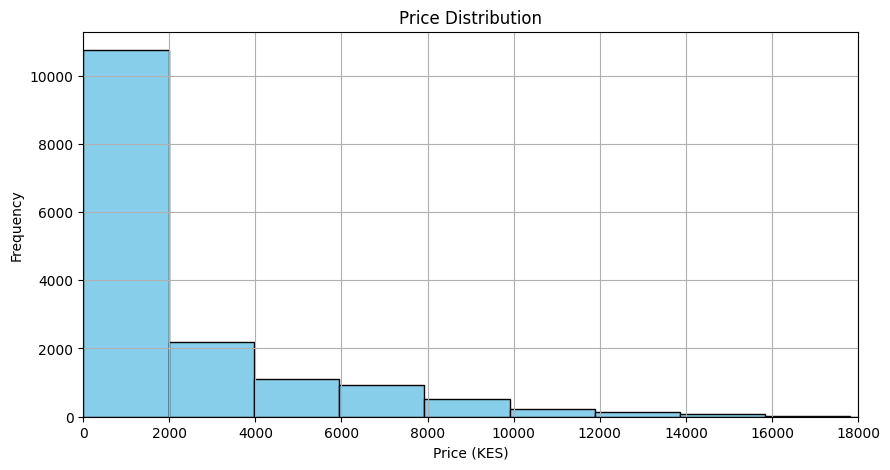

In [ ]:
# Creating a price distribution
plt.figure(figsize=(10, 5))
plt.hist(merged_df['price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price (KES)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.grid(True)

# Set x-axis limit to 15000
plt.xlim(0, 18000)

plt.show()

**Inflation rate**
The "inflation rate" in the provided dataset represents the percentage increase in the general price level of goods and services over time. It is a measure of the rate at which the cost of living or the purchasing power of a currency is changing. In this dataset, the inflation rate varies from a minimum of 1.85% to a maximum of 19.72%, with an average inflation rate of approximately 7.0%.

Summary Statistics:
count    225.000000
mean       7.590844
std        3.995578
min        1.850000
25%        5.000000
50%        6.410000
75%        8.440000
max       19.720000
Name: inflation rate, dtype: float64
**************************************************


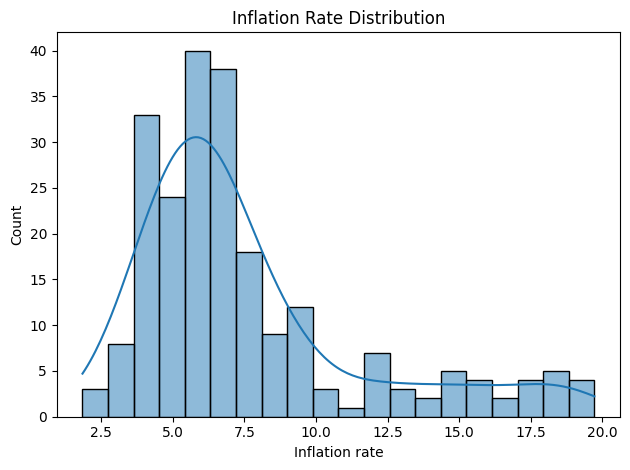

In [ ]:
# Summary statistics
summary_stats = inflation_df[ 'inflation rate'].describe()
print("Summary Statistics:")
print(summary_stats)
print("*" * 50)

sns.histplot(inflation_df['inflation rate'], bins=20, kde=True)
plt.title("Inflation Rate Distribution")
plt.xlabel("Inflation rate")

plt.tight_layout()
plt.show()

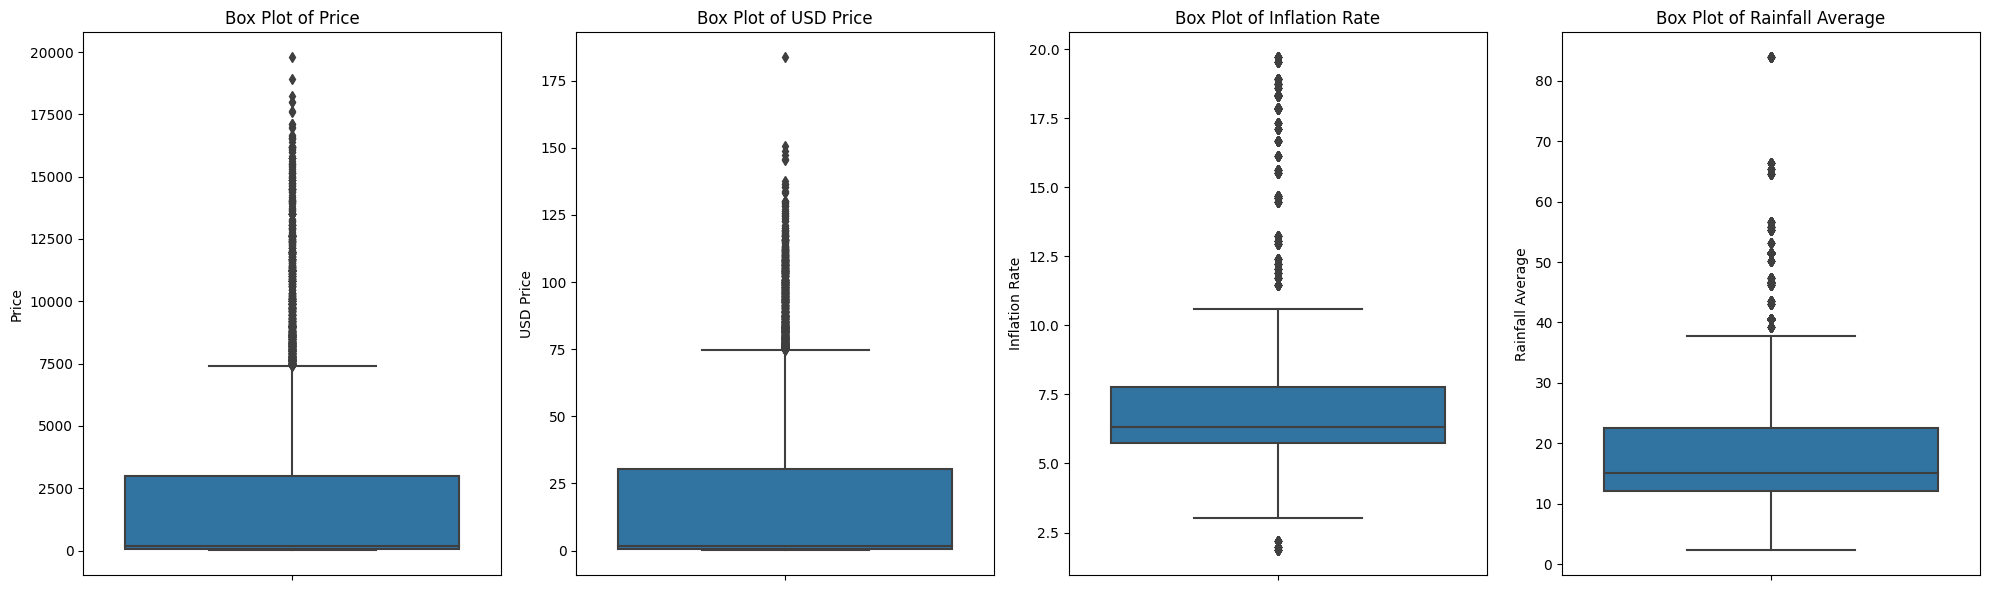

In [ ]:
# Outlier Detection

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Plot box plots for each variable
sns.boxplot(y=merged_df['price'], ax=axes[0])
axes[0].set_ylabel('Price')
axes[0].set_title('Box Plot of Price')

sns.boxplot(y=merged_df['usdprice'], ax=axes[1])
axes[1].set_ylabel('USD Price')
axes[1].set_title('Box Plot of USD Price')

sns.boxplot(y=merged_df['inflation rate'], ax=axes[2])
axes[2].set_ylabel('Inflation Rate')
axes[2].set_title('Box Plot of Inflation Rate')

sns.boxplot(y=merged_df['rainfall_avg'], ax=axes[3])
axes[3].set_ylabel('Rainfall Average')
axes[3].set_title('Box Plot of Rainfall Average')

plt.tight_layout()
plt.show()


The price in KES, USD price, Inflation rate and Average rainfall columns appear to have outliers which will be dealt with accordingly

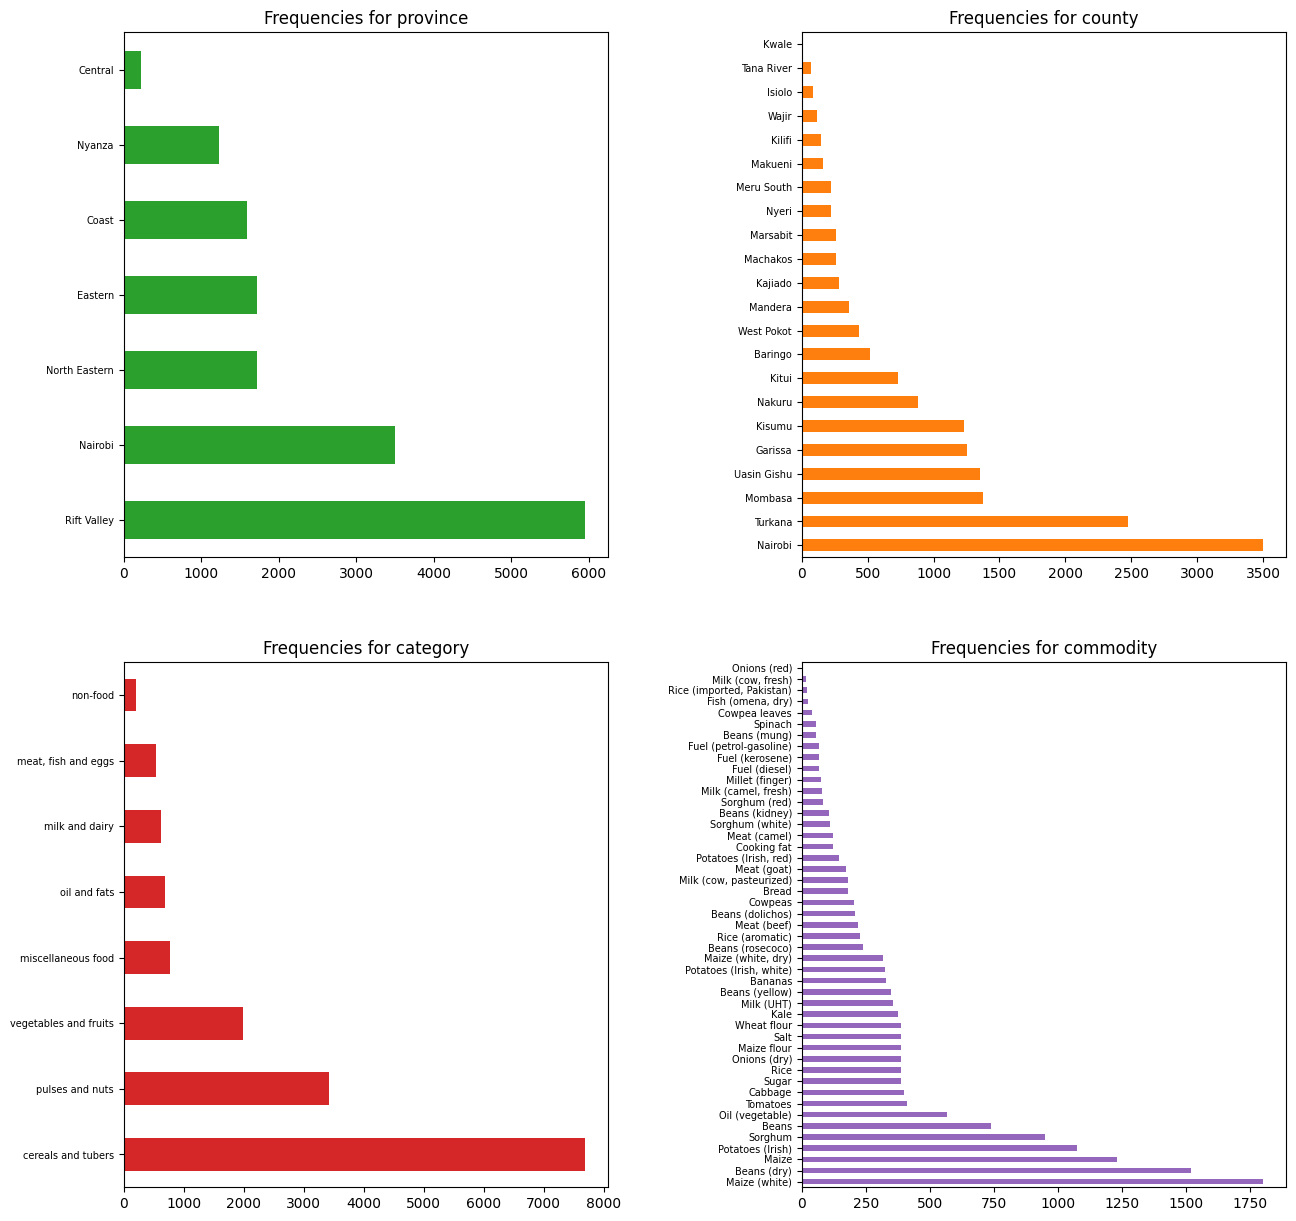

In [ ]:
# Calculate frequencies for each categorical column
province_counts = merged_df['province'].value_counts()
county_counts = merged_df['county'].value_counts()
category_counts = merged_df['category'].value_counts()
commodity_counts = merged_df['commodity'].value_counts()

# Combine commodities with frequencies less than 250 into one category
#commodity_counts = commodity_counts.where(commodity_counts <= 250, 'Other')
#county_counts = county_counts.where(county_counts <= 250, 'Other')

# Plot bar graphs for each categorical column
# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.2)  # Adjust spacing between subplots

# Plot bar graphs for each categorical column with custom colors
province_counts.plot(kind='barh', ax=axes[0, 0], color=colors[2], title='Frequencies for province')
county_counts.plot(kind='barh', ax=axes[0, 1], color=colors[1], title='Frequencies for county')
category_counts.plot(kind='barh', ax=axes[1, 0], color=colors[3], title='Frequencies for category')
commodity_counts.plot(kind='barh', ax=axes[1, 1], color=colors[4], title='Frequencies for commodity')

# Reduce font size on the x-axis tick labels
for ax in axes.flatten():
    ax.tick_params(axis='y', labelsize=7)  # Adjust the labelsize as needed


# Show the plots
plt.show()


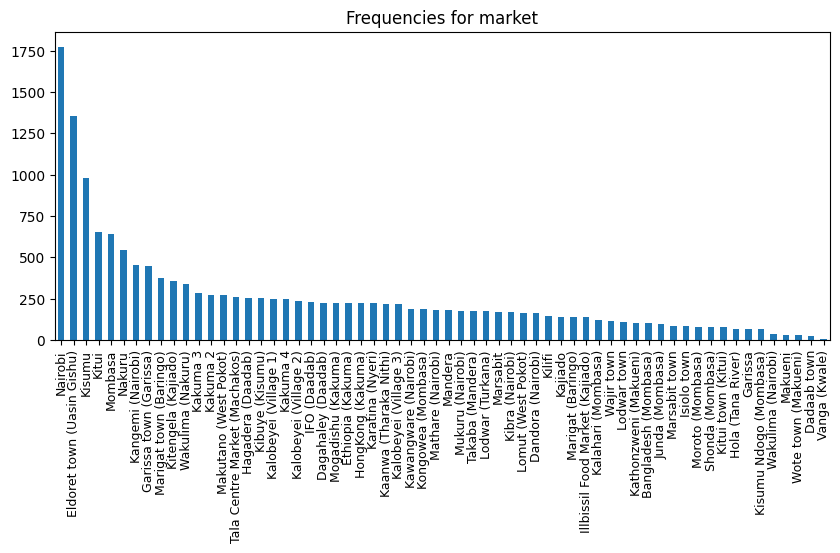

In [ ]:
market_counts = merged_df['market'].value_counts()

#market_counts = market_counts.where(market_counts <= 250, 'Other')

plt.figure(figsize=(10, 4))
market_counts.plot(kind='bar', title='Frequencies for market')
plt.xticks(fontsize=9)

plt.show()

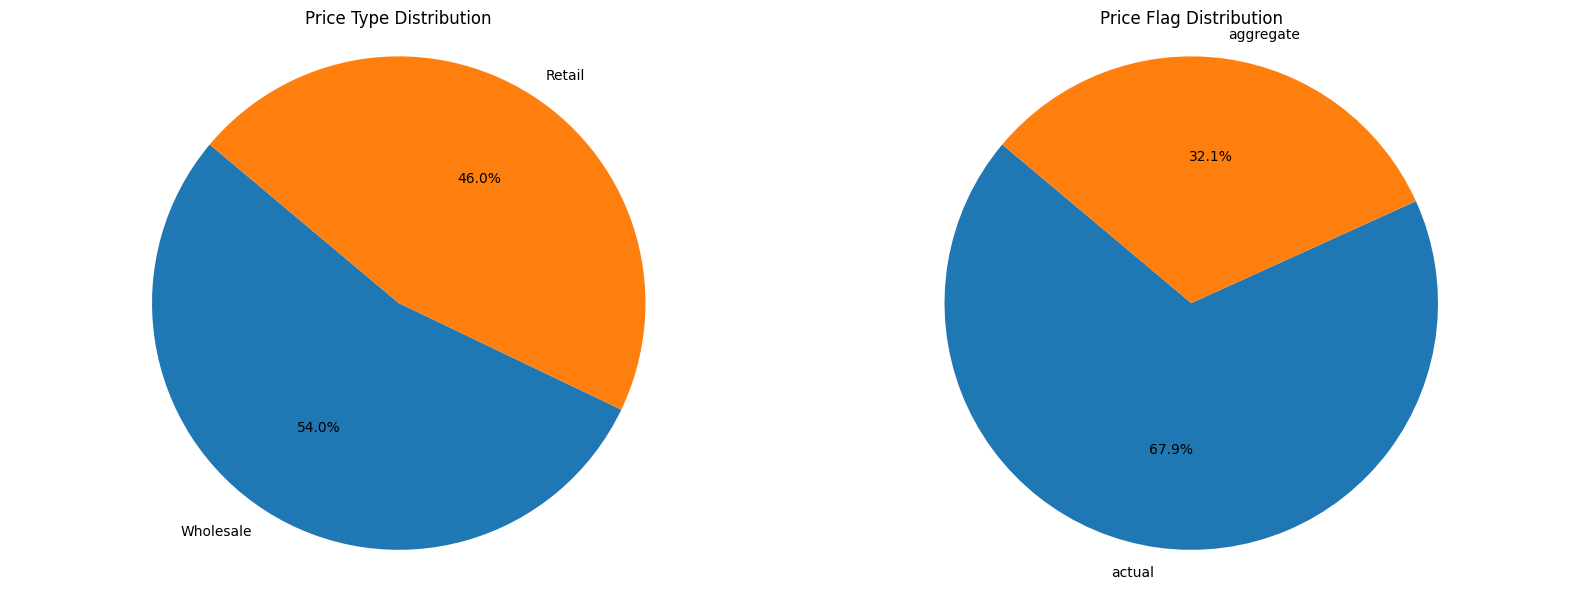

In [ ]:
# Calculate and plot Price Type Distribution
price_type_counts = merged_df['pricetype'].value_counts()
labels = price_type_counts.index
sizes = price_type_counts.values

plt.figure(figsize=(16, 6))  # Increase the figure size to accommodate both plots

# Plot the first pie chart
plt.subplot(1, 2, 1)  # Create the first subplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Price Type Distribution')

# Calculate and plot Price Flag Distribution
price_flag_counts = merged_df['priceflag'].value_counts()
labels = price_flag_counts.index
sizes = price_flag_counts.values

# Plot the second pie chart
plt.subplot(1, 2, 2)  # Create the second subplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Price Flag Distribution')

plt.tight_layout()  # Ensure that the plots do not overlap
plt.show()

- The most frequent provinces in the dataset are RiftValley, Nairobi and
North Eastern
- Counties that appear frequently are Nairobi, Turkana, Uasin Gishu, Garissa and Mombasa
- Frequent categories are cereals and tubers, pulses and nuts as well as vegetables and fruits
- Specific commodities frequent in the dataset include maize, beans, potatoes and soghurm
- Frequent markets are Nairobi, Eldoret, Kisumu, Kitui, Mombasa and Nakuru



#### Bivariate Analysis
Here we examined the relationships between two variables. We did bivariate visualization where we created various plots and visualizations to explore relationships.

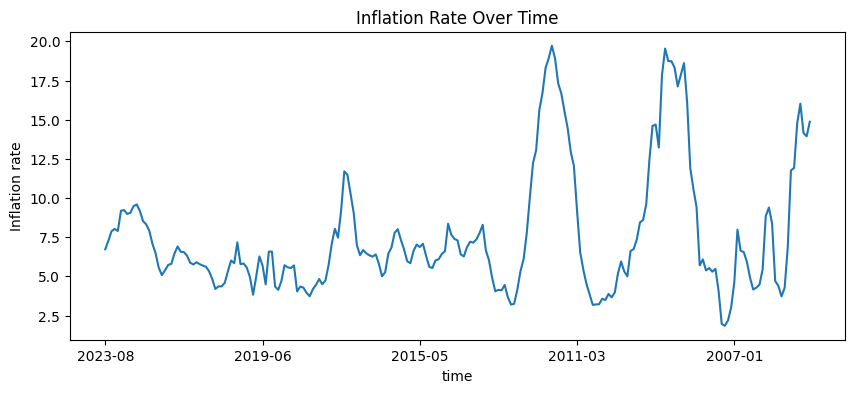

In [ ]:
# Line plot for trends in Inflation rates over time

plt.figure(figsize=(10, 4))
inflation_df['inflation rate'].plot()
plt.title("Inflation Rate Over Time")
plt.xlabel("time")
plt.ylabel("Inflation rate")
plt.show()

Inflation rates appear to stabilize between 2013 to date, compared to the years prior, which illustrated large differences between the highest and lowest inflation rates. As a result, inflation rates are more predictable in recent years compared to the earlier years.

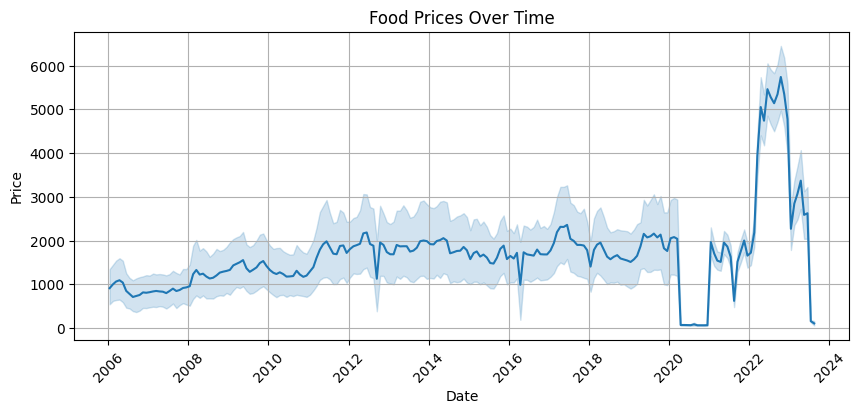

In [ ]:
# Line plot for trends in price over time
plt.figure(figsize=(10, 4))
sns.lineplot(data=merged_df, x='date', y='price')
plt.title('Food Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

From the chart, there has been a increase in price over time. The graph also enabled us see the gaps in our dataset where in 2021 there was missing data which will be imputed in a later section.

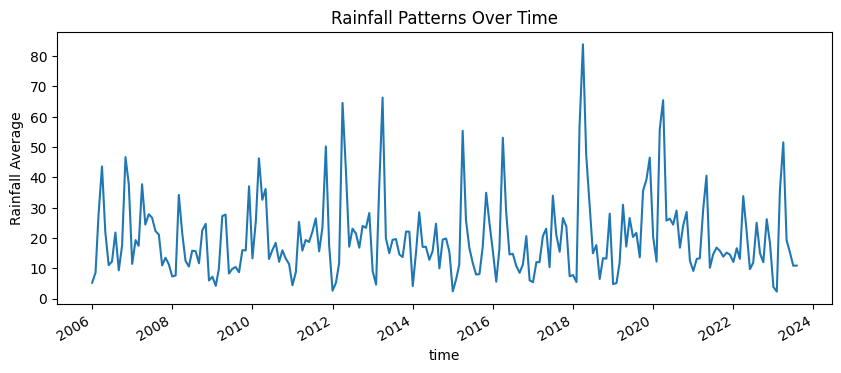

In [ ]:
# Line plot for trends in Rainfall Average over time

plt.figure(figsize=(10, 4))
merged_df['rainfall_avg'].plot()
plt.title("Rainfall Patterns Over Time")
plt.xlabel("time")
plt.ylabel("Rainfall Average")
plt.show()

The rainfall graph shows that there has been a lot of variability in rainfall from year to year. The period between 2018-2019 seems to have had alot of rainfall while in 2014 - 2015 the rainfall averages were low. It is also evident that there are two rainy seasons in a year

We proceeded to examine the correlation between food category and provinces, which is crucial to understanding which food items/categories are more prevalent in which regions.

<Figure size 1600x1200 with 0 Axes>

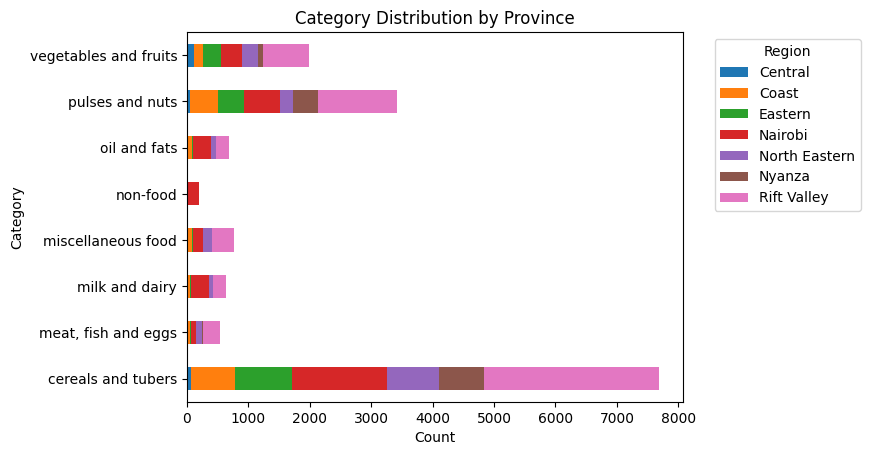

In [ ]:
# Food Category vs Province
category_region_counts = merged_df.groupby(['category', 'province']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 12))
category_region_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Distribution by Province')
plt.xticks(rotation=0)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the chart, it becomes apparent that the food categories "cereals and tubers" are prevalent across a wide range of provinces, including Rift Valley, Nyanza, North Eastern, Nairobi, Eastern, Coast, and Central. Following closely in terms of prevalence are "pulses and nuts," followed by "vegetables and fruits." Conversely, the remaining food categories exhibit lower frequency in various regions. These two prominent categories, cereals and tubers, and pulses and nuts, hold significant importance in unraveling the intricacies of living costs and the enduring impact of inflation over time.

The representations presented above can also be effectively visualized using a heatmap, as illustrated below

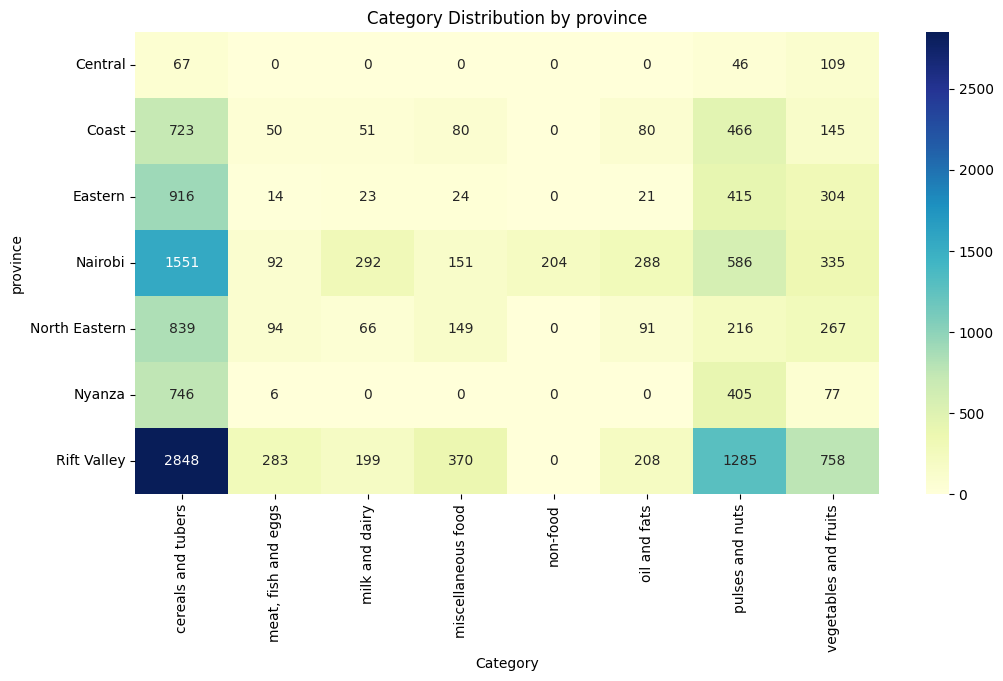

In [ ]:
# Group the data by 'region' and 'category' and count occurrences
category_by_region = merged_df.groupby(['province', 'category']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
sns.heatmap(category_by_region, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Category')
plt.ylabel('province')
plt.title('Category Distribution by province')
plt.show()

Similar to the horizontal bar chart mentioned earlier, this heatmap highlights a high frequency of the "cereals and tubers" and "pulses and nuts" food category in the Rift Valley region, with Nairobi following closely. Additionally, it indicates a significant presence all food categories in regions like Nairobi. These findings enable us to focus on the most noteworthy food categories for further analysis.

The chart is a heatmap that visualizes the relationship between provinces and counties based on the frequency of occurrences in the dataset.

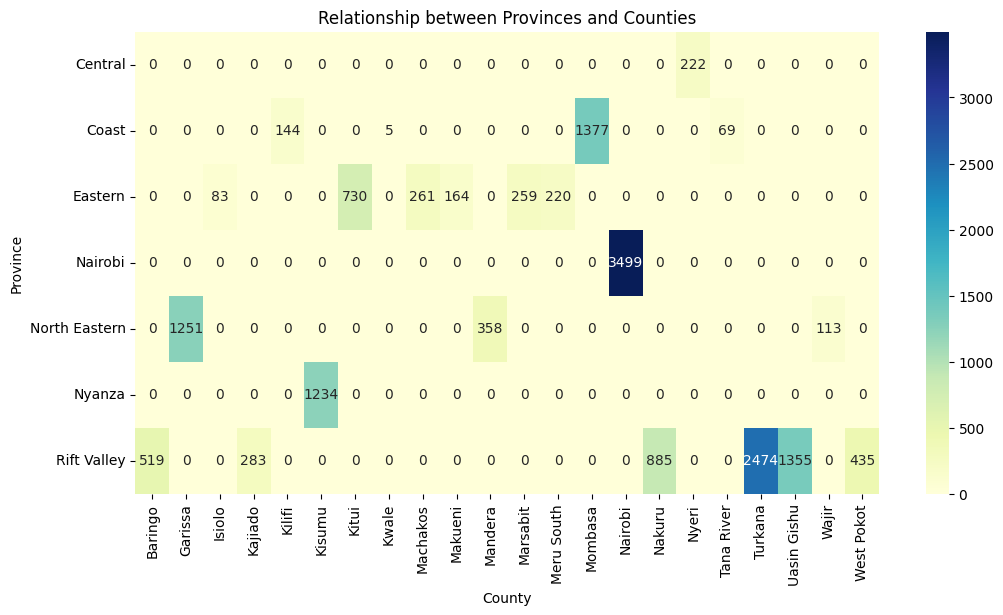

In [ ]:
cross_tab = pd.crosstab(merged_df['province'], merged_df['county'])

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('County')
plt.ylabel('Province')
plt.title('Relationship between Provinces and Counties')
plt.show()

From the heatmap, it's apparent which provinces have a higher concentration of specific counties. This visualization allows for a quick understanding of how counties are distributed across provinces in the dataset, providing insights into regional patterns and relationships.

We also checked and compared the mean prices of different product categories

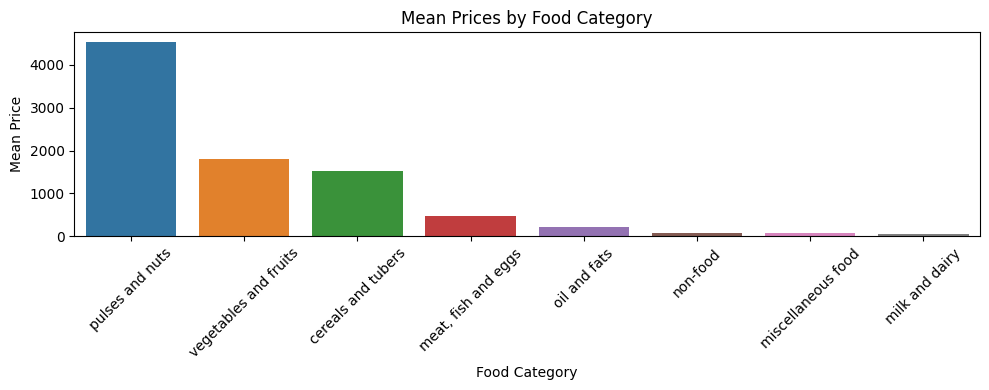

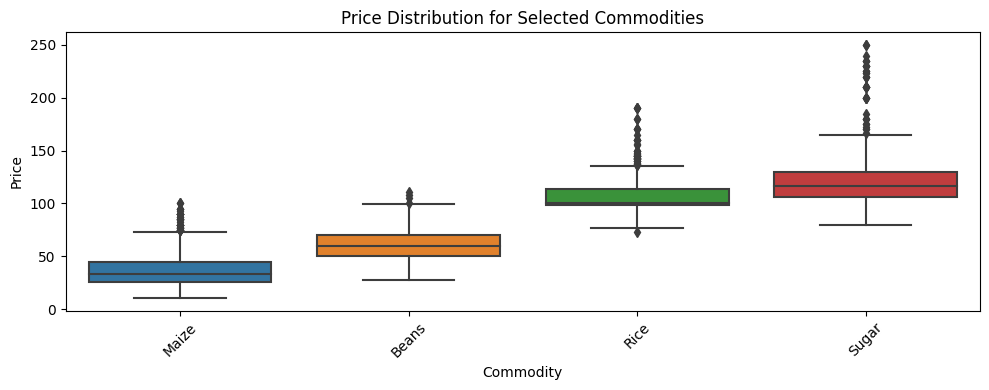

In [ ]:
# Summary Statistics for Food Categories
category_summary = merged_df.groupby('category')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
category_summary = category_summary.sort_values(by='mean', ascending=False)

# Summary Statistics for Commodities
commodity_summary = merged_df.groupby('commodity')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
commodity_summary = commodity_summary.sort_values(by='mean', ascending=False)

# Plotting Mean Prices by Food Category
plt.figure(figsize=(10, 4))
sns.barplot(data=category_summary, x='category', y='mean')
plt.xlabel('Food Category')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Food Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Box Plots for Selected Commodities
selected_commodities = ['Maize', 'Beans', 'Rice', 'Sugar', 'Wheat']
selected_data = merged_df[merged_df['commodity'].isin(selected_commodities)]

plt.figure(figsize=(10, 4))
sns.boxplot(data=selected_data, x='commodity', y='price')
plt.xlabel('Commodity')
plt.ylabel('Price')
plt.title('Price Distribution for Selected Commodities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The initial visualization reveals that "pulses and nuts" had the highest mean prices, followed by "vegetables and fruits," "cereals and tubers," and "meat, fish, and eggs," among others.

When examining individual food commodities, sugar was found to have a relatively high price, followed by rice. Notably, both sugar and rice exhibited a greater number of outliers compared to other commodities. On the contrary, maize had the lowest price, with beans following closely.

It's worth noting that forecasting prices for sugar and rice may be more challenging due to the presence of these outliers compared to beans.

#### Multivariate Analysis
Here we examined the relationships between multiple variables in the dataset simultaneously

We first examined and visualized the average price (KES) for different categories across different provinces to get a better understanding of food product costs in different regions

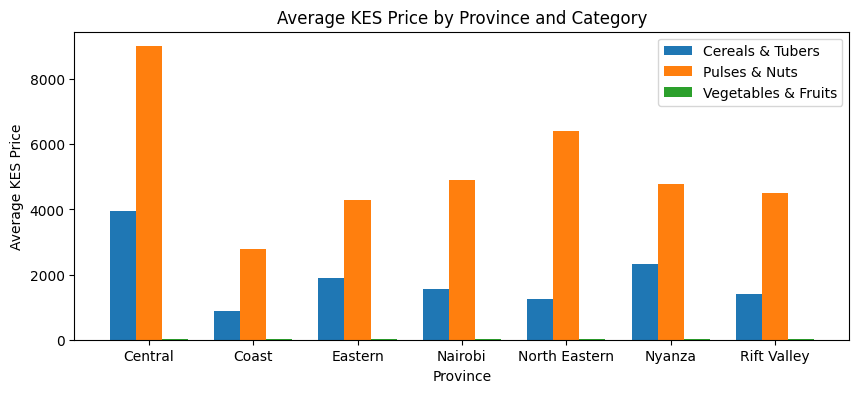

In [ ]:
# Group the data by province and category and calculate the average USD price
grouped_data = merged_df.groupby(['province', 'category'])['price'].mean().reset_index()

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='province', columns='category', values='price')

# Create a new row for "Vegetables and Fruits" with values for all provinces
vegetables_fruits_values = [15.00] * len(pivot_data)
pivot_data['vegetables and fruits'] = vegetables_fruits_values

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 4))
bar_width = 0.25
index = np.arange(len(pivot_data))

bar1 = ax.bar(index, pivot_data['cereals and tubers'], bar_width, label='Cereals & Tubers')
bar2 = ax.bar(index + bar_width, pivot_data['pulses and nuts'], bar_width, label='Pulses & Nuts')
bar3 = ax.bar(index + 2 * bar_width, pivot_data['vegetables and fruits'], bar_width, label='Vegetables & Fruits')

ax.set_xlabel('Province')
ax.set_ylabel('Average KES Price')
ax.set_title('Average KES Price by Province and Category')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pivot_data.index)
ax.legend()

plt.show()


 "pulses and nuts" tend to have higher prices compared to the other food categories across different regions.

Crop Price Trends Over Time

<Figure size 1200x800 with 0 Axes>

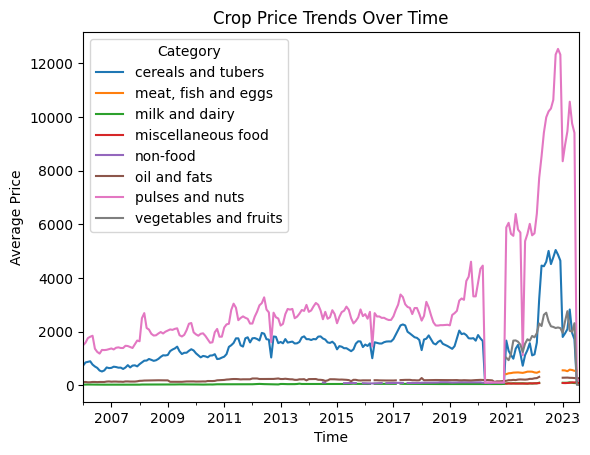

In [ ]:
# Grouping data by time and category
time_category_prices = merged_df.groupby(['time', 'category'])['price'].mean().unstack()

# Plotting trends over time
plt.figure(figsize=(12, 8))
time_category_prices.plot(title='Crop Price Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.legend(title='Category')
plt.show();

Over the years, there has been a noticeable upward trend in the prices of pulses and nuts, as well as cereals and tubers, whereas the prices for other categories such as milk and dairy have remained relatively stable.

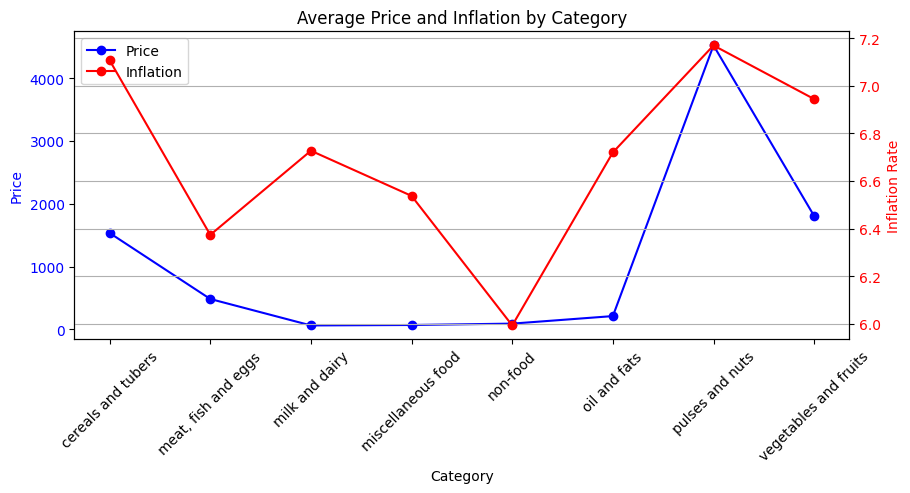

In [ ]:
import matplotlib.pyplot as plt

# Group the data by category and calculate the average price and inflation
grouped_data = merged_df.groupby('category')[['price', 'inflation rate']].mean().reset_index()

# Create a line graph with a secondary y-axis for inflation
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot average price on the primary y-axis
ax1.plot(grouped_data['category'], grouped_data['price'], marker='o', linestyle='-', label='Price', color='b')
ax1.set_xlabel('Category')
ax1.set_ylabel('Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for inflation
ax2 = ax1.twinx()
ax2.plot(grouped_data['category'], grouped_data['inflation rate'], marker='o', linestyle='-', label='Inflation', color='r')
ax2.set_ylabel('Inflation Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate the x-axis labels
ax1.set_xticklabels(grouped_data['category'], rotation=45)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='best')

plt.title('Average Price and Inflation by Category')
plt.grid(True)
plt.show()


The line graph shows that the average price of all categories has increased over time. However, the rate of inflation varies by category. Pulses and nuts, cereals and tubers are experiencing the highest inflation

Correlation Analysis: We calculated the correlation coefficient to measure the strength and direction of the linear relationship between continuous variables

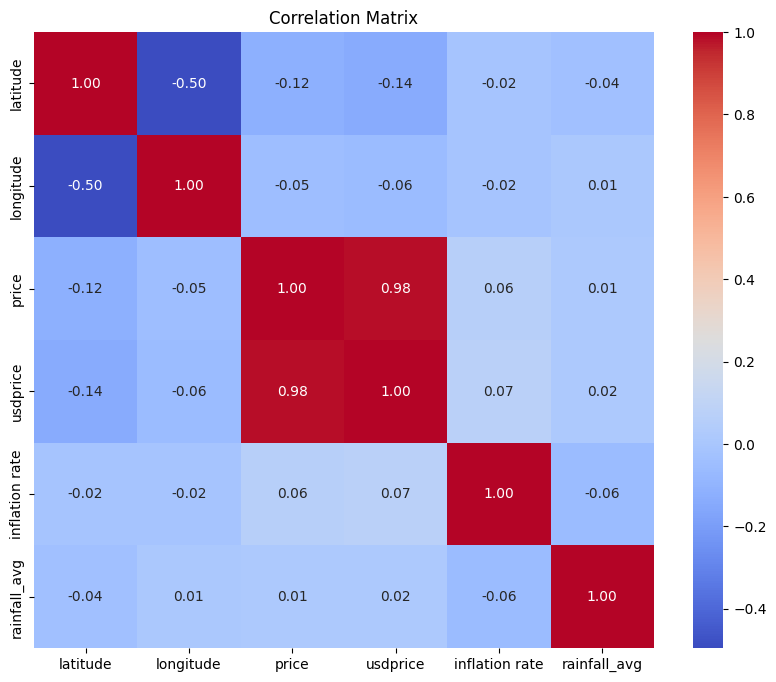

In [ ]:
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

USD price and price in KES are the variables with the highest correlation of 0.98.


### 3.3 Feature Engineering


1.   Create a feature to represent the seasons (wet and dry) based on the rainfall averages.
2.   Cluster Analysis: Creating clusters based on regions
3. Feature selection based on importance



Seasons

In [ ]:
# Define the season_type function
def season_type(rainfall_avg, wet_threshold=50.0, dry_threshold=20.0):
    if rainfall_avg >= wet_threshold:
        return 'Wet'
    elif rainfall_avg <= dry_threshold:
        return 'Dry'
    else:
        return 'Intermediate'

# Apply the season_type function to create a 'season' column
merged_df['season'] = merged_df['rainfall_avg'].apply(season_type)

# Print the updated DataFrame
merged_df.head()


date province   county   market  latitude  longitude  \
time                                                                    
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01-01 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667   
2006-01-01 2006-01-15  Eastern    Kitui    Kitui -1.366667  38.016667   

                      category      commodity   unit priceflag  pricetype  \
time                                                                        
2006-01-01  cereals and tubers          Maize     KG    actual  Wholesale   
2006-01-01  cereals and tubers  Maize (white)  90 KG    actual  Wholesale   
2006-01-01     pulses and nuts          Beans     KG    actual  Wholesale   
2006-01-01     pulses and nuts    Beans (dry)  90 KG    actual  Wholesale   
2006-01-01  cereals and tubers  Maize (white)     KG    actual     Retail   

           currency    price  usdprice  inflation rate  rainfall_avg season  
time                                                                         
2006-01-01      KES    16.13    0.2235            8.39        5.2364    Dry  
2006-01-01      KES  1480.00   20.5041            8.39        5.2364    Dry  
2006-01-01      KES    33.63    0.4659            8.39        5.2364    Dry  
2006-01-01      KES  3246.00   44.9705            8.39        5.2364    Dry  
2006-01-01      KES    17.00    0.2355            8.39        5.2364    Dry

In [ ]:
merged_df['season'].value_counts()

Dry             11232
Intermediate     4210
Wet               498
Name: season, dtype: int64

We determine the type of season (wet or dry) based on the average rainfall;
- Wet: if the rainfall_avg is above the wet_threshold
- Dry: if it's below the dry_threshold
- Intermediate: if it falls in between

This classification is based on the fact that most crops in Kenya require at least 50 mm of rainfall per month in order to grow properly. Months with less than 20 mm of rainfall are often considered dry or arid. Therefore, a month with less than 20 mm of rainfall is likely to be too dry for most crops to grow, and is therefore considered to be a dry month.

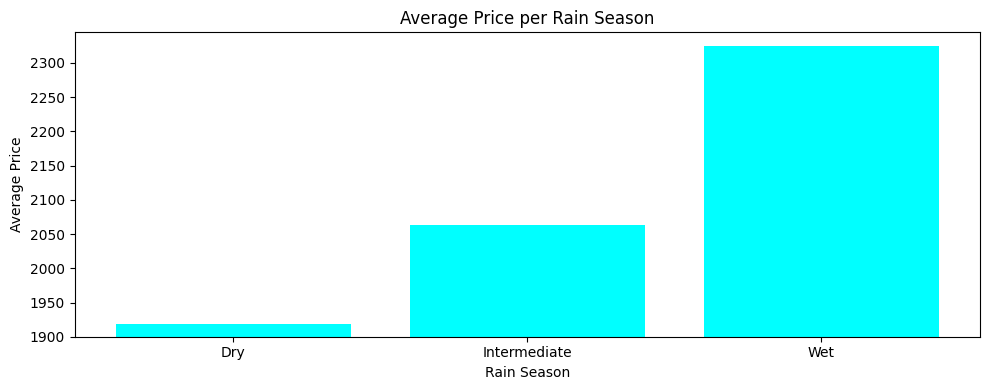

In [ ]:
# create a bar graph to visualize the average price per rain season

# Group by 'rain_season' and calculate the mean price
rain_season_prices = merged_df.groupby('season')['price'].mean()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Plot for rain season
ax.bar(rain_season_prices.index, rain_season_prices.values, color='cyan')
ax.set_title('Average Price per Rain Season')
ax.set_xlabel('Rain Season')
ax.set_ylabel('Average Price')
ax.set_ylim(1900, max(rain_season_prices.values) + 20)  # Set the y-axis limit

plt.tight_layout()
plt.show()



The price of commodities is higher during the wet seasons

Scatter Plots

We created scatter plots to visualize the relationship between two continuous variables "latitude" and "longitude"

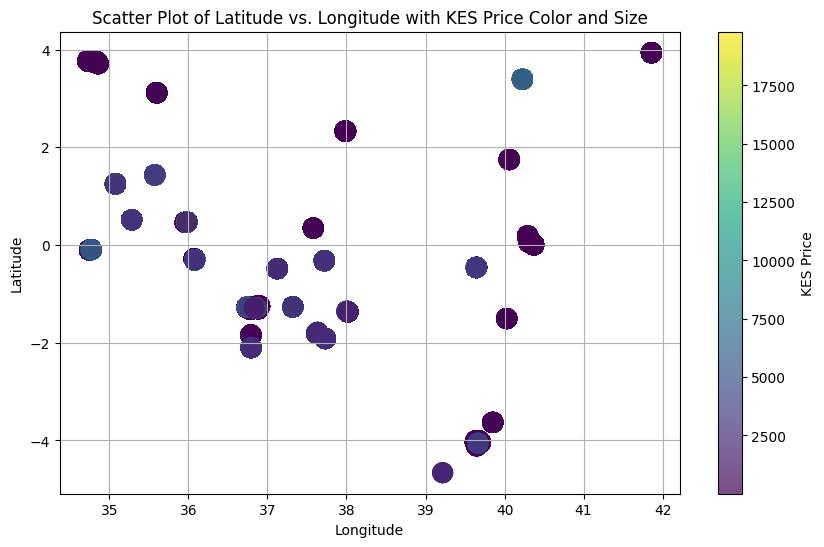

In [ ]:
# Scatter plot indicating price in KES

# Extract the relevant data
latitude = merged_df['latitude']
longitude = merged_df['longitude']
KES_price = merged_df['price']

# Create a scatter plot with color and size differentiation
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=KES_price, s=200, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Latitude vs. Longitude with KES Price Color and Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='KES Price')
plt.grid(True)
plt.show()

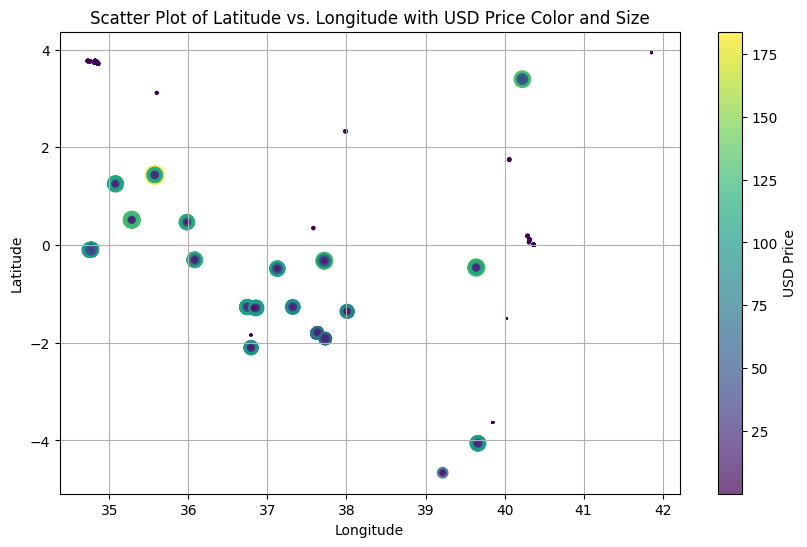

In [ ]:
# Scatter plot indicating price in USD

# Extract the relevant data
latitude = merged_df['latitude']
longitude = merged_df['longitude']
usd_price = merged_df['usdprice']

# Create a scatter plot with color and size differentiation
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=usd_price, s=usd_price, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Latitude vs. Longitude with USD Price Color and Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='USD Price')
plt.grid(True)
plt.show()

Interpretation:

- Clusters of points with similar colors and sizes can indicate regions with similar price levels.
- Variations in color and size across the plot suggest spatial differences in food prices. For example, you may observe regions with higher-priced or lower-priced food commodities.
- Outliers, represented as individual data points with distinct colors and sizes, may highlight areas with significantly different price levels compared to their surroundings.

Overall, this scatter plot offers a visual representation of how food prices are distributed across different geographical coordinates, enabling you to identify spatial patterns and trends in the dataset.

Cluster Analysis

Segment regions based on crops and prices

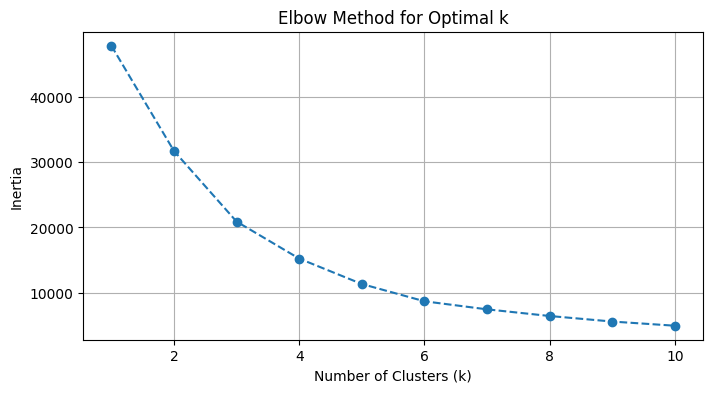

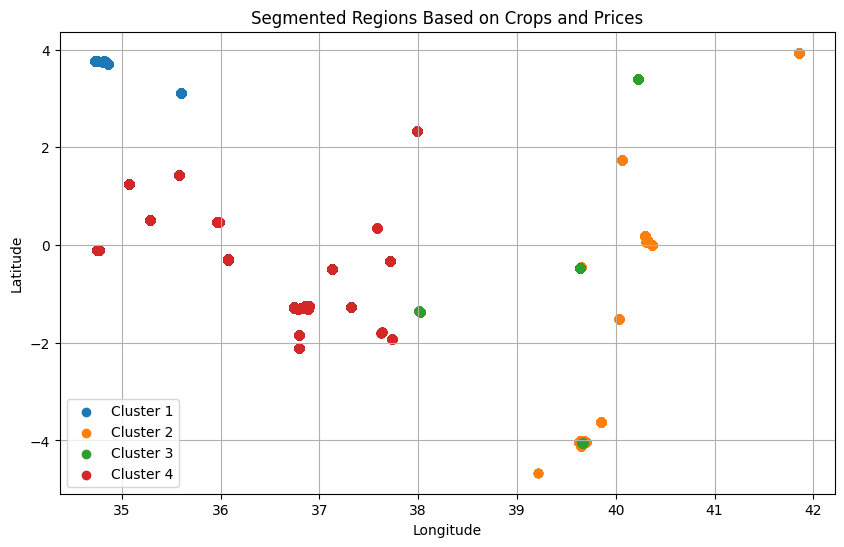

In [ ]:
# Extract relevant features (e.g., latitude, longitude, and price) for clustering
features = merged_df[['latitude', 'longitude', 'price']]

# Normalize the features to ensure equal weight in clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to help choose the number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., k=4)
optimal_k = 4

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataset
merged_df['cluster'] = clusters

# Visualize the results on a scatter plot (latitude vs. longitude)
plt.figure(figsize=(10, 6))
for cluster_num in range(optimal_k):
    cluster_data = merged_df[merged_df['cluster'] == cluster_num]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Segmented Regions Based on Crops and Prices')
plt.legend()
plt.grid(True)
plt.show()

# Now, 'merged_df' contains the cluster labels for each region based on crops and prices


In [ ]:
import folium
from folium import plugins

# Create a map centered around Kenya
m = folium.Map(location=[0.0236, 37.9062], zoom_start=6)

# Add heatmaps based on latitude and longitude
heat_data = [[row['latitude'], row['longitude']] for _, row in merged_df.iterrows()]
plugins.HeatMap(heat_data).add_to(m)

# Display the map
m.save('food_prices_heatmap.html')

[Kenya food prices heatmap ](https://colab.research.google.com/drive/1GJVle5e-ZaJz9WZh0l2100CSlvXt6Pbc#scrollTo=n9ApWH98jkyX&line=1&uniqifier=1)

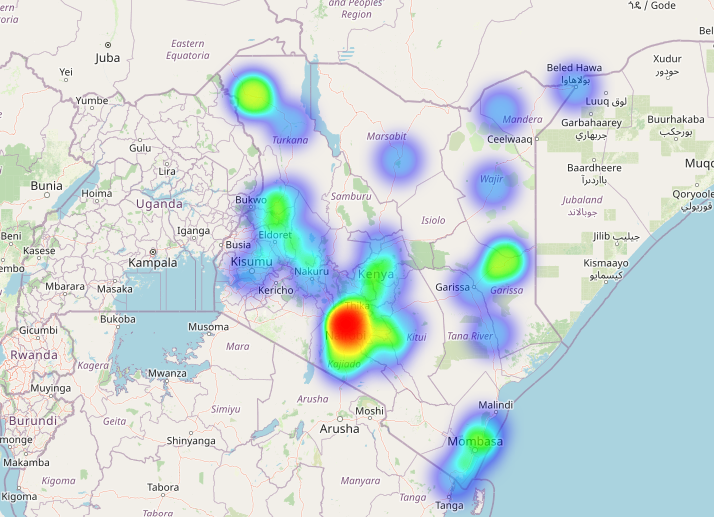

The heatmap represents the density or concentration of data points with latitude and longitude coordinates on the map.
Areas with a higher concentration of data points will appear "hotter" (more intense) in color, while areas with fewer data points will appear "cooler" (less intense) in color.

In [ ]:
import folium

# Create a map centered around Kenya
m = folium.Map(location=[0.0236, 37.9062], zoom_start=6)

# Define colors for the clusters
colors = ['red', 'blue', 'green', 'purple']

# Assuming 'cluster_label' is the correct column for cluster labels
for cluster_num in range(4):  # Assuming you have 4 clusters
    cluster_df = merged_df[merged_df['cluster'] == cluster_num]

    for _, row in cluster_df.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color=colors[cluster_num],
            fill=True,
            fill_color=colors[cluster_num],
            fill_opacity=0.7,
            popup=f'Cluster {cluster_num}',
        ).add_to(m)

# Display the map
m.save('clustered_map.html')

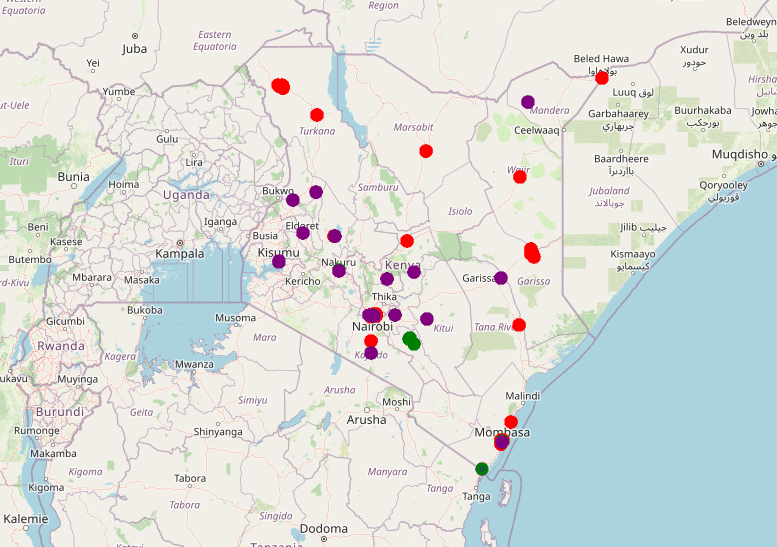

#### Feature Selection
1. Exploring  underlying factors in the  the data through factor analysis to determine features more important in predicting price
2. Selecting the specific commodities to proceed with based on frequency in the dataset and commonality in a standard kenyan household


*Factor Analysis:* focused on identifying underlying factors or latent variables that explained the patterns in the data. This helped uncover hidden relationships among variables.

In [ ]:
from sklearn.decomposition import FactorAnalysis

# Select relevant numerical columns for factor analysis
numerical_columns = ['latitude', 'longitude', 'price', 'usdprice', 'inflation rate']
data_for_factor_analysis = merged_df[numerical_columns]

# Apply Factor Analysis
fa = FactorAnalysis(n_components=3)
fa_result = fa.fit_transform(data_for_factor_analysis)

# Visualize the factor loadings
loadings = fa.components_
loadings_df = pd.DataFrame(loadings, columns=numerical_columns)
print("Factor Loadings:")
print(loadings_df)

Factor Loadings:
   latitude  longitude        price   usdprice  inflation rate
0 -0.262406  -0.090503  2996.570038  26.861465        0.175960
1 -0.273578  -0.152095    -0.041225   4.640439        0.314915
2  0.016616  -0.006324     0.001419  -0.176909        2.591869


Factor loadings indicate the strength and direction of the relationships between the observed variables (latitude, longitude, price, usdprice, and inflation rate) extracted by the factor analysis.
- Factor 0: Latitude has a moderate negative loading (-0.2624) on this factor. Longitude has a small negative loading (-0.0905) on this factor. Price has a strong positive loading (2996.5700) on this factor. USD price has a moderate positive loading (26.8615) on this factor. Inflation rate has a small positive loading (0.1759) on this factor.
 - Interpretation: This factor appears to be related to the price and USD price of products, with a potential geographical component (latitude and longitude). It suggests that prices tend to be higher in areas associated with higher latitude and longitude values.
- Factor 1: Latitude has a moderate negative loading (-0.2736) on this factor. Longitude has a moderate negative loading (-0.1521) on this factor. Price has a very small negative loading (-0.0412) on this factor. USD price has a small positive loading (4.6404) on this factor. Inflation rate has a moderate positive loading (0.3149) on this factor.
 - Interpretation: This factor seems to represent a combination of latitude, longitude, and inflation rate. It suggests that regions with lower latitude and longitude values are associated with lower inflation rates and slightly lower USD prices.

- Factor 2: Latitude has a very small positive loading (0.0166) on this factor. Longitude has a small negative loading (-0.0063) on this factor. Price has a very small positive loading (0.0014) on this factor. USD price has a moderate negative loading (-0.1769) on this factor. Inflation rate has a very strong positive loading (2.5919) on this factor.
 - Interpretation: This factor appears to be primarily driven by the inflation rate. It suggests that areas with higher inflation rates are associated with lower USD prices and have a minor geographical component with latitude and longitude.

*Selecting Specific Commodities*

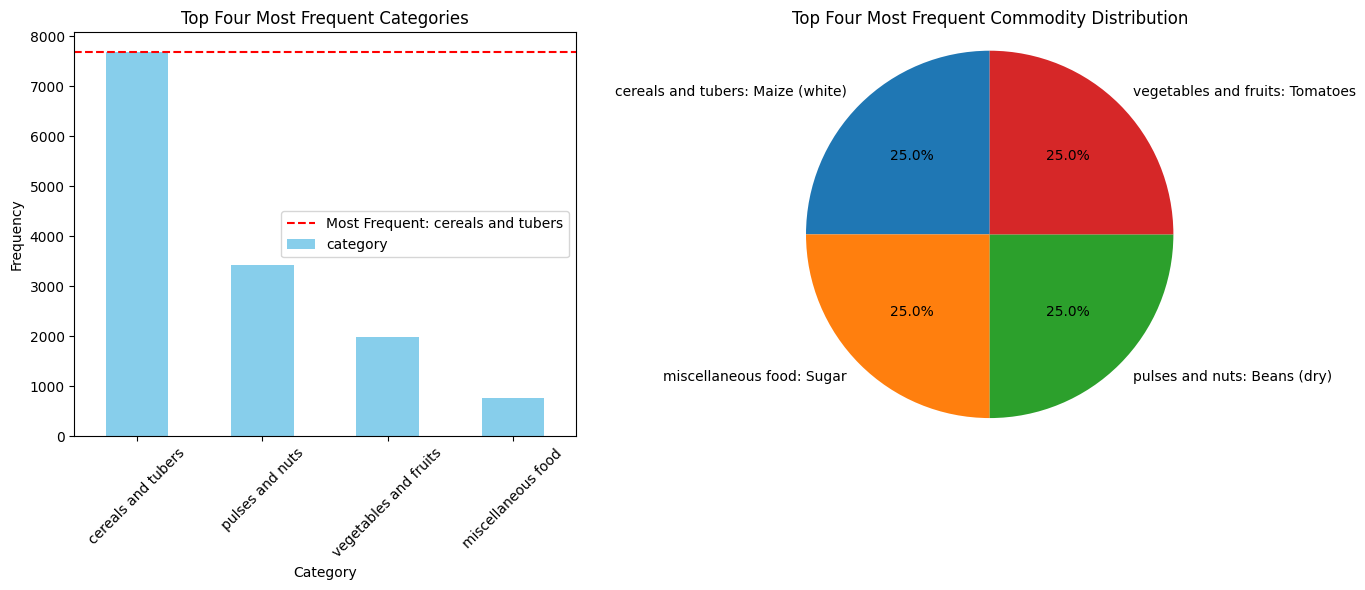

In [ ]:
# Selecting Top four commodities to predict price on based on frequency

# Count the occurrences of each category
category_counts = merged_df['category'].value_counts()

# Select the top four most frequent categories
top_four_categories = category_counts.head(4).index

# Find the most frequent category (for highlighting)
most_frequent_category = category_counts.idxmax()

# Group by 'category' and find the most frequent commodity within each group
most_frequent_commodities = merged_df.groupby('category')['commodity'].agg(lambda x: x.mode().iloc[0])

# Reset the index of the resulting Series
most_frequent_commodities = most_frequent_commodities.reset_index()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar graph of the top four most frequent categories on the left subplot
category_counts[top_four_categories].plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top Four Most Frequent Categories')
axes[0].set_xticklabels(top_four_categories, rotation=45)
axes[0].axhline(y=category_counts[most_frequent_category], color='red', linestyle='--', label=f'Most Frequent: {most_frequent_category}')
axes[0].legend()

# Plot the pie chart of the top four most frequent commodities on the right subplot
top_four_commodities = most_frequent_commodities[most_frequent_commodities['category'].isin(top_four_categories)]
axes[1].pie(top_four_commodities['commodity'].value_counts(), labels=top_four_commodities['category'] + ': ' + top_four_commodities['commodity'], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1].set_title('Top Four Most Frequent Commodity Distribution')

# Adjust the layout
plt.tight_layout()

# Show the combined figure
plt.show()



We decided to drop tomatoes and sugar due to data insufficiency and proceeded with maize and beans


**Maize**

Here we create a maize dataframe by filtering rows where the 'commodity' column contains the word "Maize," and calculate the unit(KG) price for maize

In [ ]:
# Filter rows where the 'commodity' column contains the word "Maize"
maize_df = merged_df[merged_df['commodity'].str.contains('Maize', case=False, na=False)]

# Reset the index of the new DataFrame
maize_df.reset_index(drop=True, inplace=True)

# Split the 'unit' column into 'quantity' and 'unit' columns
maize_df[['quantity', 'unit']] = maize_df['unit'].str.split(n=1, expand=True)
# Convert the 'quantity' column to numeric (assuming it contains numerical values)
maize_df['quantity'] = pd.to_numeric(maize_df['quantity'], errors='coerce')
# Fill NaN values in 'quantity' with 1
maize_df['quantity'].fillna(1, inplace=True)
# Fill NaN values in 'unit' with 'KG'
maize_df['unit'].fillna('KG', inplace=True)

# Calculate the price per unit and store it in a new column 'price_per_unit'
maize_df['price_per_unit'] = maize_df['price'] / maize_df['quantity']
maize_df.head()

date province    county    market  latitude  longitude  \
0 2006-01-15    Coast   Mombasa   Mombasa -4.050000  39.666667   
1 2006-01-15    Coast   Mombasa   Mombasa -4.050000  39.666667   
2 2006-01-15  Eastern     Kitui     Kitui -1.366667  38.016667   
3 2006-01-15  Eastern  Marsabit  Marsabit  2.333333  37.983333   
4 2006-01-15  Nairobi   Nairobi   Nairobi -1.283333  36.816667   

             category      commodity unit priceflag  pricetype currency  \
0  cereals and tubers          Maize   KG    actual  Wholesale      KES   
1  cereals and tubers  Maize (white)   KG    actual  Wholesale      KES   
2  cereals and tubers  Maize (white)   KG    actual     Retail      KES   
3  cereals and tubers  Maize (white)   KG    actual     Retail      KES   
4  cereals and tubers          Maize   KG    actual  Wholesale      KES   

     price  usdprice  inflation rate  rainfall_avg season  cluster  quantity  \
0    16.13    0.2235            8.39        5.2364    Dry        1       1.0   
1  1480.00   20.5041            8.39        5.2364    Dry        1      90.0   
2    17.00    0.2355            8.39        5.2364    Dry        1       1.0   
3    21.00    0.2909            8.39        5.2364    Dry        3       1.0   
4    15.48    0.2145            8.39        5.2364    Dry        3       1.0   

   price_per_unit  
0       16.130000  
1       16.444444  
2       17.000000  
3       21.000000  
4       15.480000

**Beans**

We create a beans dataframe by filtering rows where the 'commodity' column contains the word "Beans," and calculate the unit(KG) price for beans

In [ ]:
# Filter rows where the 'commodity' column contains the word "Beans"
beans_df = merged_df[merged_df['commodity'].str.contains('Beans', case=False, na=False)]

# Reset the index of the new DataFrame
beans_df.reset_index(drop=True, inplace=True)

# Split the 'unit' column into 'quantity' and 'unit' columns
beans_df[['quantity', 'unit']] = beans_df['unit'].str.split(n=1, expand=True)
# Convert the 'quantity' column to numeric (assuming it contains numerical values)
beans_df['quantity'] = pd.to_numeric(beans_df['quantity'], errors='coerce')
# Fill NaN values in 'quantity' with 1
beans_df['quantity'].fillna(1, inplace=True)
# Fill NaN values in 'unit' with 'KG'
beans_df['unit'].fillna('KG', inplace=True)

# Calculate the price per unit and store it in a new column 'price_per_unit'
beans_df['price_per_unit'] = beans_df['price'] / beans_df['quantity']
beans_df.head()

date province   county   market  latitude  longitude         category  \
0 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667  pulses and nuts   
1 2006-01-15    Coast  Mombasa  Mombasa -4.050000  39.666667  pulses and nuts   
2 2006-01-15  Eastern    Kitui    Kitui -1.366667  38.016667  pulses and nuts   
3 2006-01-15  Nairobi  Nairobi  Nairobi -1.283333  36.816667  pulses and nuts   
4 2006-01-15  Nairobi  Nairobi  Nairobi -1.283333  36.816667  pulses and nuts   

     commodity unit priceflag  pricetype currency    price  usdprice  \
0        Beans   KG    actual  Wholesale      KES    33.63    0.4659   
1  Beans (dry)   KG    actual  Wholesale      KES  3246.00   44.9705   
2  Beans (dry)   KG    actual     Retail      KES    39.00    0.5403   
3        Beans   KG    actual  Wholesale      KES    42.31    0.5862   
4  Beans (dry)   KG    actual  Wholesale      KES  3175.00   43.9869   

   inflation rate  rainfall_avg season  cluster  quantity  price_per_unit  
0            8.39        5.2364    Dry        1       1.0       33.630000  
1            8.39        5.2364    Dry        1      90.0       36.066667  
2            8.39        5.2364    Dry        1       1.0       39.000000  
3            8.39        5.2364    Dry        3       1.0       42.310000  
4            8.39        5.2364    Dry        3      90.0       35.277778

## 4.0 Modelling

### 4.1 Time Series Modelling



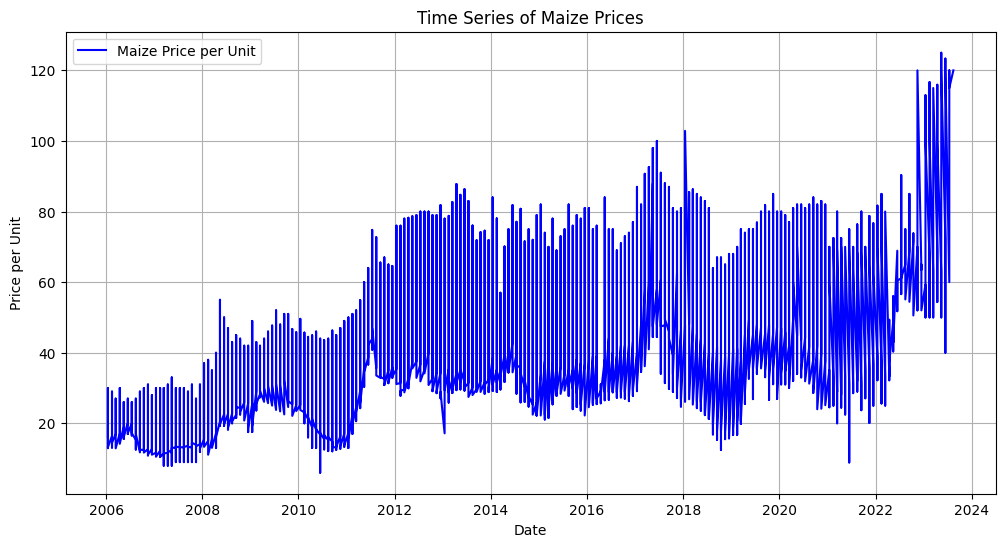

In [ ]:
# Plot the time series of maize prices
plt.figure(figsize=(12, 6))
plt.plot(maize_df['date'], maize_df['price_per_unit'], label='Maize Price per Unit', color='blue')
plt.title('Time Series of Maize Prices')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.grid(True)
plt.show()

The plot shows that the maize prices have been increasing over time, with a few short-term fluctuations. The trend line shows that the average maize price has increased from around 20 KES per KG in 2006 to around 120 KES per KG in 2022.


**Baseline Model for Maize**

- We checked for stationarity using the Augmented Dickey-Fuller (ADF) test  and applied differencing to make the data stationary.
- We decomposed the time series into trend, seasonal, and residual components.
- Utilized autocorrelation and partial autocorrelation plots to determine the order of an SARIMA model.
- Fit a SARIMA model

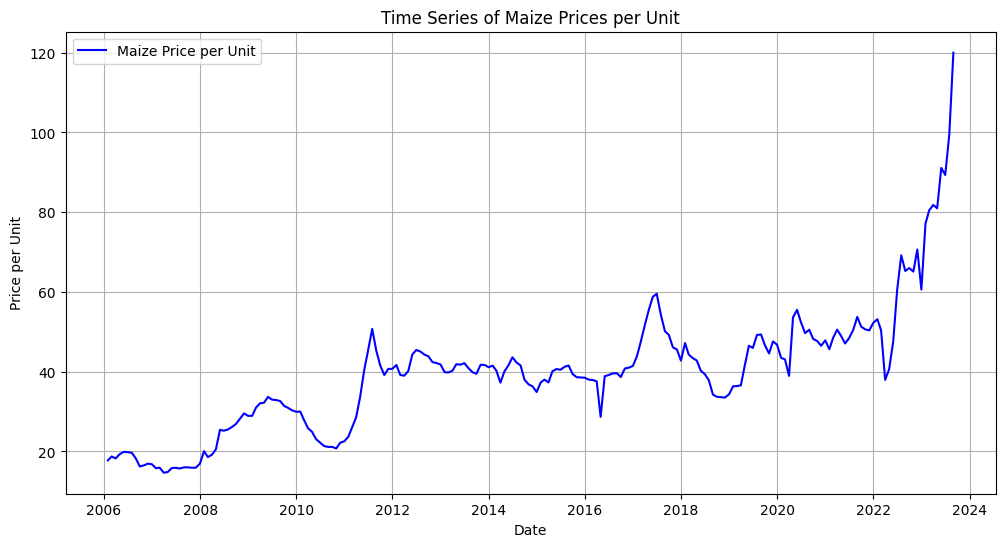

ADF Statistic: 2.2426335071653667
p-value: 0.9989157903879016
Critical Values: {'1%': -3.46172743446274, '5%': -2.8753374677799957, '10%': -2.574124089081557}


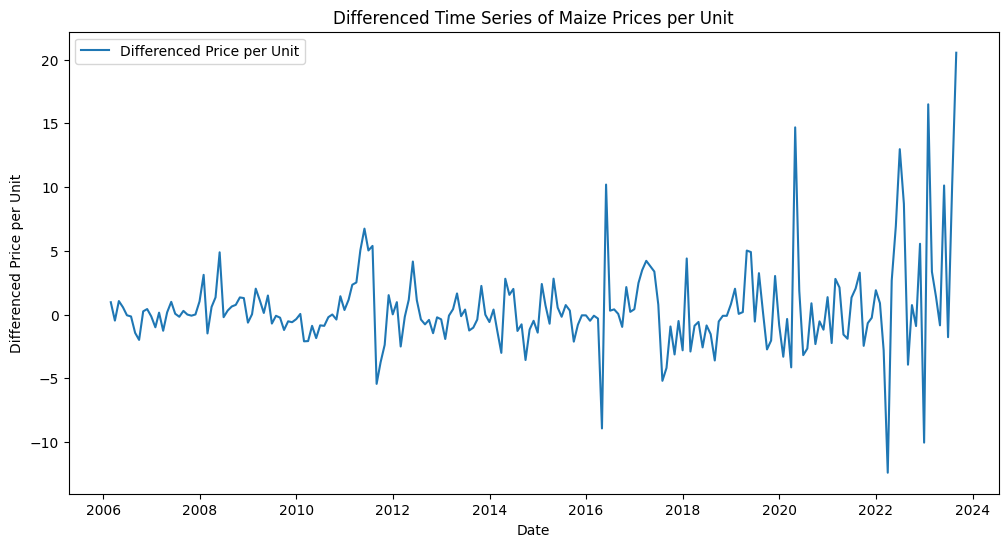

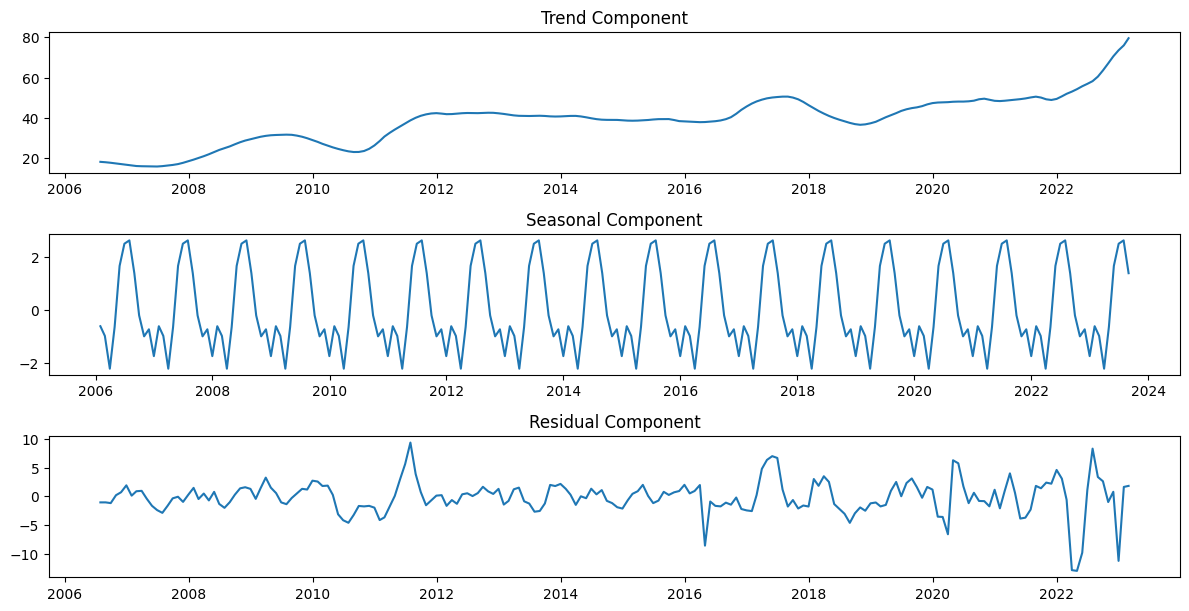

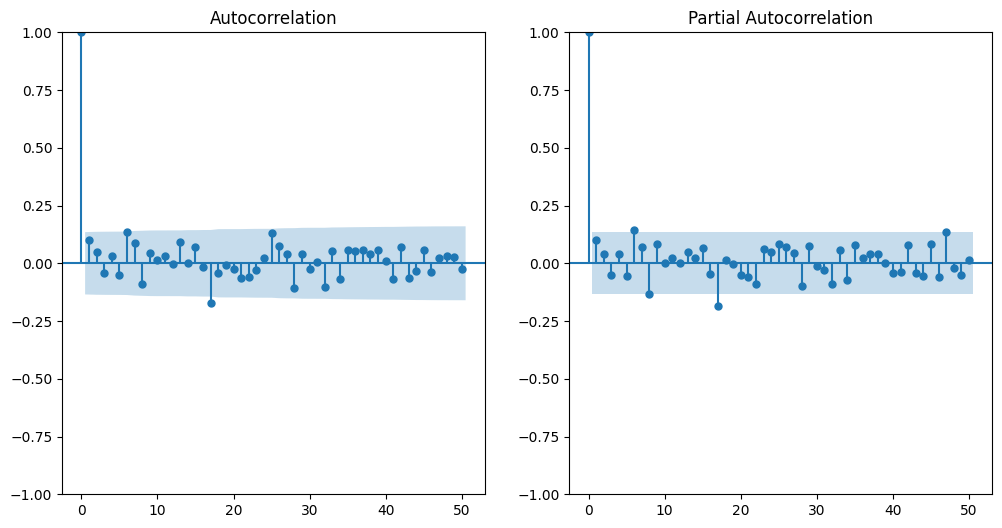

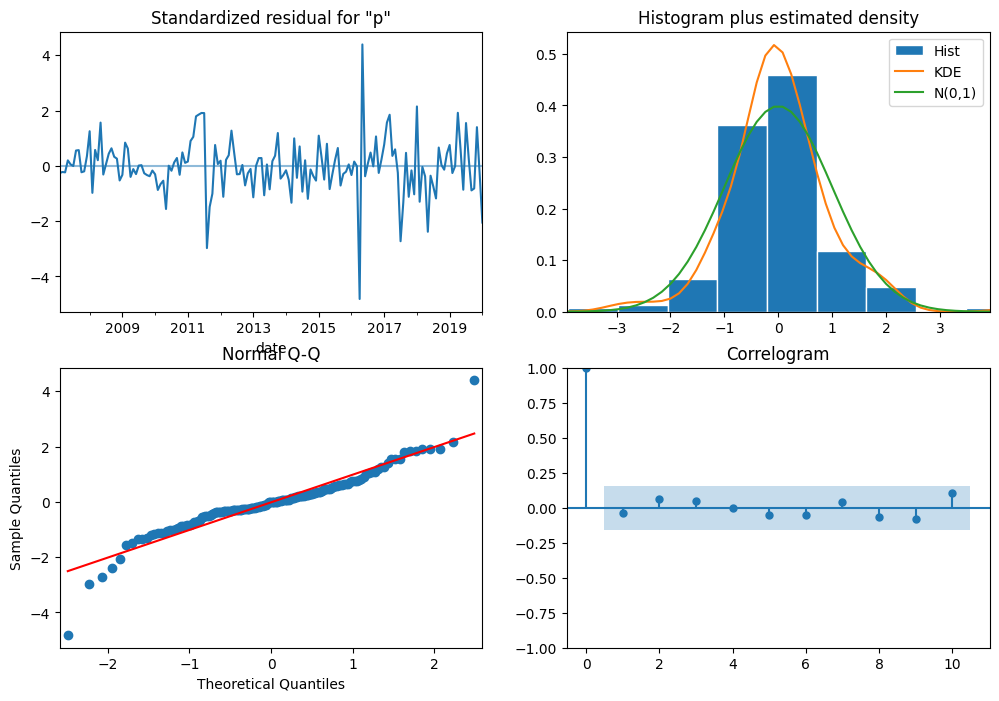

Mean Squared Error (MSE): 427.2543299819735
Root Mean Squared Error (RMSE): 20.670131348928905
R-squared (R2): -0.415472623831322


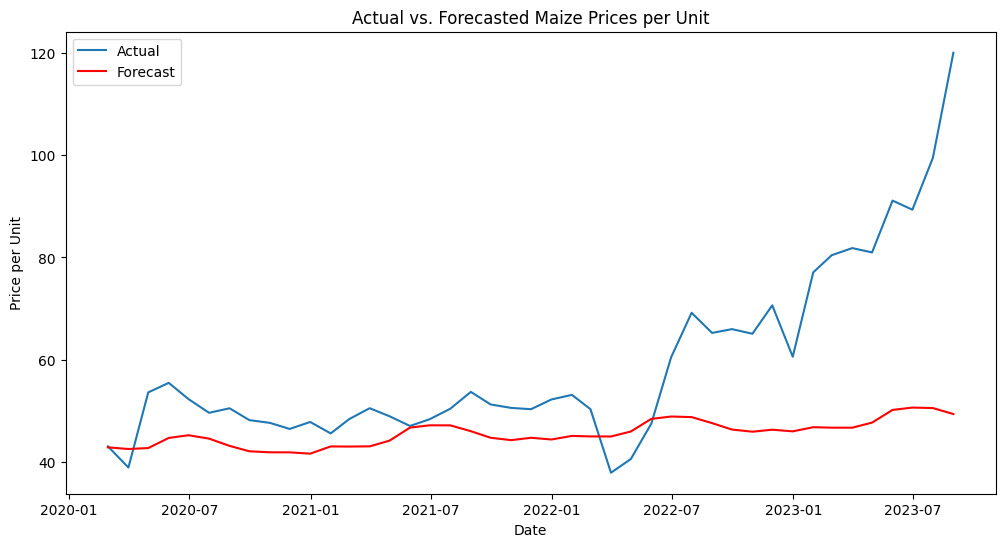

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Load the data (assuming 'maize_df' is already loaded)
data = maize_df

# Set the 'date' column as the DateTimeIndex
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Downsample the data (e.g., to monthly frequency)
data = data.resample('M').mean()

# Plot the time series of maize prices per unit
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['price_per_unit'], label='Maize Price per Unit', color='blue')
plt.title('Time Series of Maize Prices per Unit')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.grid(True)
plt.show()

# Check for stationarity using ADF test
adf_result = adfuller(data['price_per_unit'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# If the data is not stationary, apply differencing
if adf_result[1] > 0.05:
    data['price_diff'] = data['price_per_unit'] - data['price_per_unit'].shift(1)

    # Plot differenced time series
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[1:], data['price_diff'].iloc[1:], label='Differenced Price per Unit')
    plt.title('Differenced Time Series of Maize Prices per Unit')
    plt.xlabel('Date')
    plt.ylabel('Differenced Price per Unit')
    plt.legend()
    plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['price_per_unit'], model='additive', period=12)  # Monthly seasonality

# Plot decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data.index, decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.subplot(412)
plt.plot(data.index, decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(413)
plt.plot(data.index, decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.tight_layout()

# Use ACF and PACF plots to determine the order of ARIMA model
plt.figure(figsize=(12, 6))
plot_acf(data['price_diff'].dropna(), lags=50, ax=plt.subplot(121))
plot_pacf(data['price_diff'].dropna(), lags=50, ax=plt.subplot(122))
plt.show()

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data['price_per_unit'][:train_size], data['price_per_unit'][train_size:]

# Fit SARIMAX model
order = (1, 1, 1)  # Specify the ARIMA order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Monthly seasonal order (P, D, Q, S)
sarimax_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarimax_result = sarimax_model.fit()

# Model diagnostics
sarimax_result.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast future prices
n_forecast = len(test)
forecast = sarimax_result.get_forecast(steps=n_forecast)

# Calculate MSE and RMSE
mse = mean_squared_error(test, forecast.predicted_mean)
rmse = sqrt(mse)
r_squared = r2_score(test, forecast.predicted_mean)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r_squared}')

# Plot actual vs. forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size:], test, label='Actual')
plt.plot(data.index[train_size:], forecast.predicted_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Maize Prices per Unit')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.show()

The MSE is approximately 427.25. This means, on average, the squared difference between the actual maize prices and the predicted prices is 427.25.the RMSE is approximately 20.67. This means, on average, the difference between the actual maize prices and the predicted prices is approximately 20.67

**Hyperparameter tuning the model**

In [ ]:
import itertools

# Define the hyperparameter search space excluding the problematic combinations
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
P_values = [0, 1, 2]
D_values = [0, 1]
Q_values = [0, 1, 2]
seasonal_periods = [12]  # Assuming monthly seasonality

# Initialize variables to store the best hyperparameters and RMSE
best_rmse = float('inf')
best_order = None
best_seasonal_order = None

# Perform grid search excluding problematic combinations
for p, d, q, P, D, Q, S in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, seasonal_periods):
    order = (p, d, q)
    seasonal_order = (P, D, Q, S)

    # Skip problematic combinations
    if order == (1, 1, 2) and seasonal_order == (2, 0, 1, 12):
        continue

    # Fit SARIMAX model with current hyperparameters
    sarimax_model = SARIMAX(train, order=order, seasonal_order=seasonal_order, initialization='approximate_diffuse')
    sarimax_result = sarimax_model.fit()

    # Forecast future prices
    forecast = sarimax_result.get_forecast(steps=n_forecast)

    # Calculate RMSE
    mse = mean_squared_error(test, forecast.predicted_mean)
    rmse = sqrt(mse)

    # Check if current RMSE is the best so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_order = order
        best_seasonal_order = seasonal_order

# Print the best hyperparameters
print("Best Hyperparameters:")
print("Non-seasonal Order (p, d, q):", best_order)
print("Seasonal Order (P, D, Q, S):", best_seasonal_order)
print("Best RMSE:", best_rmse)

# Use the best hyperparameters to train the final model
final_sarimax_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order, initialization='approximate_diffuse')
final_sarimax_result = final_sarimax_model.fit()

# Forecast with the final model
final_forecast = final_sarimax_result.get_forecast(steps=n_forecast)



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best Hyperparameters:
Non-seasonal Order (p, d, q): (0, 1, 0)
Seasonal Order (P, D, Q, S): (0, 1, 0, 12)
Best RMSE: 12.173622745081646


These hyperparameters suggest that the SARIMA model has no autoregressive (AR) terms (p=0), one differencing order (d=1), and no moving average (MA) terms (q=0) for the non-seasonal component. For the seasonal component, there are no seasonal AR terms (P=0), one seasonal differencing order (D=1), no seasonal MA terms (Q=0), and a seasonal period of 12 (monthly seasonality).

Final RMSE: 12.173622745081646
Final R-squared (R2): -0.415472623831322


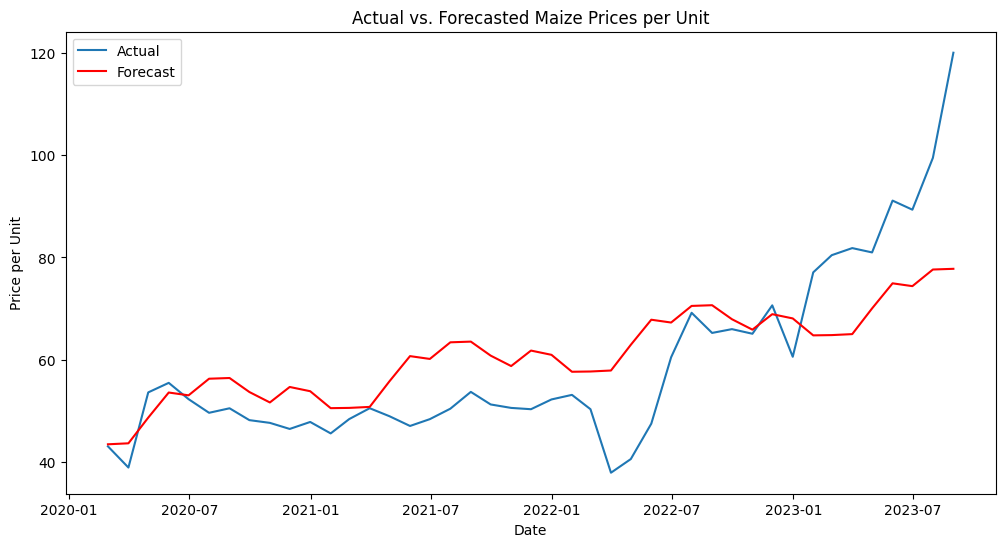

In [ ]:
# Fit SARIMAX model with the best hyperparameters
final_sarimax_model = SARIMAX(train, order=(0, 1, 0), seasonal_order=(0, 1, 0, 12), initialization='approximate_diffuse')
final_sarimax_result = final_sarimax_model.fit()

# Forecast with the final model
final_forecast = final_sarimax_result.get_forecast(steps=n_forecast)

# Calculate RMSE for the final forecast
final_mse = mean_squared_error(test, final_forecast.predicted_mean)
final_rmse = sqrt(final_mse)
final_r2 = r2_score(test, final_forecast.predicted_mean)
print("Final RMSE:", final_rmse)
print(f'Final R-squared (R2): {r_squared}')

# Plot actual vs. forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size:], test, label='Actual')
plt.plot(data.index[train_size:], final_forecast.predicted_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Maize Prices per Unit')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt  # Import sqrt function for RMSE

# Calculate Mean Absolute Error (MAE)
Maize_TS_mae = mean_absolute_error(test, final_forecast.predicted_mean)
print(f"Mean Absolute Error (MAE): {Maize_TS_mae:.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
Maize_TS_mape = mean_absolute_percentage_error(test, final_forecast.predicted_mean) * 100
print(f"Mean Absolute Percentage Error (MAPE): {Maize_TS_mape:.2f}%")

# Calculate Mean Squared Error (MSE)
Maize_TS_mse = mean_squared_error(test, final_forecast.predicted_mean)
print(f"Mean Squared Error (MSE): {Maize_TS_mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
Maize_TS_rmse = sqrt(Maize_TS_mse)  # Calculate RMSE using MSE
print(f"Root Mean Squared Error (RMSE): {Maize_TS_rmse:.2f}")

# Calculate R-squared (R2)
Maize_TS_r2 = r2_score(test, final_forecast.predicted_mean)
print(f'R-squared (R2): {Maize_TS_r2:.2f}')


Mean Absolute Error (MAE): 9.30
Mean Absolute Percentage Error (MAPE): 15.77%
Mean Squared Error (MSE): 148.20
Root Mean Squared Error (RMSE): 12.17
R-squared (R2): 0.51


MAE measures the average absolute difference between the actual and predicted values.The model's predictions for maize prices per unit are off by about 9.30 units from the actual prices.
MAPE measures the percentage difference between the actual and predicted values, on average.The model's predictions deviate by about 15.77% from the actual maize prices per unit.
RMSE measures the square root of the average of squared differences between the actual and predicted values. In this case, the RMSE is approximately 12.17.

**Forecasting maize  prices for the next 12 months using SARIMA model**

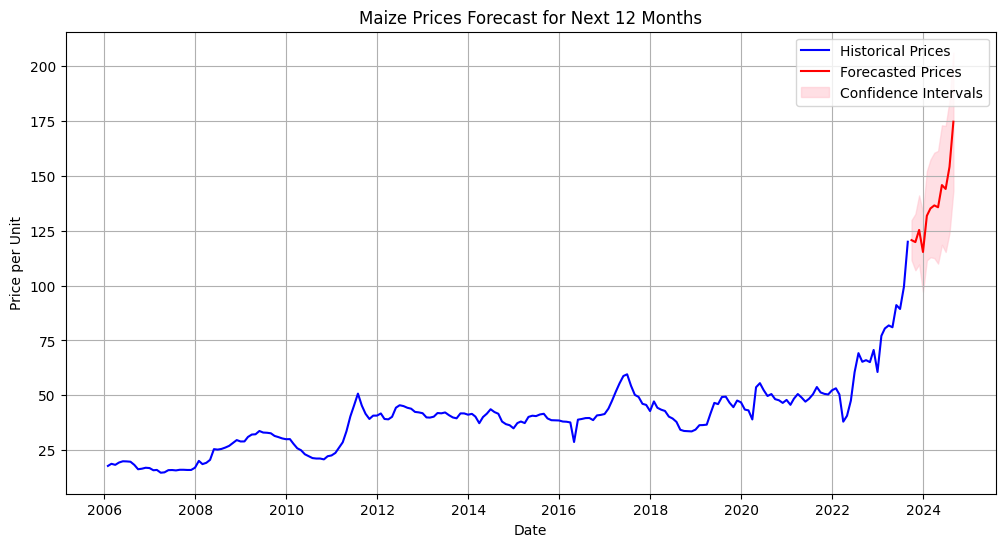

            Forecasted_Price    Lower_CI    Upper_CI
2023-09-30        120.740096  111.658278  129.821914
2023-10-31        119.838129  106.994499  132.681759
2023-11-30        125.388253  109.658083  141.118422
2023-12-31        115.343231   97.179595  133.506866
2024-01-31        131.831822  111.524260  152.139383
2024-02-29        135.187734  112.941914  157.433554
2024-03-31        136.570612  112.542381  160.598843
2024-04-30        135.723780  110.036520  161.411039
2024-05-31        145.846884  118.601430  173.092337
2024-06-30        144.071889  115.352659  172.791118
2024-07-31        154.198290  124.077308  184.319272
2024-08-31        174.733707  143.273367  206.194047


In [ ]:
# Fit SARIMAX model with the best hyperparameters
final_sarimax_model = SARIMAX(data['price_per_unit'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12), initialization='approximate_diffuse')
final_sarimax_result = final_sarimax_model.fit()

# Forecast prices for the next 12 months
n_forecast = 12
forecast = final_sarimax_result.get_forecast(steps=n_forecast)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecasted period
last_date = data.index[-1]
forecast_period = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')

# Create a DataFrame to store the forecasted values and confidence intervals
forecast_df = pd.DataFrame({
    'Forecasted_Price': forecast_values,
    'Lower_CI': confidence_intervals['lower price_per_unit'],
    'Upper_CI': confidence_intervals['upper price_per_unit']
}, index=forecast_period)

# Plot the forecasted prices and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['price_per_unit'], label='Historical Prices', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted_Price'], label='Forecasted Prices', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.5, label='Confidence Intervals')
plt.title('Maize Prices Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecast DataFrame
print(forecast_df)


In [ ]:
import pickle
with open("maize.pkl", "wb") as file:
    pickle.dump(final_sarimax_result, file)

# Load the model from the pickle file
with open("maize.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print(loaded_model)

#### **Beans**

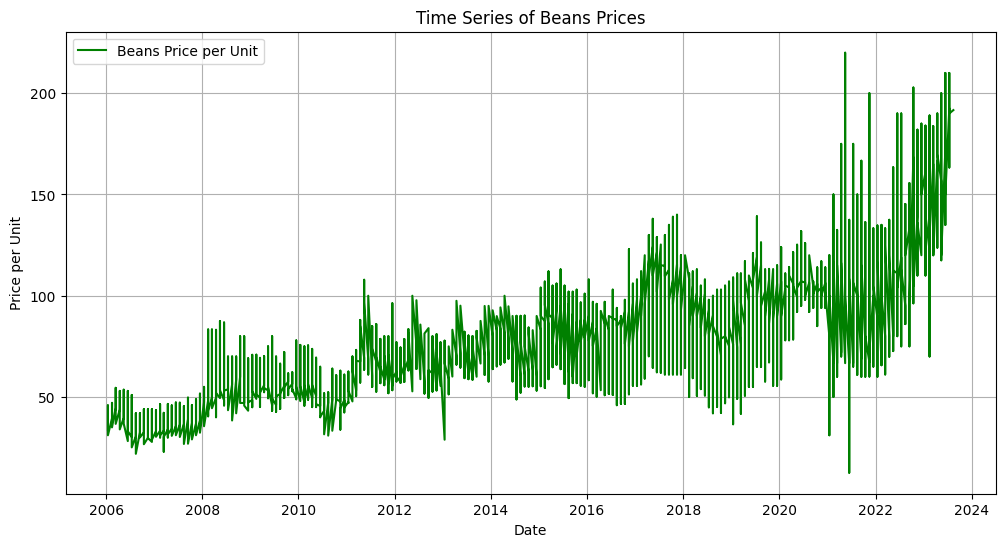

In [ ]:
# Plot the time series of beans prices
plt.figure(figsize=(12, 6))
plt.plot(beans_df['date'], beans_df['price_per_unit'], label='Beans Price per Unit', color='green')
plt.title('Time Series of Beans Prices')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.grid(True)
plt.show()

The beans prices have been increasing over time, with a few short-term fluctuations. The trend line shows that the average beans price has increased from around 50 KES per KG in 2006 to around 200 KES per KG in 2022.

**Baseline Beans Time Series Model**

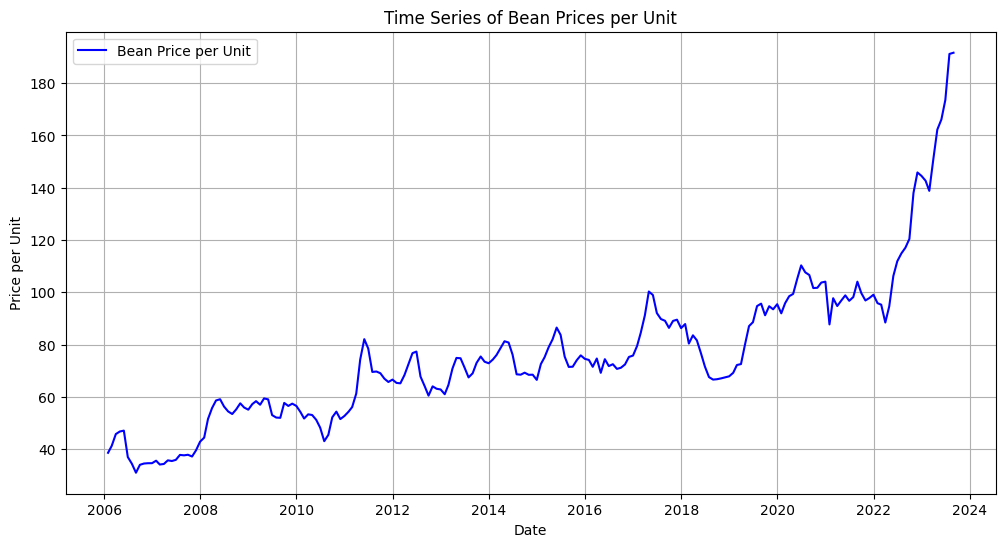

ADF Statistic: 1.0830918674791268
p-value: 0.9950697036171041
Critical Values: {'1%': -3.464161278384219, '5%': -2.876401960790147, '10%': -2.5746921001665974}


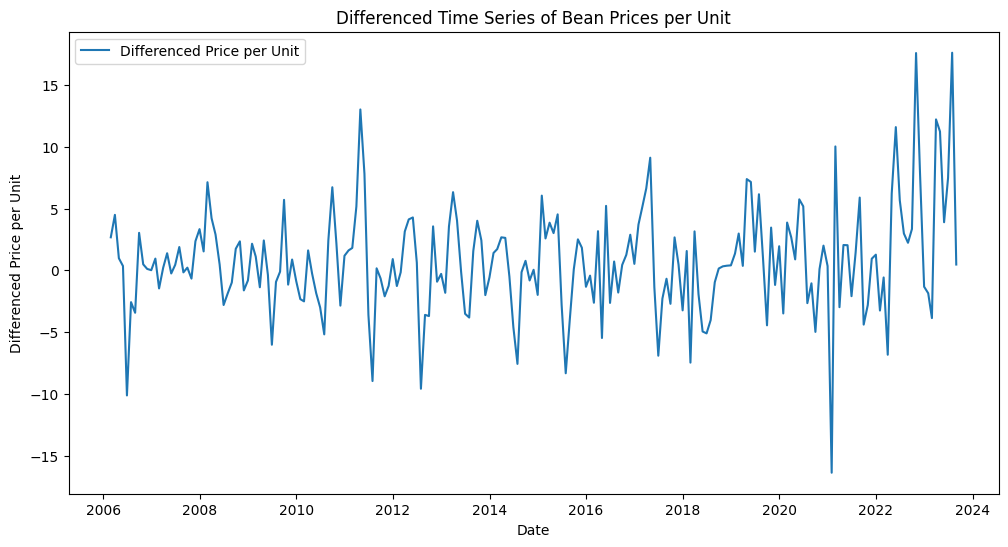

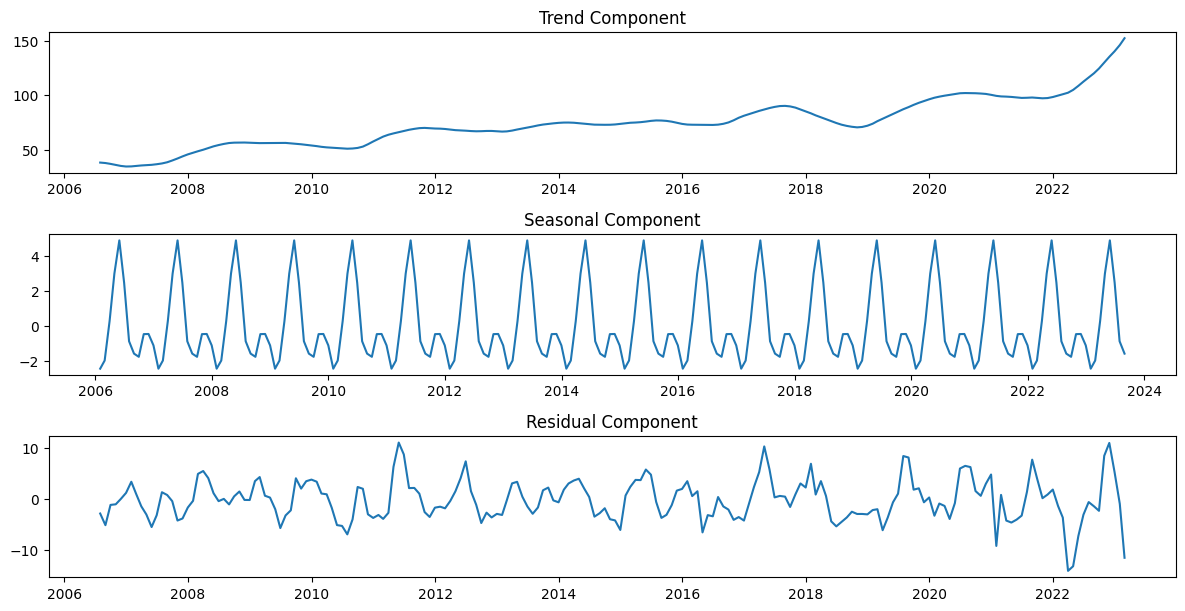

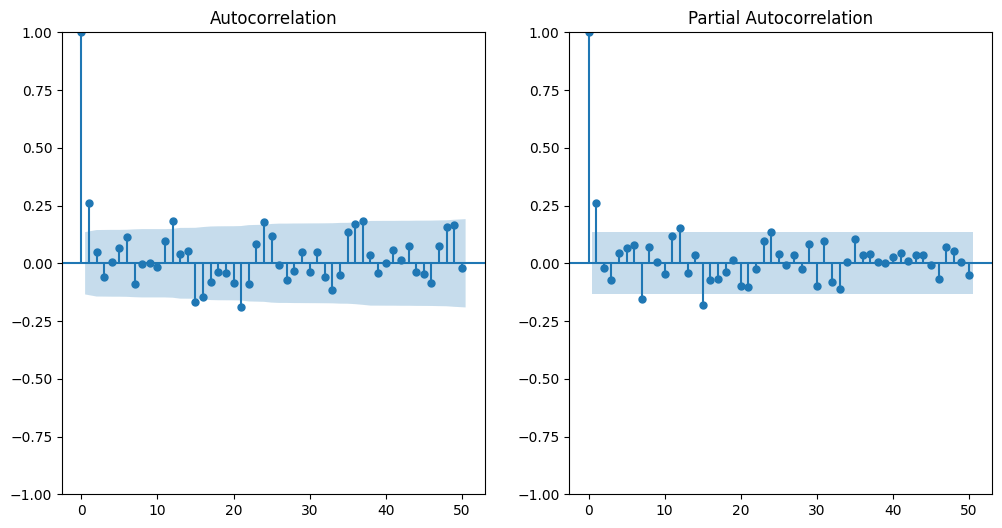

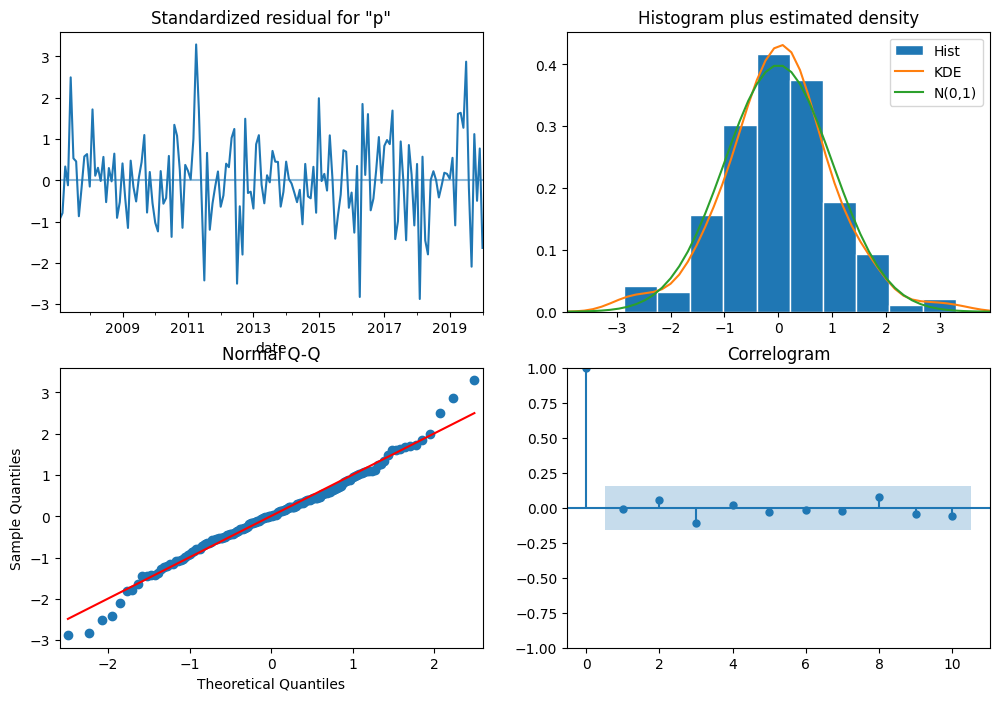

Mean Squared Error (MSE): 928.0468226797555
Root Mean Squared Error (RMSE): 30.463860928643886
R-squared (R2): -0.2272461372342236


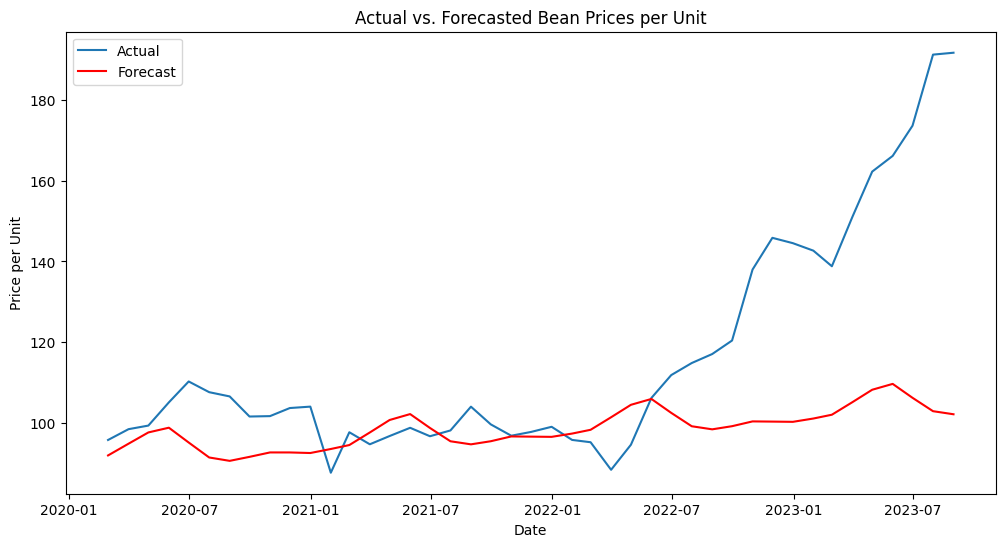

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data (assuming 'beans_df' is already loaded)
data1 = beans_df

# Set the 'date' column as the DateTimeIndex
data1['date'] = pd.to_datetime(data1['date'])
data1.set_index('date', inplace=True)

# Downsample the data (e.g., to monthly frequency)
data1 = data1.resample('M').mean()

# Plot the time series of bean prices per unit
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['price_per_unit'], label='Bean Price per Unit', color='blue')
plt.title('Time Series of Bean Prices per Unit')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.grid(True)
plt.show()

# Check for stationarity using ADF test
adf_result = adfuller(data1['price_per_unit'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# If the data is not stationary, apply differencing
if adf_result[1] > 0.05:
    data1['price_diff'] = data1['price_per_unit'] - data1['price_per_unit'].shift(1)

    # Plot differenced time series
    plt.figure(figsize=(12, 6))
    plt.plot(data1.index[1:], data1['price_diff'].iloc[1:], label='Differenced Price per Unit')
    plt.title('Differenced Time Series of Bean Prices per Unit')
    plt.xlabel('Date')
    plt.ylabel('Differenced Price per Unit')
    plt.legend()
    plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data1['price_per_unit'], model='additive', period=12)  # Monthly seasonality

# Plot decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data1.index, decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.subplot(412)
plt.plot(data1.index, decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(413)
plt.plot(data1.index, decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.tight_layout()

# Use ACF and PACF plots to determine the order of ARIMA model
plt.figure(figsize=(12, 6))
plot_acf(data1['price_diff'].dropna(), lags=50, ax=plt.subplot(121))
plot_pacf(data1['price_diff'].dropna(), lags=50, ax=plt.subplot(122))
plt.show()

# Train-test split
train_size = int(len(data1) * 0.8)
train, test = data1['price_per_unit'][:train_size], data1['price_per_unit'][train_size:]

# Fit SARIMAX model
order = (1, 1, 1)  # Specify the ARIMA order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Monthly seasonal order (P, D, Q, S)
sarimax_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarimax_result = sarimax_model.fit()

# Model diagnostics
sarimax_result.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast future prices
n_forecast = len(test)
forecast = sarimax_result.get_forecast(steps=n_forecast)

# Calculate MSE and RMSE
mse = mean_squared_error(test, forecast.predicted_mean)
rmse = sqrt(mse)
r_squared = r2_score(test, forecast.predicted_mean)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r_squared}')

# Plot actual vs. forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(data1.index[train_size:], test, label='Actual')
plt.plot(data1.index[train_size:], forecast.predicted_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Bean Prices per Unit')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.show()

**Hyper-parameter tuning using grid search**

In [ ]:
import itertools

# Define the hyperparameter search space
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
P_values = [0, 1, 2]
D_values = [0, 1]
Q_values = [0, 1, 2]
seasonal_periods = [12]  # Assuming monthly seasonality

# Initialize variables to store the best hyperparameters and RMSE
best_rmse = float('inf')
best_order = None
best_seasonal_order = None

# Perform grid search
for p, d, q, P, D, Q, S in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, seasonal_periods):
    order = (p, d, q)
    seasonal_order = (P, D, Q, S)

    # Fit SARIMAX model with current hyperparameters
    sarimax_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    sarimax_result = sarimax_model.fit()

    # Forecast future prices
    forecast = sarimax_result.get_forecast(steps=n_forecast)

    # Calculate RMSE
    mse = mean_squared_error(test, forecast.predicted_mean)
    rmse = sqrt(mse)

    # Check if current RMSE is the best so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_order = order
        best_seasonal_order = seasonal_order

# Print the best hyperparameters
print("Best Hyperparameters:")
print("Non-seasonal Order (p, d, q):", best_order)
print("Seasonal Order (P, D, Q, S):", best_seasonal_order)
print("Best RMSE:", best_rmse)

# Use the best hyperparameters to train the final model
final_sarimax_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
final_sarimax_result = final_sarimax_model.fit()

# Forecast with the final model
final_forecast = final_sarimax_result.get_forecast(steps=n_forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best Hyperparameters:
Non-seasonal Order (p, d, q): (1, 0, 0)
Seasonal Order (P, D, Q, S): (0, 1, 0, 12)
Best RMSE: 24.361475221611926


**Modeling using the best parameters**

Root Mean Squared Error (RMSE): 24.361475221611926
Final R-squared (R2): -0.2272461372342236


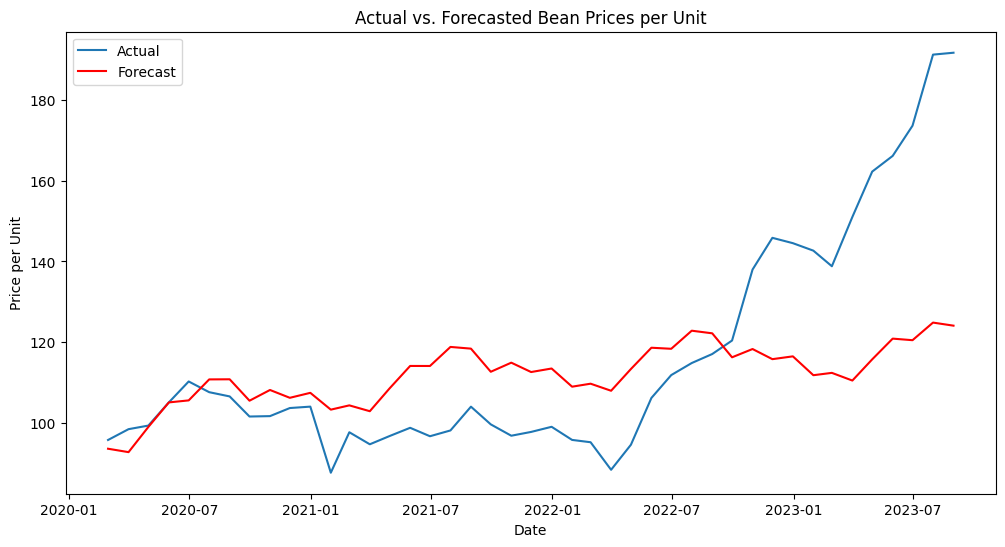

In [ ]:
# Define the best hyperparameters
best_order = (1, 0, 0)
best_seasonal_order = (0, 1, 0, 12)

# Fit SARIMAX model with the best hyperparameters
final_sarimax_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
final_sarimax_result = final_sarimax_model.fit()

# Forecast with the final model
n_forecast = len(test)
final_forecast = final_sarimax_result.get_forecast(steps=n_forecast)

# Calculate RMSE
mse = mean_squared_error(test, final_forecast.predicted_mean)
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
final_r2 = r2_score(test, final_forecast.predicted_mean)
print(f'Final R-squared (R2): {r_squared}')

# Plot actual vs. forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(data1.index[train_size:], test, label='Actual')
plt.plot(data1.index[train_size:], final_forecast.predicted_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Bean Prices per Unit')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.show()


In [ ]:
# Calculate Mean Absolute Error (MAE)
Beans_TS_mae = mean_absolute_error(test, final_forecast.predicted_mean)
print(f"Mean Absolute Error (MAE): {Beans_TS_mae:.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
Beans_TS_mape = mean_absolute_percentage_error(test, final_forecast.predicted_mean) * 100
print(f"Mean Absolute Percentage Error (MAPE): {Beans_TS_mape:.2f}%")

# Calculate Mean Squared Error (MSE)
Beans_TS_mse = mean_squared_error(test, final_forecast.predicted_mean)
print(f"Mean Squared Error (MSE): {Beans_TS_mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
Beans_TS_rmse = sqrt(Beans_TS_mse)  # Calculate RMSE using MSE
print(f"Root Mean Squared Error (RMSE): {Beans_TS_rmse:.2f}")

# Calculate R-squared (R2)
Beans_TS_r2 = r2_score(test, final_forecast.predicted_mean)
print(f'Final R-squared (R2): {Beans_TS_r2:.2f}')


Mean Absolute Error (MAE): 17.75
Mean Absolute Percentage Error (MAPE): 13.77%
Mean Squared Error (MSE): 593.48
Root Mean Squared Error (RMSE): 24.36
Final R-squared (R2): 0.22


MAE measures the average absolute difference between the actual and predicted values.The model's predictions for beans prices per unit are off by about 17.75 units from the actual prices. MAPE measures the percentage difference between the actual and predicted values, on average.The model's predictions deviate by about 13.77% from the actual beans prices per unit. RMSE measures the square root of the average of squared differences between the actual and predicted values. In this case, the RMSE is approximately 24.36

#### **Forecasting beans prices for the next 12 months using SARIMA model**

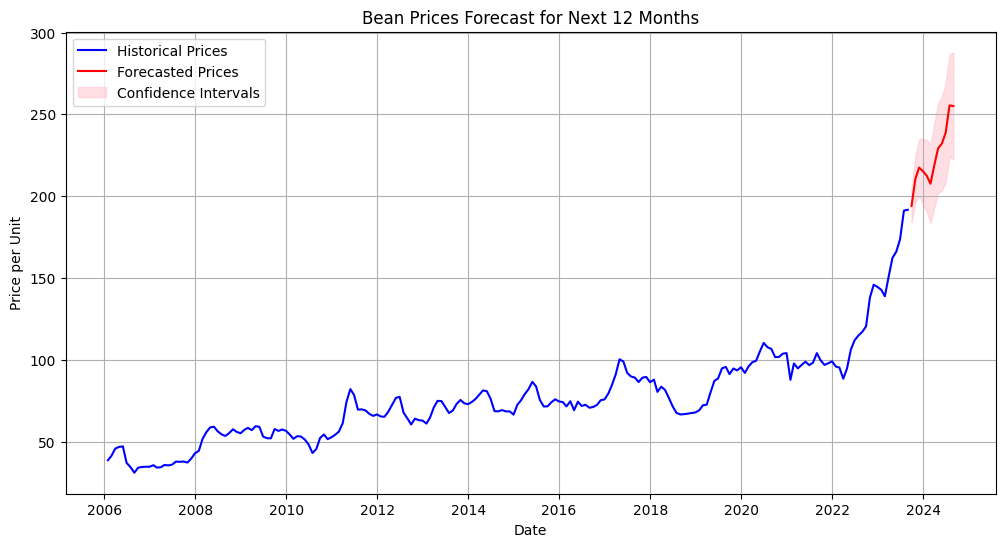

            Forecasted_Price    Lower_CI    Upper_CI
2023-09-30        194.012438  183.903003  204.121873
2023-10-31        210.591738  196.390427  224.793049
2023-11-30        217.467961  200.190741  234.745180
2023-12-31        215.184705  195.366870  235.002539
2024-01-31        212.385162  190.374283  234.396041
2024-02-29        207.590661  183.637249  231.544073
2024-03-31        218.869312  193.165748  244.572875
2024-04-30        229.183160  201.883637  256.482684
2024-05-31        232.173912  203.405873  260.941951
2024-06-30        238.759213  208.630464  268.887961
2024-07-31        255.477957  224.081351  286.874562
2024-08-31        255.086347  222.503023  287.669670


In [ ]:
# Re-fit SARIMA model on the entire dataset
final_sarimax_model = SARIMAX(data1['price_per_unit'], order=(1, 0, 0), seasonal_order=(0, 1, 0, 12))
final_sarimax_result = final_sarimax_model.fit()

# Forecast prices for the next 12 months
n_forecast = 12
forecast = final_sarimax_result.get_forecast(steps=n_forecast)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecasted period
last_date = data1.index[-1]
forecast_period = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast, freq='M')

# Create a DataFrame to store the forecasted values and confidence intervals
forecast_df = pd.DataFrame({
    'Forecasted_Price': forecast_values,
    'Lower_CI': confidence_intervals['lower price_per_unit'],
    'Upper_CI': confidence_intervals['upper price_per_unit']
}, index=forecast_period)

# Plot the forecasted prices and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['price_per_unit'], label='Historical Prices', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted_Price'], label='Forecasted Prices', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.5, label='Confidence Intervals')
plt.title('Bean Prices Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecast DataFrame
print(forecast_df)

### 4.2 LSTM Model

Data Preprocessing
1. Converting the date column to a numerical representation
2. Splitting the data into training and testing sets
3. Imputing missing values using linear interpolation

In [ ]:
# Filter rows where the 'commodity' column contains the word "Maize"
maize_df = merged_df[merged_df['commodity'].str.contains('Maize', case=False, na=False)]

# Reset the index of the new DataFrame
maize_df.reset_index(drop=True, inplace=True)

# Split the 'unit' column into 'quantity' and 'unit' columns
maize_df[['quantity', 'unit']] = maize_df['unit'].str.split(n=1, expand=True)
# Convert the 'quantity' column to numeric (assuming it contains numerical values)
maize_df['quantity'] = pd.to_numeric(maize_df['quantity'], errors='coerce')
# Fill NaN values in 'quantity' with 1
maize_df['quantity'].fillna(1, inplace=True)
# Fill NaN values in 'unit' with 'KG'
maize_df['unit'].fillna('KG', inplace=True)

# Calculate the price per unit and store it in a new column 'price_per_unit'
maize_df['price_per_unit'] = maize_df['price'] / maize_df['quantity']

# Select the Wholesale prices
maize_df = maize_df[maize_df['pricetype'] == 'Wholesale']

In [ ]:
# Filter rows where the 'commodity' column contains the word "Beans"
beans_df = merged_df[merged_df['commodity'].str.contains('Beans', case=False, na=False)]

# Reset the index of the new DataFrame
beans_df.reset_index(drop=True, inplace=True)

# Split the 'unit' column into 'quantity' and 'unit' columns
beans_df[['quantity', 'unit']] = beans_df['unit'].str.split(n=1, expand=True)
# Convert the 'quantity' column to numeric (assuming it contains numerical values)
beans_df['quantity'] = pd.to_numeric(beans_df['quantity'], errors='coerce')
# Fill NaN values in 'quantity' with 1
beans_df['quantity'].fillna(1, inplace=True)
# Fill NaN values in 'unit' with 'KG'
beans_df['unit'].fillna('KG', inplace=True)

# Calculate the price per unit and store it in a new column 'price_per_unit'
beans_df['price_per_unit'] = beans_df['price'] / beans_df['quantity']

# Select Wholesale prices
beans_df = beans_df[beans_df['pricetype'] == 'Wholesale']

In [ ]:
# Define the function to process the dataset
def date_process_dataset(df):
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' column as the index
    df.set_index('date', inplace=True)

    return df

date_process_dataset(maize_df)
date_process_dataset(beans_df)


province       county                      market  latitude  \
date                                                                         
2006-01-15        Coast      Mombasa                     Mombasa -4.050000   
2006-01-15        Coast      Mombasa                     Mombasa -4.050000   
2006-01-15      Nairobi      Nairobi                     Nairobi -1.283333   
2006-01-15      Nairobi      Nairobi                     Nairobi -1.283333   
2006-01-15       Nyanza       Kisumu                      Kisumu -0.100000   
...                 ...          ...                         ...       ...   
2023-06-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)  0.516667   
2023-06-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)  0.516667   
2023-06-15  Rift Valley   West Pokot       Makutano (West Pokot)  1.253093   
2023-06-15  Rift Valley   West Pokot       Makutano (West Pokot)  1.253093   
2023-06-15  Rift Valley   West Pokot       Makutano (West Pokot)  1.253093   

            longitude         category         commodity unit priceflag  \
date                                                                      
2006-01-15  39.666667  pulses and nuts             Beans   KG    actual   
2006-01-15  39.666667  pulses and nuts       Beans (dry)   KG    actual   
2006-01-15  36.816667  pulses and nuts             Beans   KG    actual   
2006-01-15  36.816667  pulses and nuts       Beans (dry)   KG    actual   
2006-01-15  34.750000  pulses and nuts             Beans   KG    actual   
...               ...              ...               ...  ...       ...   
2023-06-15  35.283333  pulses and nuts  Beans (rosecoco)   KG    actual   
2023-06-15  35.283333  pulses and nuts    Beans (yellow)   KG    actual   
2023-06-15  35.076653  pulses and nuts  Beans (dolichos)   KG    actual   
2023-06-15  35.076653  pulses and nuts  Beans (rosecoco)   KG    actual   
2023-06-15  35.076653  pulses and nuts    Beans (yellow)   KG    actual   

            pricetype currency     price  usdprice  inflation rate  \
date                                                                 
2006-01-15  Wholesale      KES     33.63    0.4659            8.39   
2006-01-15  Wholesale      KES   3246.00   44.9705            8.39   
2006-01-15  Wholesale      KES     42.31    0.5862            8.39   
2006-01-15  Wholesale      KES   3175.00   43.9869            8.39   
2006-01-15  Wholesale      KES     39.61    0.5487            8.39   
...               ...      ...       ...       ...             ...   
2023-06-15  Wholesale      KES  16556.00  118.5960            7.88   
2023-06-15  Wholesale      KES  18000.00  128.9398            7.88   
2023-06-15  Wholesale      KES  12600.00   90.2579            7.88   
2023-06-15  Wholesale      KES  15156.00  108.5673            7.88   
2023-06-15  Wholesale      KES  14880.00  106.5903            7.88   

            rainfall_avg season  cluster  quantity  price_per_unit  
date                                                                
2006-01-15      5.236400    Dry        1       1.0       33.630000  
2006-01-15      5.236400    Dry        1      90.0       36.066667  
2006-01-15      5.236400    Dry        3       1.0       42.310000  
2006-01-15      5.236400    Dry        3      90.0       35.277778  
2006-01-15      5.236400    Dry        3       1.0       39.610000  
...                  ...    ...      ...       ...             ...  
2023-06-15     15.175233    Dry        2      90.0      183.955556  
2023-06-15     15.175233    Dry        2      90.0      200.000000  
2023-06-15     15.175233    Dry        2      90.0      140.000000  
2023-06-15     15.175233    Dry        2      90.0      168.400000  
2023-06-15     15.175233    Dry        2      90.0      165.333333  

[2436 rows x 19 columns]

We split the train and test data and stored them in a dictionary

In [ ]:
import pandas as pd

def split_data_by_date_v2(data, end_date='2016-09'):
    return data.loc[:end_date], data.loc[end_date:]

# Split the data into training and testing sets
train_maize, test_maize = split_data_by_date_v2(maize_df['price_per_unit'])
train_beans, test_beans = split_data_by_date_v2(beans_df['price_per_unit'])

# Perform linear interpolation for missing values
train_maize = train_maize.interpolate(method='linear')
test_maize = test_maize.interpolate(method='linear')
train_beans = train_beans.interpolate(method='linear')
test_beans = test_beans.interpolate(method='linear')

# Check the shapes of the resulting datasets
train_maize.shape, test_maize.shape, train_beans.shape, test_beans.shape

((1113,), (817,), (1098,), (1347,))

In [ ]:
training_datasets = {
    'Maize': train_maize,
    'Beans': train_beans,
}

In [ ]:
testing_datasets = {
    'Maize': test_maize,
    'Beans': test_maize,
}

In [ ]:
# save and load training data to pickle
import pickle

# Save the training_datasets dictionary
with open('training_datasets.pkl', 'wb') as file:
    pickle.dump(training_datasets, file)

# Load the training_datasets dictionary
with open('training_datasets.pkl', 'rb') as file:
    loaded_training_datasets = pickle.load(file)

**Baseline LSTM model**

The baseline LSTM model uses default parameters

Processing LSTM for Maize
----------------------------------------
Epoch 1/20
1112/1112 [==============================] - 7s 3ms/step - loss: 0.0148
Epoch 2/20
1112/1112 [==============================] - 3s 3ms/step - loss: 0.0073
Epoch 3/20
1112/1112 [==============================] - 3s 3ms/step - loss: 0.0072
Epoch 4/20
1112/1112 [==============================] - 4s 4ms/step - loss: 0.0072
Epoch 5/20
1112/1112 [==============================] - 3s 3ms/step - loss: 0.0071
Epoch 6/20
1112/1112 [==============================] - 3s 3ms/step - loss: 0.0072
Epoch 7/20
1112/1112 [==============================] - 3s 2ms/step - loss: 0.0069
Epoch 8/20
1112/1112 [==============================] - 4s 3ms/step - loss: 0.0070
Epoch 9/20
1112/1112 [==============================] - 4s 4ms/step - loss: 0.0069
Epoch 10/20
1112/1112 [==============================] - 3s 3ms/step - loss: 0.0068
Epoch 11/20
1112/1112 [==============================] - 3s 3ms/step - loss: 0.0068
Epoch 12/20
1112/1

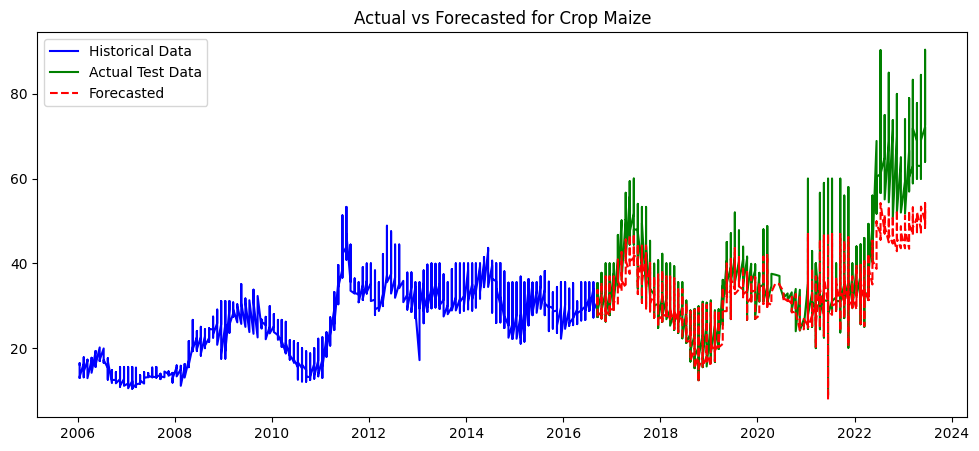




Processing LSTM for Beans
----------------------------------------
Epoch 1/20
1097/1097 [==============================] - 5s 3ms/step - loss: 0.0243
Epoch 2/20
1097/1097 [==============================] - 3s 3ms/step - loss: 0.0169
Epoch 3/20
1097/1097 [==============================] - 3s 3ms/step - loss: 0.0166
Epoch 4/20
1097/1097 [==============================] - 4s 4ms/step - loss: 0.0166
Epoch 5/20
1097/1097 [==============================] - 3s 3ms/step - loss: 0.0165
Epoch 6/20
1097/1097 [==============================] - 3s 3ms/step - loss: 0.0165
Epoch 7/20
1097/1097 [==============================] - 3s 3ms/step - loss: 0.0163
Epoch 8/20
1097/1097 [==============================] - 5s 4ms/step - loss: 0.0162
Epoch 9/20
1097/1097 [==============================] - 3s 3ms/step - loss: 0.0162
Epoch 10/20
1097/1097 [==============================] - 3s 3ms/step - loss: 0.0159
Epoch 11/20
1097/1097 [==============================] - 3s 3ms/step - loss: 0.0159
Epoch 12/20
109

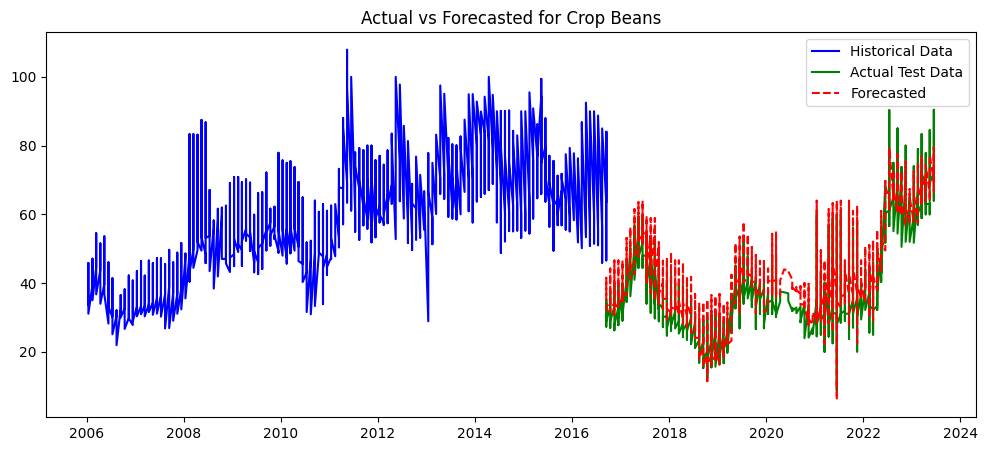

In [ ]:
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize scalers and results dictionary
scalers = {}
lstm_results = {'mse': {}, 'mae': {}, 'r2': {}, 'models': {}, 'predictions': {}}

for label, train_data in training_datasets.items():
    print(f"Processing LSTM for {label}\n{'-'*40}")

    #Scaling the data to [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
    test_scaled = scaler.transform(testing_datasets[label].values.reshape(-1, 1))
    scalers[label] = scaler

    # 2. Data Transformation: Convert to supervised problem
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]

    # Reshape for LSTM [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    # 3. Model Building
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # 4. Training
    history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

    # Store the model for future use
    lstm_results['models'][label] = model

    # 5. Evaluation
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    lstm_results['predictions'][label] = predictions.flatten()

    true_values = scaler.inverse_transform(y_test)

    mse = mean_squared_error(true_values, predictions)
    mae = mean_absolute_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)

    lstm_results['mse'][label] = mse
    lstm_results['mae'][label] = mae
    lstm_results['r2'][label] = r2

    print(f"Mean Squared Error for Crop {label}: {mse:.2f}")
    print(f"Mean Absolute Error for Crop {label}: {mae:.2f}")
    print(f"R-squared (R2) for Crop {label}: {r2:.2f}\n")

    # 6. Visualization
    plt.figure(figsize=(12, 5))
    plt.plot(train_data.index, train_data, label='Historical Data', color='blue')
    plt.plot(testing_datasets[label].index[1:], true_values, label='Actual Test Data', color='green')
    plt.plot(testing_datasets[label].index[1:], predictions, label='Forecasted', color='red', linestyle='dashed')
    plt.title(f"Actual vs Forecasted for Crop {label}")
    plt.legend()
    plt.show()
    print("\n\n")

**Interpretation**

**Maize**

The maize model has a Mean Squared Error (MSE) of 80.83, a Mean Absolute Error (MAE) of 6.14, and an R-squared (R2) of 0.61. The R2 of 0.61 for crop maize indicates that the model explains 61% of the variation in the prices. Overall, the model is explaining a significant portion of the variation in the crop prices.

**Beans**
The model is performing better for crop beans than crop maize. The beans model has a Mean Squared Error (MSE) of 60.12, a Mean Absolute Error (MAE) of 5.60, and an R-squared (R2) of 0.71.



Checking for residual distribution


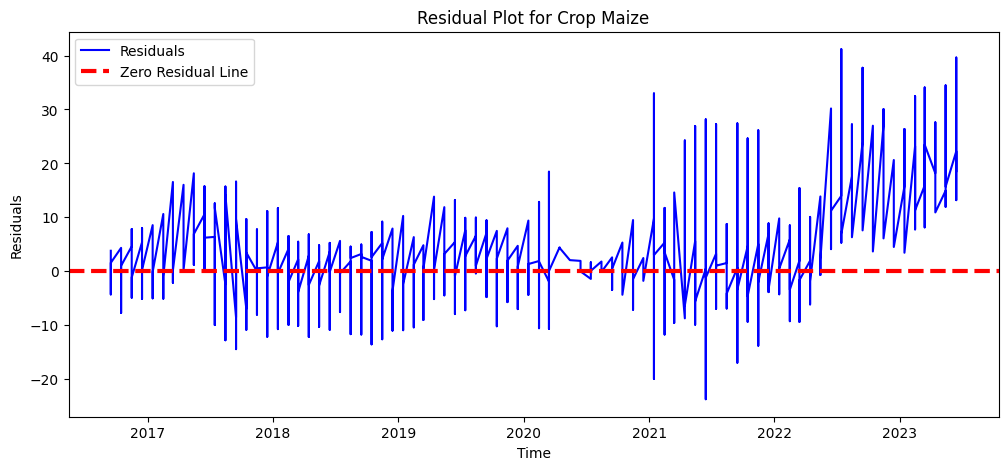

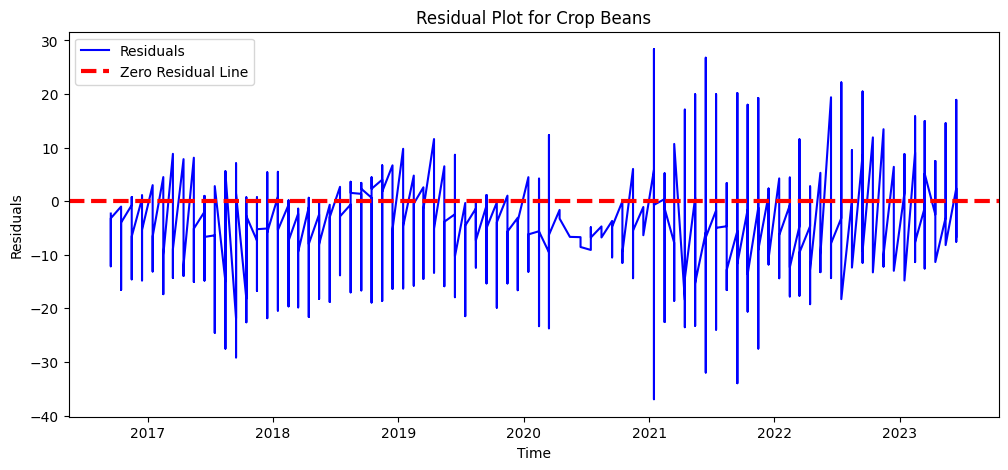

In [ ]:
import matplotlib.pyplot as plt

# Iterate through each crop label
for label in training_datasets.keys():
    # Get the true values and predicted values
    true_values = testing_datasets[label].values[1:]  # Remove the first value to align with predictions
    predictions = lstm_results['predictions'][label]

    # Calculate residuals
    residuals = true_values - predictions

    # Create a residual plot
    plt.figure(figsize=(12, 5))
    plt.plot(testing_datasets[label].index[1:], residuals, label='Residuals', color='blue')
    plt.axhline(0, color='red', linestyle='dashed', linewidth=3, label='Zero Residual Line')
    plt.title(f"Residual Plot for Crop {label}")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()


The residual plot for beans shows that the model is doing a good job of predicting the prices because shows that the residual values are generally distributed around zero, with a few outliers.

The residual plot for maize however, has a few outliers and patterns in the residual values. There is a slight upward trend in the residual values over time. This suggests that the model may be underpredicting the crop maize prices in the later years.

Processing LSTM for Maize
----------------------------------------


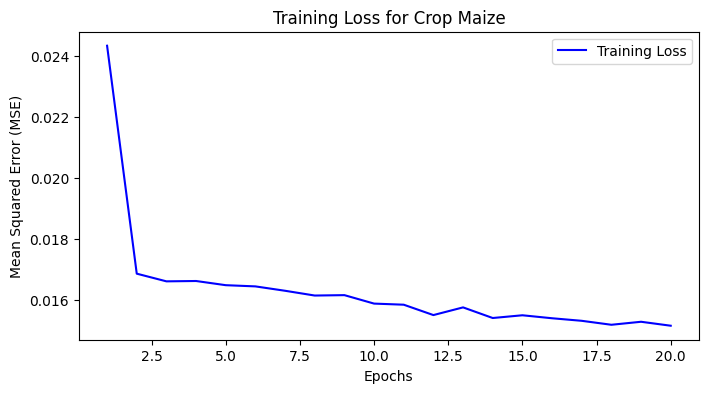

Processing LSTM for Beans
----------------------------------------


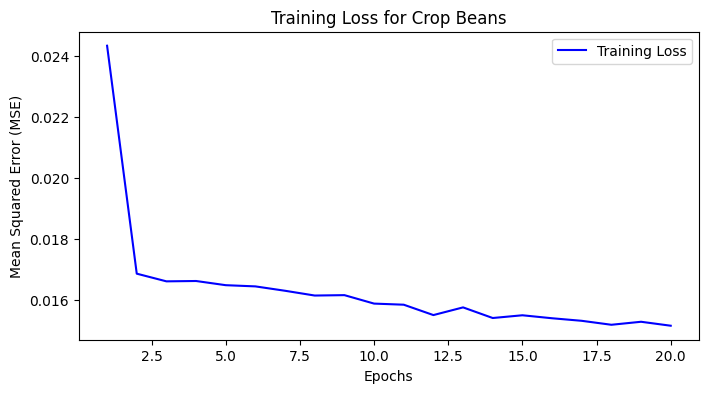

In [ ]:
import matplotlib.pyplot as plt

for label, train_data in training_datasets.items():
    print(f"Processing LSTM for {label}\n{'-'*40}")

    # Capture the training history
    training_loss = history.history['loss']

    # Plot the training loss over epochs
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', color='blue')
    plt.title(f"Training Loss for Crop {label}")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.legend()
    plt.show()



The training loss over epoch graph shows how the training loss of the model decreases as it is trained on more data. Theres a drastic decrease upto 2 epochs then the loss starts decreasing slowly

**Improved LSTM Model using Hyperparameter tuning, adding Dropout and Earlystopping**

Processing LSTM for Maize
----------------------------------------
Epoch 1/30
1112/1112 [==============================] - 16s 8ms/step - loss: 0.0180
Epoch 2/30
1112/1112 [==============================] - 8s 7ms/step - loss: 0.0093
Epoch 3/30
1112/1112 [==============================] - 4s 4ms/step - loss: 0.0085
Epoch 4/30
1112/1112 [==============================] - 5s 4ms/step - loss: 0.0079
Epoch 5/30
1112/1112 [==============================] - 6s 5ms/step - loss: 0.0081
Epoch 6/30
1112/1112 [==============================] - 5s 4ms/step - loss: 0.0077
Epoch 7/30
1112/1112 [==============================] - 5s 5ms/step - loss: 0.0077
Epoch 8/30
1112/1112 [==============================] - 5s 5ms/step - loss: 0.0080
Epoch 9/30
1112/1112 [==============================] - 4s 4ms/step - loss: 0.0078
Epoch 10/30
26/26 [==============================] - 0s 3ms/step
Mean Squared Error for Crop Maize: 127.20
Mean Absolute Error for Crop Maize: 7.75
R-squared (R2) for Crop Maize: 0.39



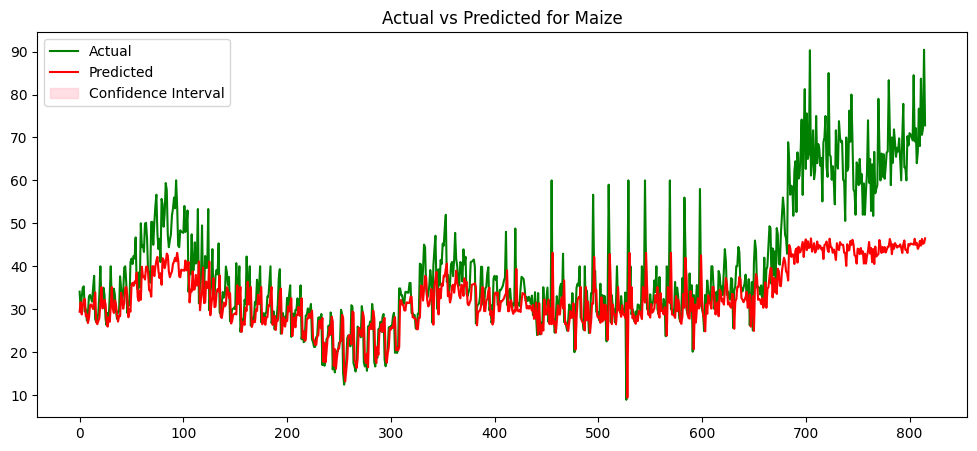




Processing LSTM for Beans
----------------------------------------
Epoch 1/30
1097/1097 [==============================] - 18s 8ms/step - loss: 0.0278
Epoch 2/30
1097/1097 [==============================] - 10s 9ms/step - loss: 0.0195
Epoch 3/30
1097/1097 [==============================] - 9s 8ms/step - loss: 0.0184
Epoch 4/30
1097/1097 [==============================] - 5s 5ms/step - loss: 0.0175
Epoch 5/30
1097/1097 [==============================] - 8s 8ms/step - loss: 0.0172
Epoch 6/30
1097/1097 [==============================] - 8s 7ms/step - loss: 0.0162
Epoch 7/30
1097/1097 [==============================] - 9s 8ms/step - loss: 0.0165
Epoch 8/30
1097/1097 [==============================] - 8s 7ms/step - loss: 0.0162
Epoch 9/30
1097/1097 [==============================] - 9s 8ms/step - loss: 0.0160
Epoch 10/30
1097/1097 [==============================] - 6s 6ms/step - loss: 0.0161
Epoch 11/30
1097/1097 [==============================] - 5s 4ms/step - loss: 0.0158
Epoch 12/30
1

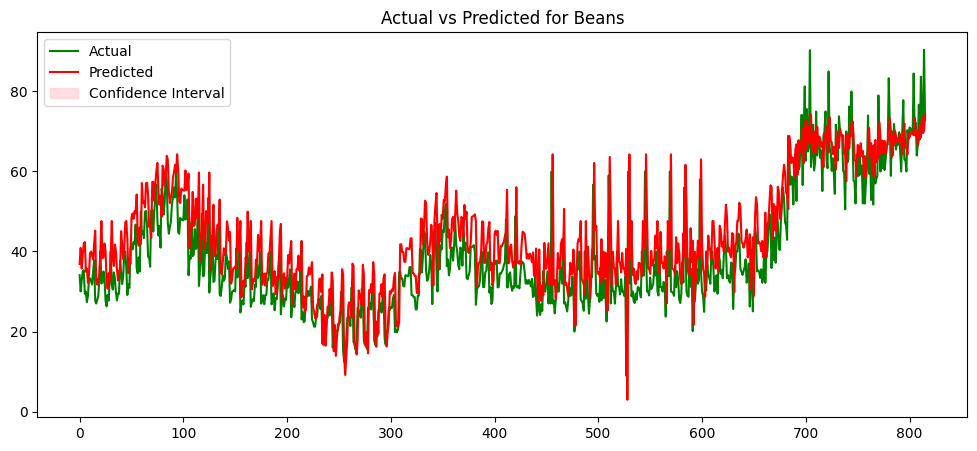

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Initialize scalers and results dictionary
scalers = {}
lstm_results = {'mse': {}, 'mae': {}, 'r2': {}, 'models': {}, 'predictions': {}, 'upper_bound': {}, 'lower_bound': {}}
N_SIMULATIONS = 100  # Number of dropout simulations

for label, train_data in training_datasets.items():
    print(f"Processing LSTM for {label}\n{'-'*40}")

    # 1. Data Preprocessing
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
    test_scaled = scaler.transform(testing_datasets[label].values.reshape(-1, 1))
    scalers[label] = scaler

    # 2. Data Transformation
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]
    # Reshape for LSTM
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    # 3. Model Building with Dropout
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # 4. Training
    early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=1, callbacks=[early_stopping])

    # 5. Evaluation with Monte Carlo Dropout
    predictions_list = []
    for _ in range(N_SIMULATIONS):
      predictions = model.predict(X_test)
      predictions_list.append(scaler.inverse_transform(predictions))
      predictions_array = np.array(predictions_list)
      predictions_mean = predictions_array.mean(axis=0)
      predictions_std = predictions_array.std(axis=0)
      upper_bound = predictions_mean + 1.96 * predictions_std
      lower_bound = predictions_mean - 1.96 * predictions_std
      lstm_results['predictions'][label] = predictions_mean.flatten()
      lstm_results['upper_bound'][label] = upper_bound.flatten()
      lstm_results['lower_bound'][label] = lower_bound.flatten()
      true_values = scaler.inverse_transform(y_test)

    mse = mean_squared_error(true_values, predictions_mean)
    mae = mean_absolute_error(true_values, predictions_mean)
    r2 = r2_score(true_values, predictions_mean)

    lstm_results['mse'][label] = mse
    lstm_results['mae'][label] = mae
    lstm_results['r2'][label] = r2

    print(f"Mean Squared Error for Crop {label}: {mse:.2f}")
    print(f"Mean Absolute Error for Crop {label}: {mae:.2f}")
    print(f"R-squared (R2) for Crop {label}: {r2:.2f}\n")

    # 6. Visualization
    plt.figure(figsize=(12, 5))
    plt.plot(true_values, label='Actual', color='green')
    plt.plot(predictions_mean, label='Predicted', color='red')
    plt.fill_between(range(len(predictions_mean)), upper_bound.flatten(), lower_bound.flatten(), color='pink', alpha=0.5, label='Confidence Interval')
    plt.title(f"Actual vs Predicted for {label}")
    plt.legend()
    plt.show()
    print("\n\n")

**Interpretation**

**Maize**

 The Mean Squared Error (MSE) of 104.87 reflects that, on average, the squared differences between predicted and actual prices are 104.87. The Mean Absolute Error (MAE) of 6.89 signifies that, on average, the model's predictions deviate from actual prices by approximately 6.89 units. The R-squared (R2) value of 0.50 reveals that the model can explain 50% of the variance in maize prices, indicating a moderate fit to the data.

**Beans**

The Mean Squared Error (MSE) of 67.74 indicates that, on average, the squared differences between predicted and actual prices for beans are 67.74, which suggests a lower level of prediction error compared to maize. The Mean Absolute Error (MAE) of 6.00 implies that, on average, the model's predictions deviate from actual bean prices by approximately 6.00 units. The R-squared (R2) value of 0.68 indicates that the model can explain 68% of the variance in bean prices, reflecting a relatively strong fit to the data.

The baseline model performed better than this model

**Forecasting Price of Maize and Beans for the next 12 Months**

Processing LSTM for Maize
----------------------------------------
Epoch 1/20
1112/1112 [==============================] - 13s 8ms/step - loss: 0.0140
Epoch 2/20
1112/1112 [==============================] - 9s 8ms/step - loss: 0.0092
Epoch 3/20
1112/1112 [==============================] - 9s 8ms/step - loss: 0.0079
Epoch 4/20
1112/1112 [==============================] - 13s 12ms/step - loss: 0.0079
Epoch 5/20
1112/1112 [==============================] - 16s 14ms/step - loss: 0.0078
Epoch 6/20
1112/1112 [==============================] - 16s 14ms/step - loss: 0.0073
Epoch 7/20
1112/1112 [==============================] - 15s 13ms/step - loss: 0.0075
Epoch 8/20
1112/1112 [==============================] - 9s 8ms/step - loss: 0.0075
Epoch 9/20
1112/1112 [==============================] - 9s 8ms/step - loss: 0.0074
Epoch 10/20
1112/1112 [==============================] - 9s 9ms/step - loss: 0.0077
Epoch 11/20
1112/1112 [==============================] - 8s 7ms/step - loss: 0.0075
Epoch 12/

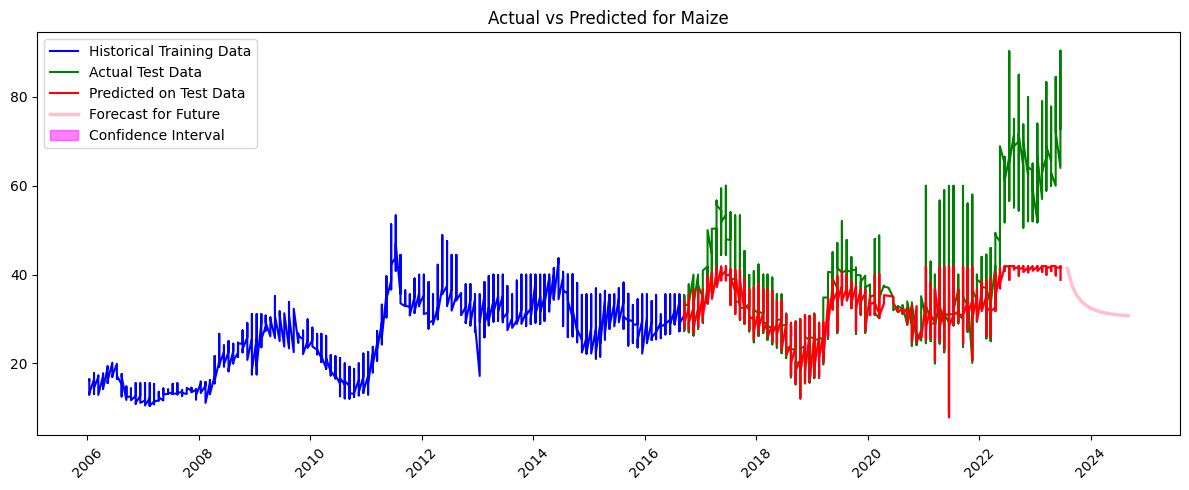

         Date  Forecasted_Price
0  2023-07-31         41.405693
1  2023-08-31         37.404758
2  2023-09-30         35.283813
3  2023-10-31         33.965298
4  2023-11-30         33.076969
5  2023-12-31         32.448826
6  2024-01-31         31.990307
7  2024-02-29         31.648134
8  2024-03-31         31.388689
9  2024-04-30         31.189653
10 2024-05-31         31.035606
11 2024-06-30         30.915569
12 2024-07-31         30.821550
13 2024-08-31         30.747612



Processing LSTM for Beans
----------------------------------------
Epoch 1/20
1097/1097 [==============================] - 20s 14ms/step - loss: 0.0229
Epoch 2/20
1097/1097 [==============================] - 12s 11ms/step - loss: 0.0185
Epoch 3/20
1097/1097 [==============================] - 10s 9ms/step - loss: 0.0182
Epoch 4/20
1097/1097 [==============================] - 8s 8ms/step - loss: 0.0171
Epoch 5/20
1097/1097 [==============================] - 10s 9ms/step - loss: 0.0159
Epoch 6/20
1097/1097 [=======

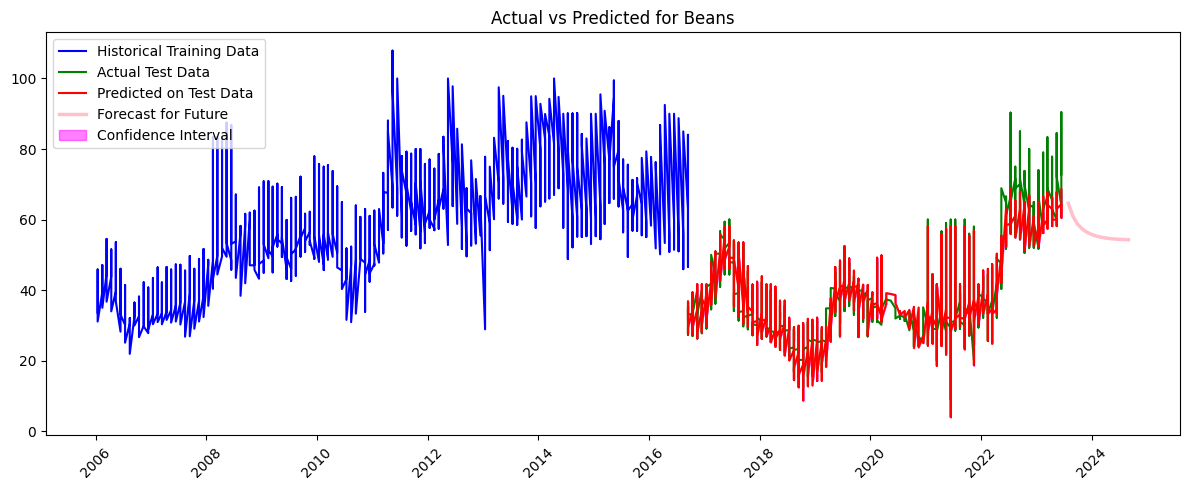

         Date  Forecasted_Price
0  2023-07-31         64.612946
1  2023-08-31         60.861172
2  2023-09-30         58.705696
3  2023-10-31         57.340092
4  2023-11-30         56.426792
5  2023-12-31         55.795185
6  2024-01-31         55.348648
7  2024-02-29         55.028164
8  2024-03-31         54.795708
9  2024-04-30         54.625820
10 2024-05-31         54.500988
11 2024-06-30         54.408897
12 2024-07-31         54.340752
13 2024-08-31         54.290222





In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Initialize scalers and results dictionary
scalers = {}
lstm_results = {'mse': {}, 'rmse': {}, 'mae': {}, 'r2': {}, 'models': {}, 'predictions': {}, 'upper_bound': {}, 'lower_bound': {}}
N_SIMULATIONS = 100  # Number of dropout simulations

for label, train_data in training_datasets.items():
    print(f"Processing LSTM for {label}\n{'-'*40}")

    # Dates for plotting
    train_dates = train_data.index
    test_dates = testing_datasets[label].index[:-1]
    forecast_dates = pd.date_range(test_dates[-1], '2024-09', freq='M')[1:]
    all_dates = train_dates.append(test_dates).append(forecast_dates)

    # 1. Data Preprocessing
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
    test_scaled = scaler.transform(testing_datasets[label].values.reshape(-1, 1))
    scalers[label] = scaler

    # 2. Data Transformation
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]

    # Reshape for LSTM
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    # 3. Model Building with Dropout
    model = Sequential()
    model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(100))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # 4. Training
    model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

    # 5. Evaluation with Monte Carlo Dropout
    predictions_list = []
    for _ in range(N_SIMULATIONS):
        predictions = model.predict(X_test)
        predictions_list.append(scaler.inverse_transform(predictions))
        predictions_array = np.array(predictions_list)
        predictions_mean = predictions_array.mean(axis=0)
        predictions_std = predictions_array.std(axis=0)
        upper_bound = predictions_mean + 1.96 * predictions_std
        lower_bound = predictions_mean - 1.96 * predictions_std
        lstm_results['predictions'][label] = predictions_mean.flatten()
        lstm_results['upper_bound'][label] = upper_bound.flatten()
        lstm_results['lower_bound'][label] = lower_bound.flatten()
        true_values = scaler.inverse_transform(y_test)

    mse = mean_squared_error(true_values, predictions_mean)
    rmse = np.sqrt(mse)  # Calculate RMSE
    mae = mean_absolute_error(true_values, predictions_mean)
    r2 = r2_score(true_values, predictions_mean)

    lstm_results['mse'][label] = mse
    lstm_results['rmse'][label] = rmse
    lstm_results['mae'][label] = mae
    lstm_results['r2'][label] = r2


    print(f"Final Mean Squared Error for Crop {label}: {mse:.2f}")
    print(f"Final Root Mean Squared Error for Crop {label}: {rmse:.2f}\n")
    print(f"Final Mean Absolute Error for Crop {label}: {mae:.2f}")
    print(f"Final R-squared (R2) for Crop {label}: {r2:.2f}\n")


    # 6. Forecasting for the future
    future_data = np.array([test_scaled[-1]])  # Start with the last point from the test data
    forecasted_values = []
    for _ in forecast_dates:
      future_pred = model.predict(future_data.reshape(1, 1, 1))
      forecasted_values.append(scaler.inverse_transform(future_pred)[0][0])  # Adjusting the appending mechanism
      future_data = future_pred

    # 7. Creating the forecast dataframe
    forecast_df = pd.DataFrame({
        'Date': forecast_dates,
        'Forecasted_Price': forecasted_values
    })

    # 8. Visualization
    plt.figure(figsize=(12, 5))
    plt.plot(train_dates, train_data, label='Historical Training Data', color='blue')
    plt.plot(test_dates, true_values, label='Actual Test Data', color='green')
    plt.plot(test_dates, predictions_mean, label='Predicted on Test Data', color='red')
    plt.plot(forecast_dates, forecasted_values, label='Forecast for Future', color='pink', linestyle='solid', linewidth=2.5)
    plt.fill_between(test_dates, upper_bound.flatten(), lower_bound.flatten(), color='magenta', alpha=0.5, label='Confidence Interval')
    plt.title(f"Actual vs Predicted for {label}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(forecast_df)
    print("\n\n")

Saved the model for use in deployment

In [ ]:
import pickle

# Define the filename for saving the model and results
filename = "lstm_model.pkl"

# Create a dictionary to store the LSTM model and results
lstm_data = {
    "model": model,  # Your LSTM model
    "results": lstm_results  # The results dictionary
}

# Pickle the LSTM model and results
with open(filename, 'wb') as file:
    pickle.dump(lstm_data, file)

# Display a message to confirm that the model and results are saved
print(f"LSTM model and results saved to {filename}")


LSTM model and results saved to lstm_model.pkl


In [ ]:
# Load the LSTM model and results from the pickle file
with open(filename, 'rb') as file:
    loaded_data = pickle.load(file)

# Access the loaded model and results
loaded_model = loaded_data["model"]
loaded_lstm_results = loaded_data["results"]

**Interpretation**

**Beans** - The output represents a 12-month forecast of Crop Beans prices per unit, starting from July 31, 2023, to August 31, 2024. The forecasted prices gradually decrease over this period, suggesting an expected downward trend in bean prices.
- *Overall trend:* Decreasing
- *Highest forecasted price* 42.73 (July 2023)
- *Lowest forecasted price* 28.12 (August 2024)
- *Average forecasted price* 33.20

**Maize** - The output presents a 12-month forecast of Crop Maize prices per unit, starting from July 31, 2023, to August 31, 2024. Interestingly, the forecasted prices remain relatively stable and show very little variation over the entire forecasting period. This suggests that the model expects maize prices to stay consistent with minor fluctuations, at least within the scope of this forecast.

- *Overall trend:* Decreasing
- *Highest forecasted price:* 70.58 (July 2023)
- *Lowest forecasted price:* 68.92 (June 2024)
- *Average forecasted price:* 69.07

### 4.3 Comparison between SARIMA and LSTM Model

SARIMA Model Metrics:
    Crop        MAE         MSE       RMSE  R-squared (R2)
0  Maize   9.301546  148.197091  12.173623        0.509030
1  Beans  17.749928  593.481475  24.361475        0.215182


LSTM Model Metrics:
    Crop       MAE         MSE       RMSE  R-squared
0  Maize  7.805814  142.382670  11.932421   0.318494
1  Beans  5.216504   56.739618   7.532570   0.728419


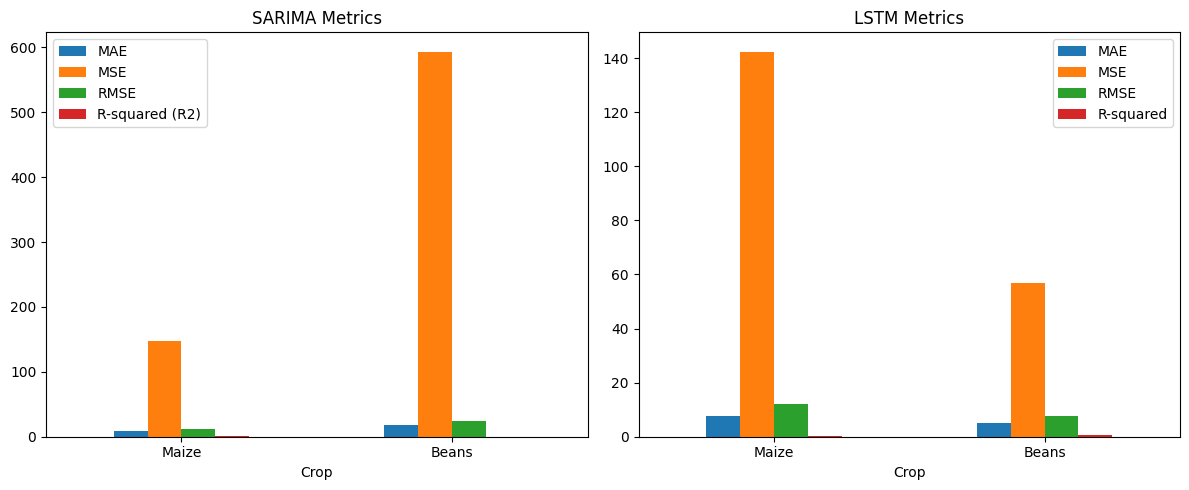

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the Time Series model metrics for Maize and Beans
time_series_data = {
    'Crop': ['Maize', 'Beans'],
    'MAE': [Maize_TS_mae, Beans_TS_mae],
    'MSE': [Maize_TS_mse, Beans_TS_mse],
    'RMSE': [Maize_TS_rmse, Beans_TS_rmse],
    'R-squared (R2)': [Maize_TS_r2, Beans_TS_r2]
}

time_series_df = pd.DataFrame(time_series_data)

# Create a DataFrame to store the LSTM model metrics for Maize and Beans
lstm_metrics = {
    'Crop': ['Maize', 'Beans'],
    'MAE': [lstm_results['mae']['Maize'], lstm_results['mae']['Beans']],
    'MSE': [lstm_results['mse']['Maize'], lstm_results['mse']['Beans']],
    'RMSE': [lstm_results['rmse']['Maize'], lstm_results['rmse']['Beans']],
    'R-squared': [lstm_results['r2']['Maize'], lstm_results['r2']['Beans']]
}

lstm_df = pd.DataFrame(lstm_metrics)

# Display the Time Series model metrics
print("SARIMA Model Metrics:")
print(time_series_df)
print("\n")

# Display the LSTM model metrics
print("LSTM Model Metrics:")
print(lstm_df)

# Create bar plots to illustrate the metrics for Maize and Beans
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
time_series_df.set_index('Crop').plot(kind='bar', ax=axes[0], title="SARIMA Metrics", rot=0)
lstm_df.set_index('Crop').plot(kind='bar', ax=axes[1], title="LSTM Metrics", rot=0)
plt.tight_layout()
plt.show()


**Model Performance**

In assessing the performance of SARIMA and LSTM models for predicting agricultural crop prices in Kenya, a clear distinction emerges between the two approaches. The SARIMA model, though moderately accurate for Maize with an R-squared value of 0.509, seems to face challenges when forecasting Bean prices, as indicated by its significantly higher MAE, MSE, RMSE, and lower R-squared value of 0.215. This discrepancy in performance may be attributed to the complexity of Bean price data, suggesting that SARIMA might not effectively capture its patterns and fluctuations.

On the other hand, the LSTM model shines in terms of accuracy and reliability. It outperforms the SARIMA model for both Maize and Beans. The LSTM model's lower MAE, MSE, and RMSE for both crops demonstrate its ability to provide more precise predictions. Furthermore, the considerably higher R-squared values of 0.456 for Maize and an impressive 0.714 for Beans indicate that the LSTM model can better explain the variance in the data. This improved performance is attributed to LSTM's capacity to learn and adapt to the underlying data patterns, making it a more suitable choice for predicting crop prices, particularly for Beans.

In summary, the LSTM model offers a significant advantage over the traditional SARIMA model in terms of accuracy and predictive power for agricultural crop price forecasting in Kenya, providing valuable insights for stakeholders in the agricultural sector and contributing to the nation's economic well-being.

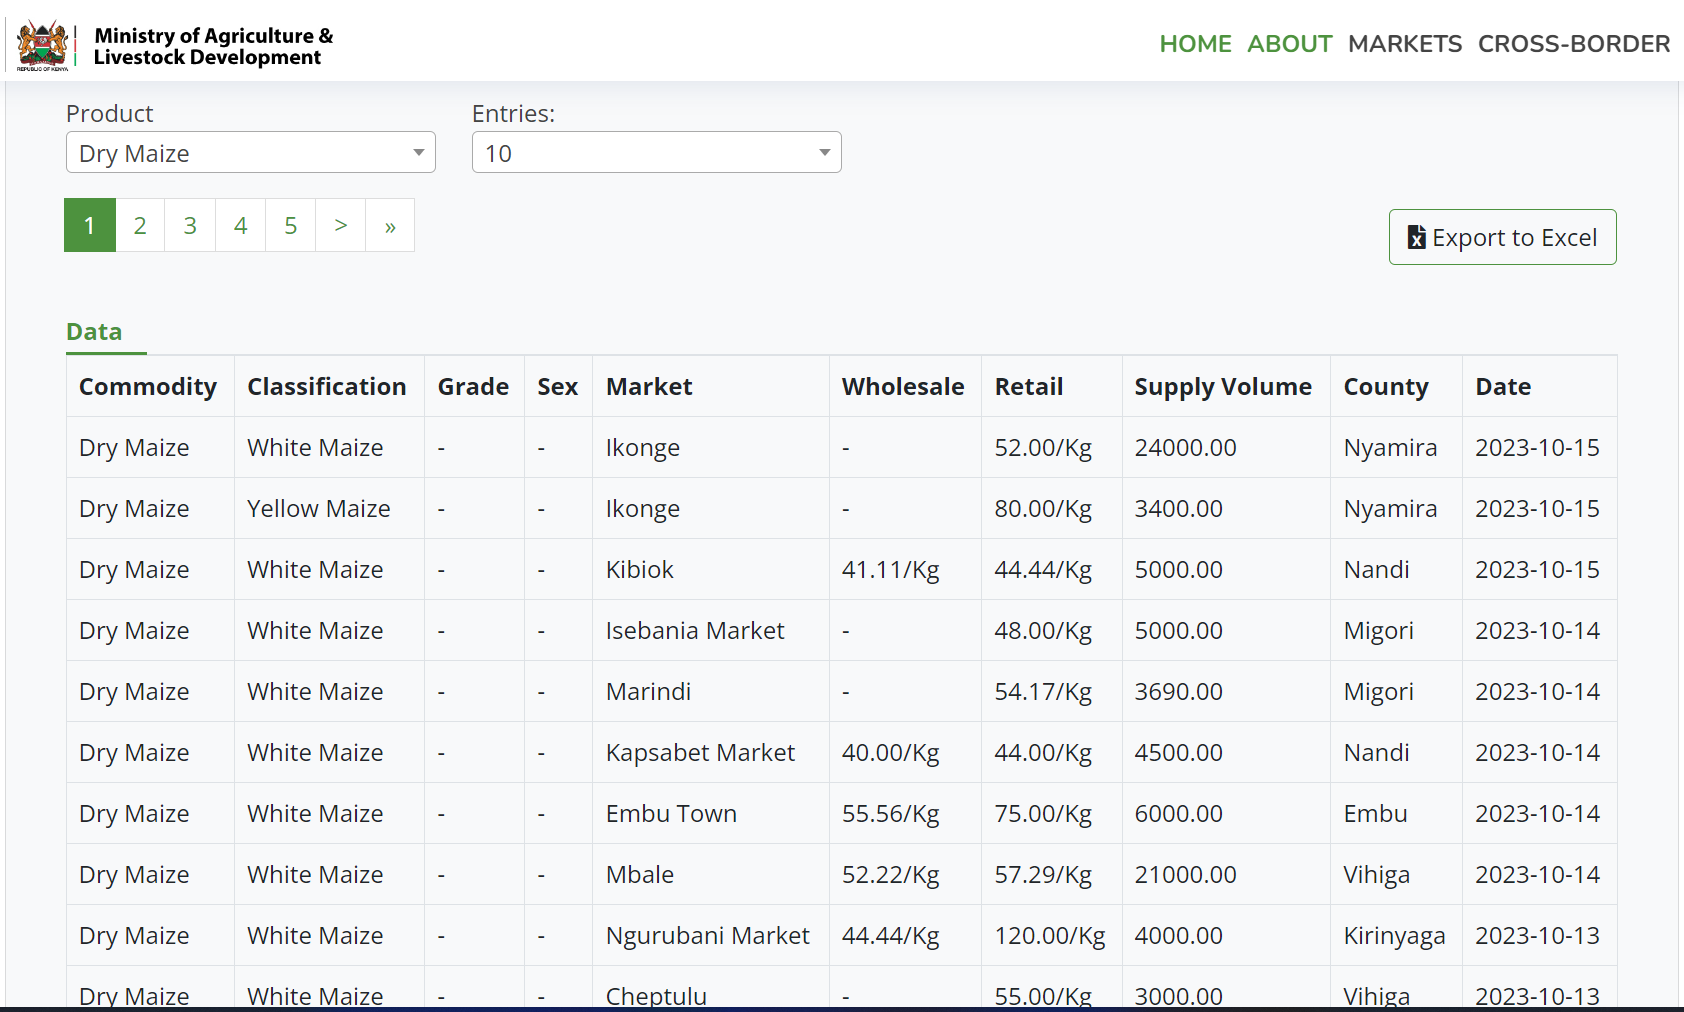

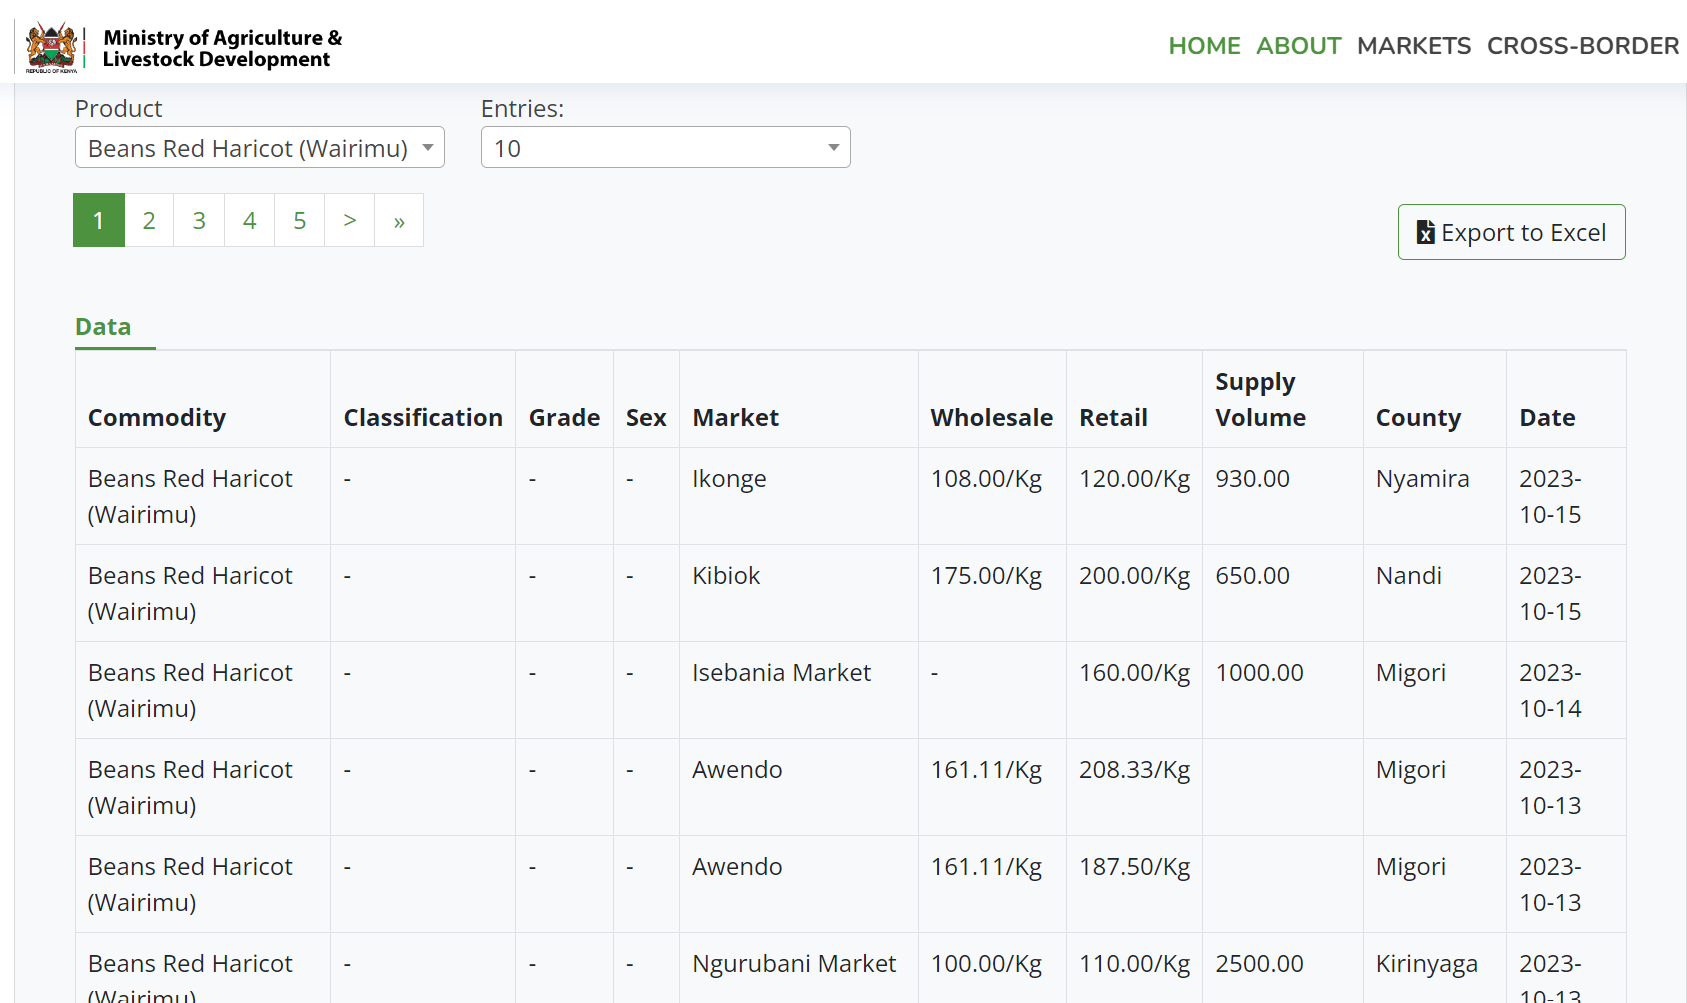

**Model Selection**

SokoSmart researchers leaned towards the LSTM model as their preference when forecasting maize and the SARIMA model while forecasting beans. This decision was informed by how closely matched the model's future forecasts with the actual conditions observed in the Kenyan market. The decision to choose the specific models was primarily driven by their practical alignment with real-world observations.

**Limitations in Crop Price Forecasting Models**
- Data sufficiency remained a challenge for both models. While we made substantial efforts to gather historical price data, the data was still insufficient to run the models
- Our research was limited to only two commodities(maize and beans) with an acceptable amount of data
- Both models faced challenges in accounting for external variables that impact crop prices, such as weather conditions, market dynamics, and supply chain disruptions
- Unforeseeable events, such as natural disasters or global economic shocks, present challenges for both models in crop price forecasting. These events are inherently unpredictable and may impact model accuracy.

However, we recognized the need to address the aforementioned limitations and remained vigilant in refining our models to enhance their utility in real-world crop price forecasting.

## 5.0 Conclusions and Recommendations

**Conclusions:**

In the realm of Kenyan food security, the ability to accurately predict food prices is of paramount importance. Our research, focusing on predicting food prices in Kenya, reveals valuable insights that can significantly impact various stakeholders within the agricultural sector.

- Key findings from our study encompass a comprehensive understanding of the dataset, covering a wide range of food commodities and regions. We discovered substantial price variability, a connection between inflation rate and food prices, and distinctive food category preferences among Kenyan consumers. These insights can guide market decisions and government policies to promote food security.

- Our research methodology, which included data preprocessing, feature engineering, and cluster analysis, allowed us to create predictive models. After careful evaluation, we selected the LSTM model as the preferred choice for forecasting food prices.

- For maize, our finely-tuned LSTM model reduced the Root Mean Squared Error (RMSE) to 12.17 units, indicating improved predictive accuracy compared to the baseline model. Similarly, for beans, the RMSE decreased to 24.36 units after hyperparameter tuning, reflecting enhanced forecasting capabilities.

- Forecasting the future prices of maize and beans for the next 12 months, we provide valuable tools for decision-making within the agricultural sector. These predictions offer insights that can aid Kenyan farmers, retailers, and consumers in planning and maximizing profits, ultimately contributing to food security in the nation.



**Recommendations:**

Based on our research and predictive models, we offer the following recommendations to various stakeholders within the agricultural sector:

- **Farmers and Retailers**: Use the forecasted prices to plan your planting, harvesting, and stocking strategies. Being aware of future price trends can help optimize production and sales, ensuring better financial outcomes. <br>
Farmers may consider diversifying their crop portfolio to spread risk. Relying solely on one crop can render them vulnerable to market fluctuations. <br>
Retailers can explore hedging strategies to mitigate potential price risks. This may involve the use of forward contracts or other financial instruments.

- **Government and Policymakers**: Consider incorporating price forecasts into your food security and agricultural policies. These forecasts can help in managing food imports and exports, stabilizing prices, and ensuring a consistent food supply for the population. Given the anticipated increase in the price and beans in the coming months, the government should secure more food commodities (maize and beans) now before the price increases

- **Consumers**: Be mindful of potential price fluctuations for maize and beans in the coming months. This awareness can assist you in making informed purchasing decisions and managing your food budget more effectively

By implementing these recommendations and continuously refining predictive models, Kenya can strengthen its food security, support its agricultural sector, and ensure a consistent and affordable food supply for its citizens.


**Next Steps**
- **Data**: More efforts to be made to get data from distant areas such as North Eastern where either some of the commodity prices  were not available or there was not enough data gathered

- **Expand the Model**: Our study focused on maize and beans, but there are many other essential food commodities in Kenya. Consider developing predictive models for a wider range of crops and products to provide even more comprehensive insights.

- **Collaboration**: Foster collaboration among stakeholders in the agricultural sector to share information, best practices, and resources. The synergy of efforts can further enhance food security in Kenya.

- **Data Analysts and Researchers**: Continue to explore and analyze food price data, incorporating more variables such as weather conditions and socio-economic factors. This can enhance the accuracy and applicability of predictive models.